In [70]:
import numpy as np   
import pandas as pd    
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt   
import matplotlib.style
%matplotlib inline 
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
import math
import os

In [71]:
# 1. LOAD DATA
df = pd.read_csv('cubic_zirconia.csv') 

In [72]:
df.head(10)

Unnamed: 0  carat        cut color clarity  depth  table     x     y     z  \
0           1   0.30      Ideal     E     SI1   62.1   58.0  4.27  4.29  2.66   
1           2   0.33    Premium     G      IF   60.8   58.0  4.42  4.46  2.70   
2           3   0.90  Very Good     E    VVS2   62.2   60.0  6.04  6.12  3.78   
3           4   0.42      Ideal     F     VS1   61.6   56.0  4.82  4.80  2.96   
4           5   0.31      Ideal     F    VVS1   60.4   59.0  4.35  4.43  2.65   
5           6   1.02      Ideal     D     VS2   61.5   56.0  6.46  6.49  3.99   
6           7   1.01       Good     H     SI1   63.7   60.0  6.35  6.30  4.03   
7           8   0.50    Premium     E     SI1   61.5   62.0  5.09  5.06  3.12   
8           9   1.21       Good     H     SI1   63.8   64.0  6.72  6.63  4.26   
9          10   0.35      Ideal     F     VS2   60.5   57.0  4.52  4.60  2.76   

   price  
0    499  
1    984  
2   6289  
3   1082  
4    779  
5   9502  
6   4836  
7   1415  
8   5407  
9    706

In [73]:
df.describe().T

count          mean          std    min      25%       50%  \
Unnamed: 0  26967.0  13484.000000  7784.846691    1.0  6742.50  13484.00   
carat       26967.0      0.798375     0.477745    0.2     0.40      0.70   
depth       26270.0     61.745147     1.412860   50.8    61.00     61.80   
table       26967.0     57.456080     2.232068   49.0    56.00     57.00   
x           26967.0      5.729854     1.128516    0.0     4.71      5.69   
y           26967.0      5.733569     1.166058    0.0     4.71      5.71   
z           26967.0      3.538057     0.720624    0.0     2.90      3.52   
price       26967.0   3939.518115  4024.864666  326.0   945.00   2375.00   

                 75%       max  
Unnamed: 0  20225.50  26967.00  
carat           1.05      4.50  
depth          62.50     73.60  
table          59.00     79.00  
x               6.55     10.23  
y               6.54     58.90  
z               4.04     31.80  
price        5360.00  18818.00

In [74]:
df.nunique()

Unnamed: 0    26967
carat           257
cut               5
color             7
clarity           8
depth           169
table           112
x               531
y               526
z               356
price          8742
dtype: int64

In [75]:
lr_df = df.drop('Unnamed: 0', axis=1)
lr_df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

In [76]:
lr_df.shape

(26967, 10)

In [77]:
zero_dimension_rows = lr_df[(lr_df['x'] == 0) | (lr_df['y'] == 0) | (lr_df['z'] == 0)]

print("Number of rows with at least one zero dimension:", zero_dimension_rows.shape[0])
zero_dimension_rows


Number of rows with at least one zero dimension: 9


carat      cut color clarity  depth  table     x     y    z  price
5821    0.71     Good     F     SI2   64.1   60.0  0.00  0.00  0.0   2130
6034    2.02  Premium     H     VS2   62.7   53.0  8.02  7.95  0.0  18207
6215    0.71     Good     F     SI2   64.1   60.0  0.00  0.00  0.0   2130
10827   2.20  Premium     H     SI1   61.2   59.0  8.42  8.37  0.0  17265
12498   2.18  Premium     H     SI2   59.4   61.0  8.49  8.45  0.0  12631
12689   1.10  Premium     G     SI2   63.0   59.0  6.50  6.47  0.0   3696
17506   1.14     Fair     G     VS1   57.5   67.0  0.00  0.00  0.0   6381
18194   1.01  Premium     H      I1   58.1   59.0  6.66  6.60  0.0   3167
23758   1.12  Premium     G      I1   60.4   59.0  6.71  6.67  0.0   2383

In [78]:
print("Number of x = 0 :", (lr_df['x'] == 0).sum())
print("Number of y = 0 :", (lr_df['y'] == 0).sum())
print("Number of z = 0 :", (lr_df['z'] == 0).sum())


Number of x = 0 : 3
Number of y = 0 : 3
Number of z = 0 : 9


In [79]:
#Dropping dimentionless diamonds
lr_df = lr_df.drop(lr_df[lr_df["x"]==0].index)
lr_df = lr_df.drop(lr_df[lr_df["y"]==0].index)
lr_df = lr_df.drop(lr_df[lr_df["z"]==0].index)
lr_df.shape

(26958, 10)

In [80]:
# Print all fully duplicated rows (entire row identical)
duplicated_rows = lr_df[lr_df.duplicated(keep=False)]

print("All duplicated rows (entire row identical):")
print(duplicated_rows)



All duplicated rows (entire row identical):
       carat        cut color clarity  depth  table     x     y     z  price
106     1.00    Premium     F    VVS2   60.6   54.0  6.56  6.52  3.96   8924
423     0.35    Premium     J     VS1   62.4   58.0  5.67  5.64  3.53    949
1996    1.50    Premium     F     SI2   58.5   60.0  7.52  7.48  4.39   7644
2007    1.52       Good     E      I1   57.3   58.0  7.53  7.42  4.28   3105
2155    0.35      Ideal     F     VS2   61.4   54.0  4.58  4.54  2.80    906
...      ...        ...   ...     ...    ...    ...   ...   ...   ...    ...
25268   1.20    Premium     I     VS2   62.6   58.0  6.77  6.72  4.22   5699
25759   0.30      Ideal     G      IF   62.1   55.0  4.32  4.35  2.69    863
25941   0.51    Premium     F     SI2   58.1   59.0  5.26  5.24  3.05   1052
26191   2.54  Very Good     H     SI2   63.5   56.0  8.68  8.65  5.50  16353
26530   0.41      Ideal     G      IF   61.7   56.0  4.77  4.80  2.95   1367

[64 rows x 10 columns]


In [81]:
lr_df = lr_df.drop_duplicates()

print("Dataset shape after removing duplicates:", lr_df.shape)


Dataset shape after removing duplicates: (26925, 10)


In [82]:
print('cut\n',lr_df.cut.value_counts())
print('\n')
print('color\n',lr_df.color.value_counts())
print('\n')
print('clarity\n',lr_df.clarity.value_counts())
print('\n')

cut
 cut
Ideal        10805
Premium       6880
Very Good     6027
Good          2434
Fair           779
Name: count, dtype: int64


color
 color
G    5650
E    4916
F    4722
H    4091
D    3341
I    2765
J    1440
Name: count, dtype: int64


clarity
 clarity
SI1     6564
VS2     6092
SI2     4561
VS1     4086
VVS2    2530
VVS1    1839
IF       891
I1       362
Name: count, dtype: int64




In [83]:
# Missing value count
missing_count = lr_df.isnull().sum()

# Missing value percentage
missing_percentage = (lr_df.isnull().sum() / len(lr_df)) * 100

# Combine into one table
missing_summary = pd.DataFrame({
    'Missing Count': missing_count,
    'Missing Percentage (%)': missing_percentage
})

print(missing_summary)


         Missing Count  Missing Percentage (%)
carat                0                0.000000
cut                  0                0.000000
color                0                0.000000
clarity              0                0.000000
depth              697                2.588672
table                0                0.000000
x                    0                0.000000
y                    0                0.000000
z                    0                0.000000
price                0                0.000000


In [84]:
# Drop rows with any missing values
lr_df = lr_df.dropna()

# Verify
lr_df.isnull().sum()


carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [85]:
lr_df.head(10)

carat        cut color clarity  depth  table     x     y     z  price
0   0.30      Ideal     E     SI1   62.1   58.0  4.27  4.29  2.66    499
1   0.33    Premium     G      IF   60.8   58.0  4.42  4.46  2.70    984
2   0.90  Very Good     E    VVS2   62.2   60.0  6.04  6.12  3.78   6289
3   0.42      Ideal     F     VS1   61.6   56.0  4.82  4.80  2.96   1082
4   0.31      Ideal     F    VVS1   60.4   59.0  4.35  4.43  2.65    779
5   1.02      Ideal     D     VS2   61.5   56.0  6.46  6.49  3.99   9502
6   1.01       Good     H     SI1   63.7   60.0  6.35  6.30  4.03   4836
7   0.50    Premium     E     SI1   61.5   62.0  5.09  5.06  3.12   1415
8   1.21       Good     H     SI1   63.8   64.0  6.72  6.63  4.26   5407
9   0.35      Ideal     F     VS2   60.5   57.0  4.52  4.60  2.76    706

In [86]:
lr_df.shape

(26228, 10)

In [87]:
import numpy as np

# 1. Volume
lr_df['volume'] = lr_df['x'] * lr_df['y'] * lr_df['z']

# 2. Average girdle diameter
lr_df['avg_girdle_diameter'] = (lr_df['x'] + lr_df['y']) / 2

# 3. Average table diameter
lr_df['avg_table_diameter'] = (lr_df['table'] * lr_df['avg_girdle_diameter']) / 100

# 4. Density
# Note: This will result in infinity if volume is 0
lr_df['density'] = lr_df['carat'] / lr_df['volume']

# 5. Length to width ratio
# Using numpy to handle element-wise maximum and minimum comparison
lr_df['length2width_ratio'] = np.maximum(lr_df['x'], lr_df['y']) / np.minimum(lr_df['x'], lr_df['y'])

# check the results
print(lr_df.head())

   carat        cut color clarity  depth  table     x     y     z  price  \
0   0.30      Ideal     E     SI1   62.1   58.0  4.27  4.29  2.66    499   
1   0.33    Premium     G      IF   60.8   58.0  4.42  4.46  2.70    984   
2   0.90  Very Good     E    VVS2   62.2   60.0  6.04  6.12  3.78   6289   
3   0.42      Ideal     F     VS1   61.6   56.0  4.82  4.80  2.96   1082   
4   0.31      Ideal     F    VVS1   60.4   59.0  4.35  4.43  2.65    779   

       volume  avg_girdle_diameter  avg_table_diameter   density  \
0   48.726678                 4.28              2.4824  0.006157   
1   53.225640                 4.44              2.5752  0.006200   
2  139.726944                 6.08              3.6480  0.006441   
3   68.482560                 4.81              2.6936  0.006133   
4   51.066825                 4.39              2.5901  0.006070   

   length2width_ratio  
0            1.004684  
1            1.009050  
2            1.013245  
3            1.004167  
4            1

In [88]:
import numpy as np

# Overwrite the 'price' column with its log-transformed values
lr_df['price'] = np.log(lr_df['price'])

# Verify the change
print(lr_df['price'].head())

0    6.212606
1    6.891626
2    8.746557
3    6.986566
4    6.658011
Name: price, dtype: float64


In [89]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# --- 1. Define your columns ---
num_cols = ['carat', 'depth', 'table', 'x', 'y', 'z', 'volume', 
            'avg_girdle_diameter', 'avg_table_diameter', 'density', 'length2width_ratio']
cat_cols = ['cut', 'color', 'clarity']

# --- 2. Define the Order for Ordinal Variables ---
# (Worst to Best)
cut_order = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
color_order = ['J', 'I', 'H', 'G', 'F', 'E', 'D']
clarity_order = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']

# --- 3. Separate features and target ---
# We generally do NOT include Price in the clustering data (X)
X = lr_df.drop('price', axis=1) 
y = lr_df['price']

# --- 4. Define the Preprocessing Pipeline ---
# We use pipelines to chain steps: Encode -> Then Scale
cat_pipeline = Pipeline([
    ('encoder', OrdinalEncoder(categories=[cut_order, color_order, clarity_order])),
    ('scaler', StandardScaler()) # Scale the categories (0-7) so they match the numericals
])

num_pipeline = Pipeline([
    ('scaler', StandardScaler()) # Switched to StandardScaler to fix "1 cluster" issue
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, num_cols),
        ('cat', cat_pipeline, cat_cols)
    ],
    verbose_feature_names_out=False
)

# --- 5. Apply preprocessing ---
# This results in a numpy array where ALL columns are scaled
X_processed = preprocessor.fit_transform(X)

# --- 6. Convert back to DataFrame ---
X_processed_df = pd.DataFrame(X_processed, columns=preprocessor.get_feature_names_out())

# Note: Do NOT add 'price' back if you are about to run Clustering.
# X_processed_df is now ready for KMeans.fit()

print("Processing complete. Data is scaled and ordered correctly.")
print(X_processed_df.head())



Processing complete. Data is scaled and ordered correctly.
      carat     depth     table         x         y         z    volume  \
0 -1.043860  0.251046  0.244301 -1.296622 -1.239281 -1.260719 -1.011921   
1 -0.980904 -0.669766  0.244301 -1.163287 -1.093235 -1.203245 -0.955829   
2  0.215256  0.321878  1.141174  0.276727  0.332867  0.348556  0.122647   
3 -0.792037 -0.103112 -0.652572 -0.807728 -0.801142 -0.829663 -0.765609   
4 -1.022874 -0.953093  0.692737 -1.225510 -1.119008 -1.275087 -0.982744   

   avg_girdle_diameter  avg_table_diameter   density  length2width_ratio  \
0            -1.279825           -1.182790  0.153006           -0.094275   
1            -1.138663           -1.048110  0.376389            0.016047   
2             0.308253            0.508832  1.622368            0.122056   
3            -0.812224           -0.876278  0.029794           -0.107343   
4            -1.182776           -1.026486 -0.293030            0.252083   

        cut     color   clarity  

#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function
# Split X and y into training and test set in 80:20 ratio

In [90]:

X_train, X_test, y_train, y_test = train_test_split(X_processed_df, y, test_size=0.20, random_state=1)


print("--- Data Split Complete For X ---")
print(f"Training set shape: {X_train.shape} (80%)")
print(f"Testing set shape:  {X_test.shape} (20%)")

print("--- Data Split Complete For y ---")
print(f"Training set shape: {y_train.shape} (80%)")
print(f"Testing set shape:  {y_test.shape} (20%)")

X_train.head(5)




--- Data Split Complete For X ---
Training set shape: (20982, 14) (80%)
Testing set shape:  (5246, 14) (20%)
--- Data Split Complete For y ---
Training set shape: (20982,) (80%)
Testing set shape:  (5246,) (20%)


carat     depth     table         x         y         z    volume  \
8825  -0.771051 -0.103112  0.692737 -0.798839 -0.741005 -0.786558 -0.742563   
32    -0.057553 -0.669766 -0.652572  0.196726  0.143866  0.089922 -0.043784   
11793 -0.204449 -0.032280 -1.101008 -0.007720  0.023592  0.003711 -0.165281   
3339   0.634961 -1.590578  0.692737  0.925622  0.831144  0.679032  0.648320   
25462  2.544619 -1.165588  1.589610  2.143412  1.999516  1.914724  2.364171   

       avg_girdle_diameter  avg_table_diameter   density  length2width_ratio  \
8825             -0.776934           -0.632607 -0.068433           -0.003365   
32                0.171502            0.029907 -0.177507            0.001512   
11793             0.008283           -0.203751 -0.648300           -0.035925   
3339              0.886137            0.981444 -0.411121            0.051372   
25462             2.090430            2.385348  0.845637            0.038177   

            cut     color   clarity  
8825  -0.817760  0.352438 -0.641184  
32     0.080670  0.939044  0.572950  
11793  0.979099  0.352438  0.572950  
3339   0.080670  0.352438 -0.641184  
25462  0.080670 -0.820775 -0.034117

In [91]:
y_train.head(5)

9071     6.674561
33       8.089482
12132    8.056427
3437     8.669227
26185    9.744961
Name: price, dtype: float64

Calculating optimal k (this may take a moment)...


k=2: Silhouette Score = 0.3568
k=3: Silhouette Score = 0.3572
k=4: Silhouette Score = 0.2732
k=5: Silhouette Score = 0.2568
k=6: Silhouette Score = 0.1845
k=7: Silhouette Score = 0.1828
k=8: Silhouette Score = 0.1832
k=9: Silhouette Score = 0.1723
k=10: Silhouette Score = 0.1565

OPTIMAL NUMBER OF CLUSTERS: k = 3
Highest Silhouette Score: 0.3572


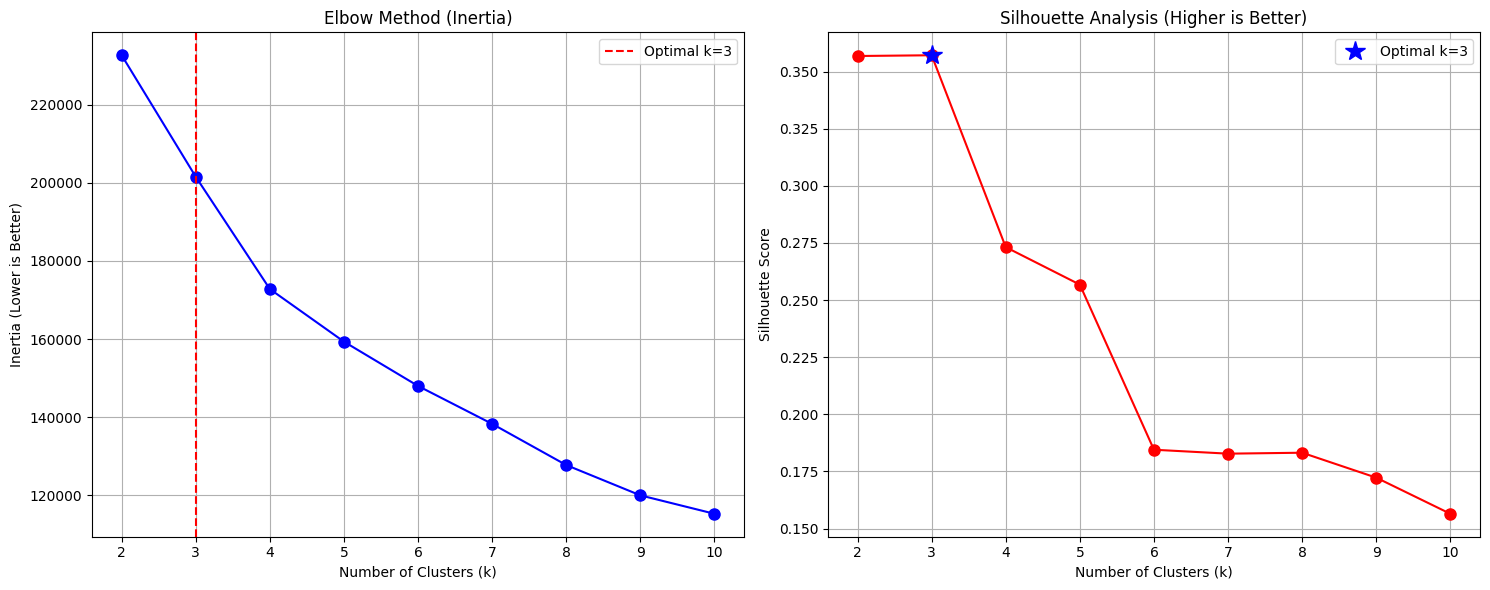

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# --- 1. Setup Storage ---
inertia = []
silhouette_scores = []
K_range = range(2, 11)  # Checking k=2 to k=10

print("Calculating optimal k (this may take a moment)...")

# --- 2. Loop through K values ---
for k in K_range:
    # Initialize and Fit
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_processed_df)  # Make sure to use your PROCESSED (Scaled) data
    
    # Store Inertia (Elbow Method)
    inertia.append(kmeans.inertia_)
    
    # Store Silhouette Score
    # Note: If dataset is huge (>50k rows), sample it for speed:
    # score = silhouette_score(X_processed_df.sample(5000), kmeans.predict(X_processed_df.sample(5000)))
    score = silhouette_score(X_processed_df, kmeans.labels_)
    silhouette_scores.append(score)
    
    print(f"k={k}: Silhouette Score = {score:.4f}")

# --- 3. Determine Optimal K Mathematically ---
# We pick the k with the HIGHEST Silhouette Score
best_score = max(silhouette_scores)
best_k = K_range[silhouette_scores.index(best_score)]

print("\n" + "="*40)
print(f"OPTIMAL NUMBER OF CLUSTERS: k = {best_k}")
print(f"Highest Silhouette Score: {best_score:.4f}")
print("="*40)

# --- 4. Plotting ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Elbow Method
ax1.plot(K_range, inertia, 'bo-', markersize=8)
# Mark the "Best K" on this plot too for reference
ax1.axvline(x=best_k, color='r', linestyle='--', label=f'Optimal k={best_k}')
ax1.set_title('Elbow Method (Inertia)')
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Inertia (Lower is Better)')
ax1.legend()
ax1.grid(True)

# Plot 2: Silhouette Analysis
ax2.plot(K_range, silhouette_scores, 'ro-', markersize=8)
# Highlight the max point
ax2.plot(best_k, best_score, 'b*', markersize=15, label=f'Optimal k={best_k}')
ax2.set_title('Silhouette Analysis (Higher is Better)')
ax2.set_xlabel('Number of Clusters (k)')
ax2.set_ylabel('Silhouette Score')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

In [93]:
import pandas as pd
from sklearn.cluster import KMeans

# --- 1. Initialize KMeans with k=3 ---
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)

# --- 2. Fit the model directly on X_train ---
# (Assumes X_train is the numeric/prepared data you want to use)
kmeans.fit(X_train)

# --- 3. Assign the cluster labels back to X_train ---
X_train['cluster'] = kmeans.labels_

# --- 4. Verify Results ---
print("First 5 rows of X_train with clusters:")
print(X_train.head())

print("\nCluster Distribution:")
print(X_train['cluster'].value_counts())

First 5 rows of X_train with clusters:
          carat     depth     table         x         y         z    volume  \
8825  -0.771051 -0.103112  0.692737 -0.798839 -0.741005 -0.786558 -0.742563   
32    -0.057553 -0.669766 -0.652572  0.196726  0.143866  0.089922 -0.043784   
11793 -0.204449 -0.032280 -1.101008 -0.007720  0.023592  0.003711 -0.165281   
3339   0.634961 -1.590578  0.692737  0.925622  0.831144  0.679032  0.648320   
25462  2.544619 -1.165588  1.589610  2.143412  1.999516  1.914724  2.364171   

       avg_girdle_diameter  avg_table_diameter   density  length2width_ratio  \
8825             -0.776934           -0.632607 -0.068433           -0.003365   
32                0.171502            0.029907 -0.177507            0.001512   
11793             0.008283           -0.203751 -0.648300           -0.035925   
3339              0.886137            0.981444 -0.411121            0.051372   
25462             2.090430            2.385348  0.845637            0.038177   

     

In [94]:
# --- 1. Predict Clusters for X_test ---
# Use the trained 'kmeans' model from the previous step
test_labels = kmeans.predict(X_test)

# --- 2. Assign the cluster labels to X_test ---
X_test['cluster'] = test_labels


# --- 4. Verify Results ---
print("First 5 rows of X_train with clusters:")
print(X_test.head())

# --- 3. Print Count for Each Cluster in Test Set ---
print("Number of observations in each cluster (Test Set):")
print(X_test['cluster'].value_counts())



First 5 rows of X_train with clusters:
          carat     depth     table         x         y         z    volume  \
16436 -1.022874  1.030195 -1.101008 -1.261066 -1.204917 -1.160139 -0.984225   
2074  -0.687110 -0.315607 -0.652572 -0.621059 -0.586367 -0.642872 -0.640831   
20437 -0.603169  0.109383 -0.652572 -0.541059 -0.491866 -0.513556 -0.571979   
23372 -0.372331  0.109383 -1.549444 -0.221056 -0.199773 -0.197448 -0.341788   
7659  -1.043860  1.242690  0.244301 -1.332178 -1.222099 -1.188876 -1.003441   

       avg_girdle_diameter  avg_table_diameter   density  length2width_ratio  \
16436            -1.244535           -1.337207 -0.219916           -0.095373   
2074             -0.609303           -0.689352 -0.719364           -0.112157   
20437            -0.521077           -0.608080 -0.292990           -0.015218   
23372            -0.212284           -0.482979 -0.397829           -0.120408   
7659             -1.288648           -1.191207 -0.284976            0.265266   

     

Clusterwise

Multiple linear

In [95]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# --- 1. CRITICAL: Reset Indices for Alignment ---
# This fixes the "IndexingError" by ensuring row numbers match (0, 1, 2...)
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# --- 2. Filter Data for Cluster 0 ---
# Create True/False masks
train_mask_c0 = (X_train['cluster'] == 0)
test_mask_c0 = (X_test['cluster'] == 0)

# Filter X and y simultaneously
X_train_c0 = X_train[train_mask_c0].copy()
y_train_c0 = y_train[train_mask_c0].copy()

X_test_c0 = X_test[test_mask_c0].copy()
y_test_c0 = y_test[test_mask_c0].copy()

# --- 3. Drop 'cluster' column ---
X_train_c0 = X_train_c0.drop(columns=['cluster'])
X_test_c0 = X_test_c0.drop(columns=['cluster'])

# --- 4. Fit Model ---
print("Fitting Linear Regression for Cluster 0...")
lr_c0 = LinearRegression()
lr_c0.fit(X_train_c0, y_train_c0)

# --- 5. Evaluate Training Set ---
y_train_pred_c0 = lr_c0.predict(X_train_c0)
r2_train_c0 = r2_score(y_train_c0, y_train_pred_c0)
rmse_train_c0 = np.sqrt(mean_squared_error(y_train_c0, y_train_pred_c0))

# --- 6. Evaluate Test Set ---
y_test_pred_c0 = lr_c0.predict(X_test_c0)
r2_test_c0 = r2_score(y_test_c0, y_test_pred_c0)
rmse_test_c0 = np.sqrt(mean_squared_error(y_test_c0, y_test_pred_c0))

# --- 7. Final Output ---
print("\n" + "="*45)
print("   CLUSTER 0: REGRESSION RESULTS")
print("="*45)
print(f"TRAINING Set R-squared : {r2_train_c0:.4f}")
print(f"TRAINING Set RMSE      : {rmse_train_c0:.4f}")
print("-" * 45)
print(f"TEST Set R-squared     : {r2_test_c0:.4f}")
print(f"TEST Set RMSE          : {rmse_test_c0:.4f}")
print("="*45)

Fitting Linear Regression for Cluster 0...

   CLUSTER 0: REGRESSION RESULTS
TRAINING Set R-squared : 0.9349
TRAINING Set RMSE      : 0.1205
---------------------------------------------
TEST Set R-squared     : 0.9365
TEST Set RMSE          : 0.1215


In [96]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# --- 1. Safety Check: Ensure Indices are aligned ---
# (Resets indices to 0, 1, 2... so X and y match perfectly)
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# --- 2. Filter Data for Cluster 2 ---
# Create True/False masks for Cluster 2
train_mask_c2 = (X_train['cluster'] == 2)
test_mask_c2 = (X_test['cluster'] == 2)

# Filter X and y simultaneously
X_train_c2 = X_train[train_mask_c2].copy()
y_train_c2 = y_train[train_mask_c2].copy()

X_test_c2 = X_test[test_mask_c2].copy()
y_test_c2 = y_test[test_mask_c2].copy()

# --- 3. Drop 'cluster' column ---
# Remove the cluster column since it's constant (all 2) for this subset
X_train_c2 = X_train_c2.drop(columns=['cluster'])
X_test_c2 = X_test_c2.drop(columns=['cluster'])

# --- 4. Fit Model ---
print(f"Fitting Linear Regression for Cluster 2...")
print(f"Training Samples: {len(X_train_c2)}")
print(f"Test Samples:     {len(X_test_c2)}")

lr_c2 = LinearRegression()
lr_c2.fit(X_train_c2, y_train_c2)

# --- 5. Evaluate Training Set ---
y_train_pred_c2 = lr_c2.predict(X_train_c2)
r2_train_c2 = r2_score(y_train_c2, y_train_pred_c2)
rmse_train_c2 = np.sqrt(mean_squared_error(y_train_c2, y_train_pred_c2))

# --- 6. Evaluate Test Set ---
y_test_pred_c2 = lr_c2.predict(X_test_c2)
r2_test_c2 = r2_score(y_test_c2, y_test_pred_c2)
rmse_test_c2 = np.sqrt(mean_squared_error(y_test_c2, y_test_pred_c2))

# --- 7. Final Output ---
print("\n" + "="*45)
print("   CLUSTER 2: REGRESSION RESULTS")
print("="*45)
print(f"TRAINING Set R-squared : {r2_train_c2:.4f}")
print(f"TRAINING Set RMSE      : {rmse_train_c2:.4f}")
print("-" * 45)
print(f"TEST Set R-squared     : {r2_test_c2:.4f}")
print(f"TEST Set RMSE          : {rmse_test_c2:.4f}")
print("="*45)

Fitting Linear Regression for Cluster 2...
Training Samples: 8301
Test Samples:     2116

   CLUSTER 2: REGRESSION RESULTS
TRAINING Set R-squared : 0.9309
TRAINING Set RMSE      : 0.1237
---------------------------------------------
TEST Set R-squared     : 0.9334
TEST Set RMSE          : 0.1225


Ridge

In [97]:
import pandas as pd
import numpy as np
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score, mean_squared_error

# --- 1. Safety Check: Reset Indices ---
# Ensures perfect alignment between X and y
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# Define the list of alphas to test (finding the "best parameter")
alphas_to_test = [0.01, 0.1, 1.0, 10.0, 100.0]

# --- 2. Loop Through Each Cluster ---
for cluster_id in [0, 1, 2]:
    
    # A. Filter Data
    train_mask = (X_train['cluster'] == cluster_id)
    test_mask = (X_test['cluster'] == cluster_id)

    X_train_c = X_train[train_mask].copy()
    y_train_c = y_train[train_mask].copy()
    X_test_c = X_test[test_mask].copy()
    y_test_c = y_test[test_mask].copy()

    # B. Drop 'cluster' column (constant)
    X_train_c = X_train_c.drop(columns=['cluster'])
    X_test_c = X_test_c.drop(columns=['cluster'])
    
    # C. Initialize RidgeCV (Finds best alpha automatically)
    # cv=5 means it checks the performance 5 times to be sure
    ridge_model = RidgeCV(alphas=alphas_to_test, scoring='neg_mean_squared_error', cv=5)
    
    # D. Fit the Model
    ridge_model.fit(X_train_c, y_train_c)
    
    # E. Get Predictions
    y_train_pred = ridge_model.predict(X_train_c)
    y_test_pred = ridge_model.predict(X_test_c)
    
    # F. Calculate Metrics
    r2_train = r2_score(y_train_c, y_train_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train_c, y_train_pred))
    
    r2_test = r2_score(y_test_c, y_test_pred)
    rmse_test = np.sqrt(mean_squared_error(y_test_c, y_test_pred))
    
    # G. Output Results
    print("\n" + "#"*50)
    print(f"   CLUSTER {cluster_id} | RIDGE REGRESSION RESULTS")
    print("#"*50)
    print(f"Best Alpha Found   : {ridge_model.alpha_}")
    print("-" * 50)
    print(f"TRAIN R-squared    : {r2_train:.4f}")
    print(f"TRAIN RMSE         : {rmse_train:.4f}")
    print("-" * 50)
    print(f"TEST R-squared     : {r2_test:.4f}")
    print(f"TEST RMSE          : {rmse_test:.4f}")


##################################################
   CLUSTER 0 | RIDGE REGRESSION RESULTS
##################################################
Best Alpha Found   : 1.0
--------------------------------------------------
TRAIN R-squared    : 0.9345
TRAIN RMSE         : 0.1208
--------------------------------------------------
TEST R-squared     : 0.9359
TEST RMSE          : 0.1222

##################################################
   CLUSTER 1 | RIDGE REGRESSION RESULTS
##################################################
Best Alpha Found   : 100.0
--------------------------------------------------
TRAIN R-squared    : 0.7879
TRAIN RMSE         : 0.1709
--------------------------------------------------
TEST R-squared     : 0.7678
TEST RMSE          : 0.1717

##################################################
   CLUSTER 2 | RIDGE REGRESSION RESULTS
##################################################
Best Alpha Found   : 1.0
--------------------------------------------------
TRAIN R-squared

Lasso


In [98]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LassoCV
from sklearn.metrics import r2_score, mean_squared_error

# --- 1. Safety Check: Reset Indices ---
# Ensures perfect alignment between X and y
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# --- 2. Define Alphas to Test ---
# Lasso is sensitive to alpha. We test a range of values.
# 'eps=0.001' means the smallest alpha checked is 0.001 * max_alpha
# n_alphas=100 checks 100 different values automatically.

# --- 3. Loop Through Each Cluster ---
for cluster_id in [0, 1, 2]:
    
    # A. Filter Data
    train_mask = (X_train['cluster'] == cluster_id)
    test_mask = (X_test['cluster'] == cluster_id)

    X_train_c = X_train[train_mask].copy()
    y_train_c = y_train[train_mask].copy()
    X_test_c = X_test[test_mask].copy()
    y_test_c = y_test[test_mask].copy()

    # B. Drop 'cluster' column (constant)
    X_train_c = X_train_c.drop(columns=['cluster'])
    X_test_c = X_test_c.drop(columns=['cluster'])
    
    # C. Initialize LassoCV (Finds best alpha automatically)
    # max_iter is increased to 10000 to ensure the complex math converges
    lasso_model = LassoCV(eps=0.001, n_alphas=100, cv=5, random_state=42, max_iter=10000)
    
    # D. Fit the Model
    # (This might take a few seconds per cluster as it tests 100 alphas)
    lasso_model.fit(X_train_c, y_train_c)
    
    # E. Get Predictions
    y_train_pred = lasso_model.predict(X_train_c)
    y_test_pred = lasso_model.predict(X_test_c)
    
    # F. Calculate Metrics
    r2_train = r2_score(y_train_c, y_train_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train_c, y_train_pred))
    
    r2_test = r2_score(y_test_c, y_test_pred)
    rmse_test = np.sqrt(mean_squared_error(y_test_c, y_test_pred))
    
    # G. Check for "Zeroed Out" Features (Feature Selection)
    # This counts how many coefficients Lasso reduced to exactly 0
    zero_features = np.sum(lasso_model.coef_ == 0)
    total_features = X_train_c.shape[1]
    
    # H. Output Results
    print("\n" + "#"*50)
    print(f"   CLUSTER {cluster_id} | LASSO REGRESSION RESULTS")
    print("#"*50)
    print(f"Best Alpha Found   : {lasso_model.alpha_:.5f}")
    print(f"Features Removed   : {zero_features} / {total_features}")
    print("-" * 50)
    print(f"TRAIN R-squared    : {r2_train:.4f}")
    print(f"TRAIN RMSE         : {rmse_train:.4f}")
    print("-" * 50)
    print(f"TEST R-squared     : {r2_test:.4f}")
    print(f"TEST RMSE          : {rmse_test:.4f}")

c:\Users\umasu\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1663: FutureWarning: 'n_alphas' was deprecated in 1.7 and will be removed in 1.9. 'alphas' now accepts an integer value which removes the need to pass 'n_alphas'. The default value of 'alphas' will change from None to 100 in 1.9. Pass an explicit value to 'alphas' and leave 'n_alphas' to its default value to silence this warning.
  warnings.warn(



##################################################
   CLUSTER 0 | LASSO REGRESSION RESULTS
##################################################
Best Alpha Found   : 0.00015
Features Removed   : 3 / 14
--------------------------------------------------
TRAIN R-squared    : 0.9341
TRAIN RMSE         : 0.1212
--------------------------------------------------
TEST R-squared     : 0.9354
TEST RMSE          : 0.1226


c:\Users\umasu\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1663: FutureWarning: 'n_alphas' was deprecated in 1.7 and will be removed in 1.9. 'alphas' now accepts an integer value which removes the need to pass 'n_alphas'. The default value of 'alphas' will change from None to 100 in 1.9. Pass an explicit value to 'alphas' and leave 'n_alphas' to its default value to silence this warning.
  warnings.warn(



##################################################
   CLUSTER 1 | LASSO REGRESSION RESULTS
##################################################
Best Alpha Found   : 0.00691
Features Removed   : 7 / 14
--------------------------------------------------
TRAIN R-squared    : 0.7703
TRAIN RMSE         : 0.1779
--------------------------------------------------
TEST R-squared     : 0.7505
TEST RMSE          : 0.1780

##################################################
   CLUSTER 2 | LASSO REGRESSION RESULTS
##################################################
Best Alpha Found   : 0.00025
Features Removed   : 5 / 14
--------------------------------------------------
TRAIN R-squared    : 0.9287
TRAIN RMSE         : 0.1257
--------------------------------------------------
TEST R-squared     : 0.9314
TEST RMSE          : 0.1244


c:\Users\umasu\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1663: FutureWarning: 'n_alphas' was deprecated in 1.7 and will be removed in 1.9. 'alphas' now accepts an integer value which removes the need to pass 'n_alphas'. The default value of 'alphas' will change from None to 100 in 1.9. Pass an explicit value to 'alphas' and leave 'n_alphas' to its default value to silence this warning.
  warnings.warn(


Ridge

In [99]:
import pandas as pd
import numpy as np
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import r2_score, mean_squared_error

# --- 1. Safety Check: Reset Indices ---
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# --- 2. Define L1 Ratios to Test ---
# We test a range from "Mostly Ridge" (0.1) to "Pure Lasso" (1.0)
ratios_to_test = [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1.0]

# --- 3. Loop Through Each Cluster ---
for cluster_id in [0, 1, 2]:
    
    # A. Filter Data
    train_mask = (X_train['cluster'] == cluster_id)
    test_mask = (X_test['cluster'] == cluster_id)

    X_train_c = X_train[train_mask].copy()
    y_train_c = y_train[train_mask].copy()
    X_test_c = X_test[test_mask].copy()
    y_test_c = y_test[test_mask].copy()

    # B. Drop 'cluster' column
    X_train_c = X_train_c.drop(columns=['cluster'])
    X_test_c = X_test_c.drop(columns=['cluster'])
    
    # C. Initialize ElasticNetCV
    # n_alphas=100 checks 100 strengths for EACH ratio in the list
    elastic_model = ElasticNetCV(l1_ratio=ratios_to_test, eps=0.001, n_alphas=100, cv=5, 
                                 random_state=42, max_iter=10000)
    
    # D. Fit the Model
    # (This takes the longest because it tests 7 ratios * 100 alphas = 700 models per cluster)
    elastic_model.fit(X_train_c, y_train_c)
    
    # E. Get Predictions
    y_train_pred = elastic_model.predict(X_train_c)
    y_test_pred = elastic_model.predict(X_test_c)
    
    # F. Calculate Metrics
    r2_train = r2_score(y_train_c, y_train_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train_c, y_train_pred))
    
    r2_test = r2_score(y_test_c, y_test_pred)
    rmse_test = np.sqrt(mean_squared_error(y_test_c, y_test_pred))
    
    # G. Output Results
    print("\n" + "#"*55)
    print(f"   CLUSTER {cluster_id} | ELASTIC NET RESULTS")
    print("#"*55)
    print(f"Best Alpha Found   : {elastic_model.alpha_:.5f}")
    print(f"Best L1 Ratio      : {elastic_model.l1_ratio_}")
    print("-" * 55)
    print(f"TRAIN R-squared    : {r2_train:.4f}")
    print(f"TRAIN RMSE         : {rmse_train:.4f}")
    print("-" * 55)
    print(f"TEST R-squared     : {r2_test:.4f}")
    print(f"TEST RMSE          : {rmse_test:.4f}")

c:\Users\umasu\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1663: FutureWarning: 'n_alphas' was deprecated in 1.7 and will be removed in 1.9. 'alphas' now accepts an integer value which removes the need to pass 'n_alphas'. The default value of 'alphas' will change from None to 100 in 1.9. Pass an explicit value to 'alphas' and leave 'n_alphas' to its default value to silence this warning.
  warnings.warn(



#######################################################
   CLUSTER 0 | ELASTIC NET RESULTS
#######################################################
Best Alpha Found   : 0.00015
Best L1 Ratio      : 1.0
-------------------------------------------------------
TRAIN R-squared    : 0.9341
TRAIN RMSE         : 0.1212
-------------------------------------------------------
TEST R-squared     : 0.9354
TEST RMSE          : 0.1226


c:\Users\umasu\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1663: FutureWarning: 'n_alphas' was deprecated in 1.7 and will be removed in 1.9. 'alphas' now accepts an integer value which removes the need to pass 'n_alphas'. The default value of 'alphas' will change from None to 100 in 1.9. Pass an explicit value to 'alphas' and leave 'n_alphas' to its default value to silence this warning.
  warnings.warn(
c:\Users\umasu\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:701: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.378e-02, tolerance: 3.186e-02
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\umasu\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:701: ConvergenceWarning: Objec


#######################################################
   CLUSTER 1 | ELASTIC NET RESULTS
#######################################################
Best Alpha Found   : 0.04524
Best L1 Ratio      : 0.5
-------------------------------------------------------
TRAIN R-squared    : 0.7188
TRAIN RMSE         : 0.1968
-------------------------------------------------------
TEST R-squared     : 0.7106
TEST RMSE          : 0.1917


c:\Users\umasu\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1663: FutureWarning: 'n_alphas' was deprecated in 1.7 and will be removed in 1.9. 'alphas' now accepts an integer value which removes the need to pass 'n_alphas'. The default value of 'alphas' will change from None to 100 in 1.9. Pass an explicit value to 'alphas' and leave 'n_alphas' to its default value to silence this warning.
  warnings.warn(



#######################################################
   CLUSTER 2 | ELASTIC NET RESULTS
#######################################################
Best Alpha Found   : 0.00025
Best L1 Ratio      : 1.0
-------------------------------------------------------
TRAIN R-squared    : 0.9287
TRAIN RMSE         : 0.1257
-------------------------------------------------------
TEST R-squared     : 0.9314
TEST RMSE          : 0.1244


Partial lest square

In [100]:
import pandas as pd
import numpy as np
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error

# --- 1. Safety Check: Reset Indices ---
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# --- 2. Define Parameter Grid ---
# We test how many components (latent variables) to keep.
# We can't have more components than features.
max_components = X_train.shape[1] - 1  # -1 because we drop 'cluster' column
param_grid = {'n_components': range(1, max_components + 1)}

# --- 3. Loop Through Each Cluster ---
for cluster_id in [0, 1, 2]:
    
    # A. Filter Data
    train_mask = (X_train['cluster'] == cluster_id)
    test_mask = (X_test['cluster'] == cluster_id)

    X_train_c = X_train[train_mask].copy()
    y_train_c = y_train[train_mask].copy()
    X_test_c = X_test[test_mask].copy()
    y_test_c = y_test[test_mask].copy()

    # B. Drop 'cluster' column
    X_train_c = X_train_c.drop(columns=['cluster'])
    X_test_c = X_test_c.drop(columns=['cluster'])
    
    # C. Initialize GridSearchCV for PLS
    # We search for the best 'n_components' using 5-fold Cross Validation
    pls = PLSRegression()
    grid_search = GridSearchCV(pls, param_grid, cv=5, scoring='neg_mean_squared_error')
    
    # D. Fit the Grid Search
    grid_search.fit(X_train_c, y_train_c)
    
    # E. Get Best Model
    best_pls = grid_search.best_estimator_
    best_n_components = grid_search.best_params_['n_components']
    
    # F. Get Predictions
    y_train_pred = best_pls.predict(X_train_c)
    y_test_pred = best_pls.predict(X_test_c)
    
    # G. Calculate Metrics
    r2_train = r2_score(y_train_c, y_train_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train_c, y_train_pred))
    
    r2_test = r2_score(y_test_c, y_test_pred)
    rmse_test = np.sqrt(mean_squared_error(y_test_c, y_test_pred))
    
    # H. Output Results
    print("\n" + "#"*55)
    print(f"   CLUSTER {cluster_id} | PLS REGRESSION RESULTS")
    print("#"*55)
    print(f"Best Components    : {best_n_components}")
    print("-" * 55)
    print(f"TRAIN R-squared    : {r2_train:.4f}")
    print(f"TRAIN RMSE         : {rmse_train:.4f}")
    print("-" * 55)
    print(f"TEST R-squared     : {r2_test:.4f}")
    print(f"TEST RMSE          : {rmse_test:.4f}")


#######################################################
   CLUSTER 0 | PLS REGRESSION RESULTS
#######################################################
Best Components    : 8
-------------------------------------------------------
TRAIN R-squared    : 0.9344
TRAIN RMSE         : 0.1209
-------------------------------------------------------
TEST R-squared     : 0.9359
TEST RMSE          : 0.1222

#######################################################
   CLUSTER 1 | PLS REGRESSION RESULTS
#######################################################
Best Components    : 5
-------------------------------------------------------
TRAIN R-squared    : 0.7856
TRAIN RMSE         : 0.1719
-------------------------------------------------------
TEST R-squared     : 0.7600
TEST RMSE          : 0.1746

#######################################################
   CLUSTER 2 | PLS REGRESSION RESULTS
#######################################################
Best Components    : 10
-----------------------------

Random Forest

In [101]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error

# --- 1. Safety Check: Reset Indices ---
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# --- 2. Define Parameter Grid ---
# We test a few key combinations to find the "Best Parameters".
# keeping the list short to ensure it doesn't take hours to run.
param_grid = {
    'n_estimators': [50, 100],        # Number of trees in the forest
    'max_depth': [10, 20, None],      # How deep each tree can grow (None = unlimited)
    'min_samples_split': [2, 5]       # Minimum samples required to split a node
}

# --- 3. Loop Through Each Cluster ---
for cluster_id in [0, 1, 2]:
    
    # A. Filter Data
    train_mask = (X_train['cluster'] == cluster_id)
    test_mask = (X_test['cluster'] == cluster_id)

    X_train_c = X_train[train_mask].copy()
    y_train_c = y_train[train_mask].copy()
    X_test_c = X_test[test_mask].copy()
    y_test_c = y_test[test_mask].copy()

    # B. Drop 'cluster' column
    X_train_c = X_train_c.drop(columns=['cluster'])
    X_test_c = X_test_c.drop(columns=['cluster'])
    
    # C. Initialize Grid Search
    # n_jobs=-1 uses all your computer's processor cores to speed it up
    rf = RandomForestRegressor(random_state=42)
    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                               cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
    
    # D. Fit the Grid Search
    print(f"\nTraining Random Forest for Cluster {cluster_id} (this may take time)...")
    grid_search.fit(X_train_c, y_train_c)
    
    # E. Get Best Model
    best_rf = grid_search.best_estimator_
    best_params = grid_search.best_params_
    
    # F. Get Predictions
    y_train_pred = best_rf.predict(X_train_c)
    y_test_pred = best_rf.predict(X_test_c)
    
    # G. Calculate Metrics
    r2_train = r2_score(y_train_c, y_train_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train_c, y_train_pred))
    
    r2_test = r2_score(y_test_c, y_test_pred)
    rmse_test = np.sqrt(mean_squared_error(y_test_c, y_test_pred))
    
    # H. Output Results
    print("#"*60)
    print(f"   CLUSTER {cluster_id} | RANDOM FOREST RESULTS")
    print("#"*60)
    print(f"Best Params        : {best_params}")
    print("-" * 60)
    print(f"TRAIN R-squared    : {r2_train:.4f}")
    print(f"TRAIN RMSE         : {rmse_train:.4f}")
    print("-" * 60)
    print(f"TEST R-squared     : {r2_test:.4f}")
    print(f"TEST RMSE          : {rmse_test:.4f}")


Training Random Forest for Cluster 0 (this may take time)...
Fitting 3 folds for each of 12 candidates, totalling 36 fits
############################################################
   CLUSTER 0 | RANDOM FOREST RESULTS
############################################################
Best Params        : {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
------------------------------------------------------------
TRAIN R-squared    : 0.9950
TRAIN RMSE         : 0.0333
------------------------------------------------------------
TEST R-squared     : 0.9634
TEST RMSE          : 0.0923

Training Random Forest for Cluster 1 (this may take time)...
Fitting 3 folds for each of 12 candidates, totalling 36 fits
############################################################
   CLUSTER 1 | RANDOM FOREST RESULTS
############################################################
Best Params        : {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 100}
--------------------------------

In [102]:
!python -m pip install xgboost




XG BOOST

In [103]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error

# --- 1. Safety Check: Reset Indices ---
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# --- 2. Define Parameter Grid ---
# These are the 3 most critical parameters to tune for XGBoost
param_grid = {
    'n_estimators': [100, 200],      # How many trees to build
    'learning_rate': [0.01, 0.1],    # How much each tree contributes (lower = slower but more accurate)
    'max_depth': [3, 5, 7]           # How complex each tree can be
}

# --- 3. Loop Through Each Cluster ---
for cluster_id in [0, 1, 2]:
    
    # A. Filter Data
    train_mask = (X_train['cluster'] == cluster_id)
    test_mask = (X_test['cluster'] == cluster_id)

    X_train_c = X_train[train_mask].copy()
    y_train_c = y_train[train_mask].copy()
    X_test_c = X_test[test_mask].copy()
    y_test_c = y_test[test_mask].copy()

    # B. Drop 'cluster' column
    X_train_c = X_train_c.drop(columns=['cluster'])
    X_test_c = X_test_c.drop(columns=['cluster'])
    
    # C. Initialize Grid Search
    # objective='reg:squarederror' is standard for regression
    xgb = XGBRegressor(objective='reg:squarederror', random_state=42, n_jobs=1)
    
    # n_jobs=-1 in GridSearchCV allows it to run multiple checks in parallel
    grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, 
                               cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
    
    # D. Fit the Grid Search
    print(f"\nTraining XGBoost for Cluster {cluster_id}...")
    grid_search.fit(X_train_c, y_train_c)
    
    # E. Get Best Model
    best_xgb = grid_search.best_estimator_
    best_params = grid_search.best_params_
    
    # F. Get Predictions
    y_train_pred = best_xgb.predict(X_train_c)
    y_test_pred = best_xgb.predict(X_test_c)
    
    # G. Calculate Metrics
    r2_train = r2_score(y_train_c, y_train_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train_c, y_train_pred))
    
    r2_test = r2_score(y_test_c, y_test_pred)
    rmse_test = np.sqrt(mean_squared_error(y_test_c, y_test_pred))
    
    # H. Output Results
    print("#"*60)
    print(f"   CLUSTER {cluster_id} | XGBOOST RESULTS")
    print("#"*60)
    print(f"Best Params        : {best_params}")
    print("-" * 60)
    print(f"TRAIN R-squared    : {r2_train:.4f}")
    print(f"TRAIN RMSE         : {rmse_train:.4f}")
    print("-" * 60)
    print(f"TEST R-squared     : {r2_test:.4f}")
    print(f"TEST RMSE          : {rmse_test:.4f}")


Training XGBoost for Cluster 0...
Fitting 3 folds for each of 12 candidates, totalling 36 fits
############################################################
   CLUSTER 0 | XGBOOST RESULTS
############################################################
Best Params        : {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}
------------------------------------------------------------
TRAIN R-squared    : 0.9917
TRAIN RMSE         : 0.0429
------------------------------------------------------------
TEST R-squared     : 0.9703
TEST RMSE          : 0.0831

Training XGBoost for Cluster 1...
Fitting 3 folds for each of 12 candidates, totalling 36 fits
############################################################
   CLUSTER 1 | XGBOOST RESULTS
############################################################
Best Params        : {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
------------------------------------------------------------
TRAIN R-squared    : 0.9444
TRAIN RMSE       

Generating Plots for Cluster 0...


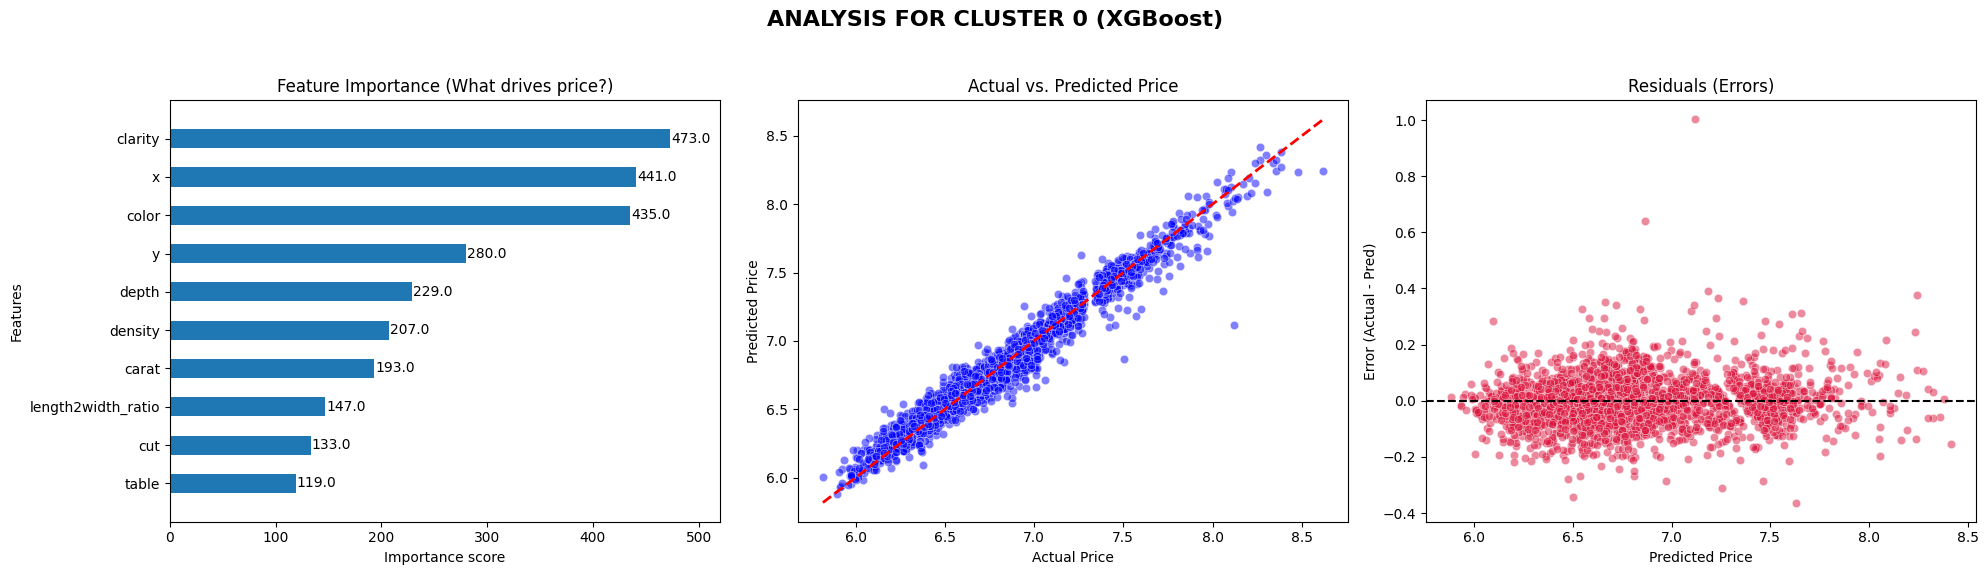

Generating Plots for Cluster 1...


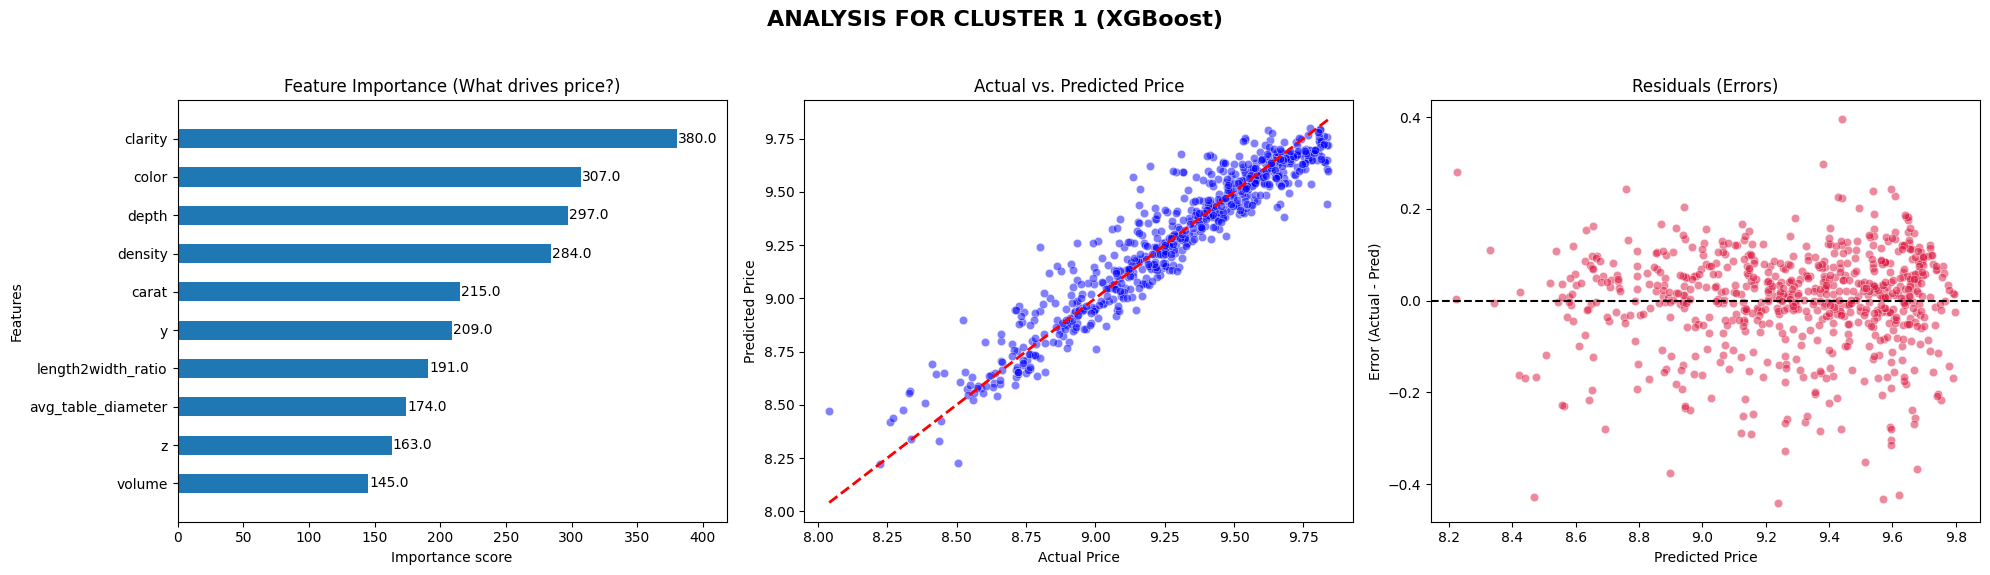

Generating Plots for Cluster 2...


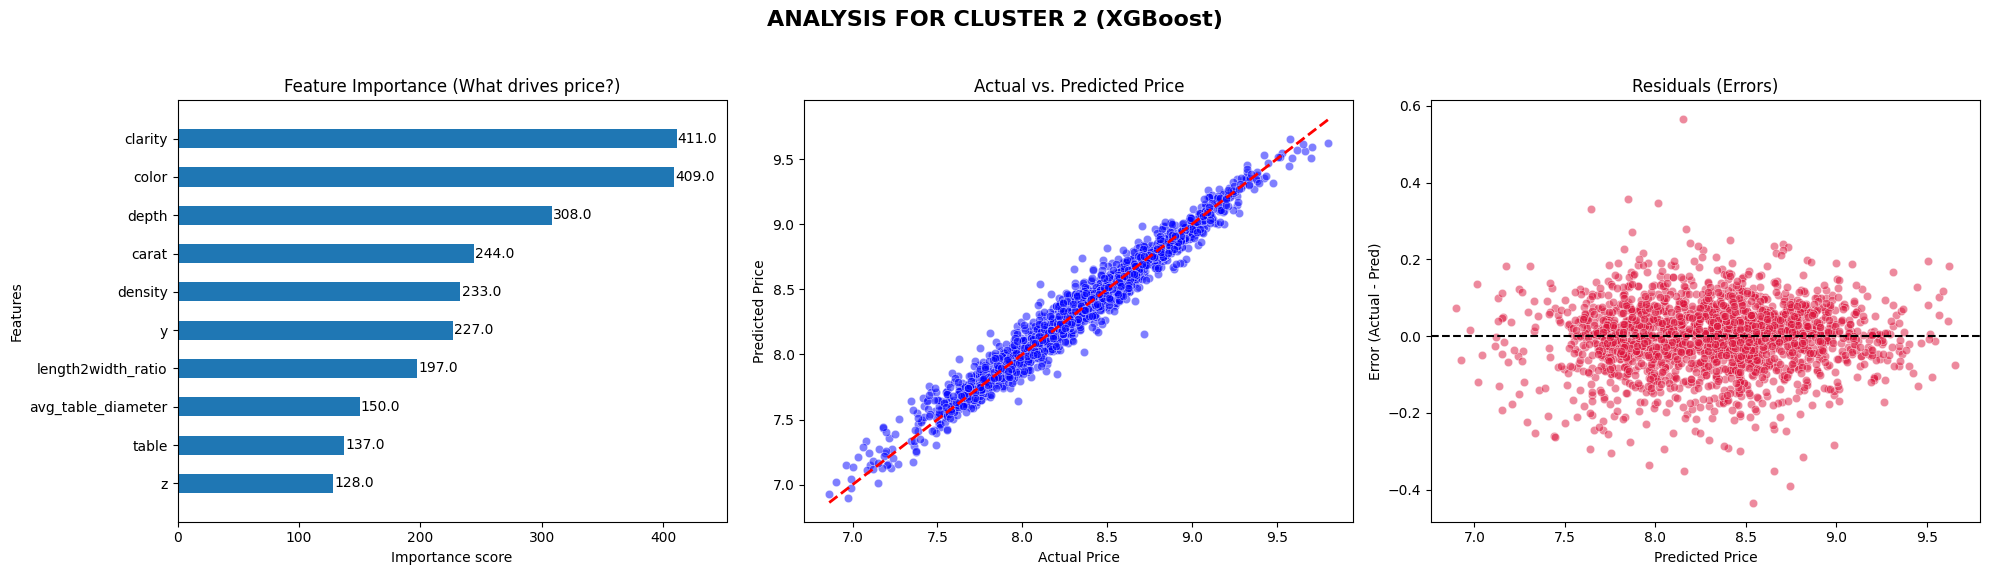

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor, plot_importance

# --- Configuration ---
# Define the best parameters you found for each cluster (or use the generic best ones)
# You can customize these dictionaries if you found different params for each cluster
params_c0 = {'n_estimators': 100, 'learning_rate': 0.1, 'max_depth': 5}
params_c1 = {'n_estimators': 100, 'learning_rate': 0.1, 'max_depth': 5}
params_c2 = {'n_estimators': 100, 'learning_rate': 0.1, 'max_depth': 5}

cluster_params = {0: params_c0, 1: params_c1, 2: params_c2}

# --- Loop Through Clusters to Plot ---
for cluster_id in [0, 1, 2]:
    
    # 1. Prepare Data
    X_train_c = X_train[X_train['cluster'] == cluster_id].drop(columns=['cluster'])
    y_train_c = y_train[X_train['cluster'] == cluster_id]
    X_test_c = X_test[X_test['cluster'] == cluster_id].drop(columns=['cluster'])
    y_test_c = y_test[X_test['cluster'] == cluster_id]
    
    # 2. Train Model (or load existing one)
    print(f"Generating Plots for Cluster {cluster_id}...")
    model = XGBRegressor(**cluster_params[cluster_id], random_state=42)
    model.fit(X_train_c, y_train_c)
    
    # 3. Predict
    y_pred = model.predict(X_test_c)
    residuals = y_test_c - y_pred
    
    # --- PLOTTING ---
    fig, axes = plt.subplots(1, 3, figsize=(20, 6))
    fig.suptitle(f'ANALYSIS FOR CLUSTER {cluster_id} (XGBoost)', fontsize=16, weight='bold')

    # A. Feature Importance
    # XGBoost has a built-in plotting function for this
    plot_importance(model, ax=axes[0], height=0.5, importance_type='weight', max_num_features=10)
    axes[0].set_title('Feature Importance (What drives price?)')
    axes[0].grid(False)

    # B. Actual vs Predicted
    sns.scatterplot(x=y_test_c, y=y_pred, alpha=0.5, ax=axes[1], color='blue')
    # Add a perfect diagonal line for reference
    min_val, max_val = min(y_test_c.min(), y_pred.min()), max(y_test_c.max(), y_pred.max())
    axes[1].plot([min_val, max_val], [min_val, max_val], 'r--', lw=2)
    axes[1].set_title('Actual vs. Predicted Price')
    axes[1].set_xlabel('Actual Price')
    axes[1].set_ylabel('Predicted Price')

    # C. Residual Plot
    sns.scatterplot(x=y_pred, y=residuals, alpha=0.5, ax=axes[2], color='crimson')
    axes[2].axhline(0, color='black', linestyle='--')
    axes[2].set_title('Residuals (Errors)')
    axes[2].set_xlabel('Predicted Price')
    axes[2].set_ylabel('Error (Actual - Pred)')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to make room for suptitle
    plt.show()

In [136]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from xgboost import XGBRegressor, plot_importance
from sklearn.linear_model import LinearRegression

# --- Configuration ---
# XGBoost params for Clusters 0 and 2
params_xgb = {'n_estimators': 100, 'learning_rate': 0.1, 'max_depth': 5}

# --- Loop Through Clusters ---
for cluster_id in [0, 1, 2]:
    
    # 1. Prepare Data
    X_train_c = X_train[X_train['cluster'] == cluster_id].drop(columns=['cluster'])
    y_train_c = y_train[X_train['cluster'] == cluster_id]
    X_test_c = X_test[X_test['cluster'] == cluster_id].drop(columns=['cluster'])
    y_test_c = y_test[X_test['cluster'] == cluster_id]
    
    # 2. Setup Plotting Canvas
    fig, axes = plt.subplots(1, 3, figsize=(20, 6))
    
    # --- CONDITIONAL LOGIC: Check Cluster ID ---
    
    # === CASE A: CLUSTER 1 (Use Multiple Linear Regression) ===
    if cluster_id == 3:
        print(f"Generating Plots for Cluster {cluster_id} (Linear Regression)...")
        
        # Train
        model = LinearRegression()
        model.fit(X_train_c, y_train_c)
        model_name = "Linear Regression"
        
        # Plot A: Feature Coefficients (Alternative to Feature Importance)
        # Linear regression uses 'coef_', not 'feature_importances_'
        coef_df = pd.DataFrame({
            'Feature': X_train_c.columns,
            'Coefficient': model.coef_
        }).sort_values(by='Coefficient', key=abs, ascending=False).head(10)
        
        sns.barplot(data=coef_df, x='Coefficient', y='Feature', ax=axes[0], palette='viridis')
        axes[0].set_title('Top Coefficients (Price Drivers)')
        axes[0].axvline(0, color='black', linestyle='--', linewidth=1)
        
    # === CASE B: CLUSTER 0 & 2 (Use XGBoost) ===
    else:
        print(f"Generating Plots for Cluster {cluster_id} (XGBoost)...")
        
        # Train
        model = XGBRegressor(**params_xgb, random_state=42)
        model.fit(X_train_c, y_train_c)
        model_name = "XGBoost"
        
        # Plot A: Feature Importance (Built-in XGBoost plot)
        plot_importance(model, ax=axes[0], height=0.5, importance_type='weight', max_num_features=10)
        axes[0].set_title('Feature Importance (What drives price?)')
        axes[0].grid(False)

    # 3. Predict (Same for both models)
    y_pred = model.predict(X_test_c)
    residuals = y_test_c - y_pred

    # 4. Standard Plots (Same for both models)
    
    # B. Actual vs Predicted
    sns.scatterplot(x=y_test_c, y=y_pred, alpha=0.5, ax=axes[1], color='blue')
    min_val, max_val = min(y_test_c.min(), y_pred.min()), max(y_test_c.max(), y_pred.max())
    axes[1].plot([min_val, max_val], [min_val, max_val], 'r--', lw=2)
    axes[1].set_title('Actual vs. Predicted Price')
    axes[1].set_xlabel('Actual Price')
    axes[1].set_ylabel('Predicted Price')

    # C. Residual Plot
    sns.scatterplot(x=y_pred, y=residuals, alpha=0.5, ax=axes[2], color='crimson')
    axes[2].axhline(0, color='black', linestyle='--')
    axes[2].set_title('Residuals (Errors)')
    axes[2].set_xlabel('Predicted Price')
    axes[2].set_ylabel('Error (Actual - Pred)')

    # Final Formatting
    fig.suptitle(f'ANALYSIS FOR CLUSTER {cluster_id} ({model_name})', fontsize=16, weight='bold')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

KeyError: 'cluster'

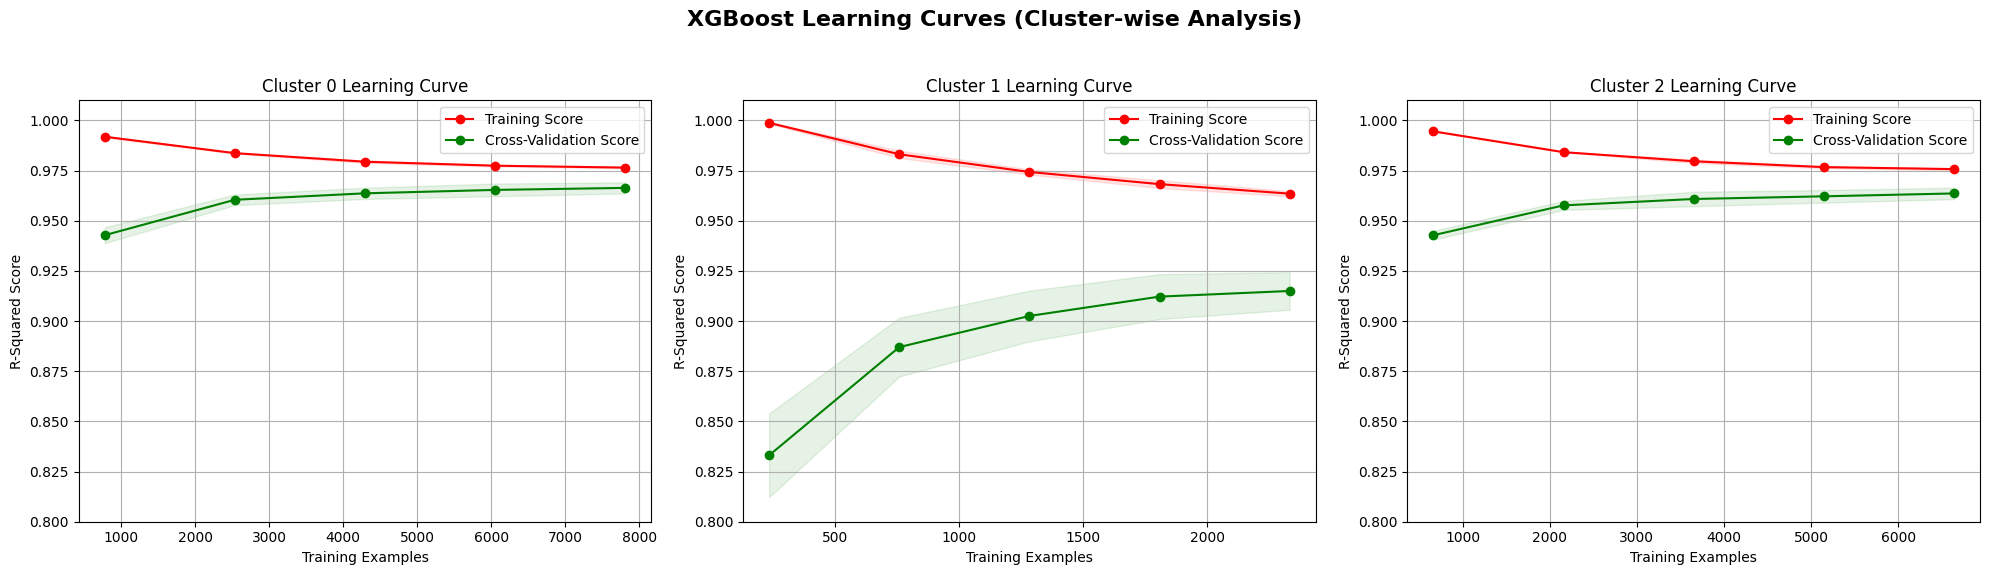

In [106]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from xgboost import XGBRegressor

# --- Configuration ---
# Use the best parameters you found. If you want to use the generic ones, keep these.
# If you saved your specific best_params from the previous step, replace these dictionaries.
params = {'n_estimators': 100, 'learning_rate': 0.1, 'max_depth': 5}

# --- Plotting Setup ---
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('XGBoost Learning Curves (Cluster-wise Analysis)', fontsize=16, weight='bold')

# --- Loop Through Clusters ---
for cluster_id in [0, 1, 2]:
    
    # 1. Filter Data
    X_train_c = X_train[X_train['cluster'] == cluster_id].drop(columns=['cluster'])
    y_train_c = y_train[X_train['cluster'] == cluster_id]
    
    # 2. Compute Learning Curve
    # train_sizes: We check the score at 10%, 30%, 50%, 70%, and 100% of the data
    train_sizes, train_scores, test_scores = learning_curve(
        XGBRegressor(**params, random_state=42), 
        X_train_c, 
        y_train_c, 
        cv=5, 
        scoring='r2', 
        n_jobs=-1, 
        train_sizes=np.linspace(0.1, 1.0, 5)
    )
    
    # 3. Calculate Mean and Std Deviation
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    # 4. Plotting
    ax = axes[cluster_id]
    ax.set_title(f"Cluster {cluster_id} Learning Curve")
    ax.set_xlabel("Training Examples")
    ax.set_ylabel("R-Squared Score")
    ax.set_ylim(0.8, 1.01) # adjusting y-axis to focus on the top performance
    ax.grid(True)
    
    # Plot Training Score (Red)
    ax.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
    ax.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    
    # Plot Cross-Validation Score (Green)
    ax.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-Validation Score")
    ax.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    ax.legend(loc="best")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Calculating Learning Curve for Cluster 0 using XGBoost...
Calculating Learning Curve for Cluster 1 using XGBoost...
Calculating Learning Curve for Cluster 2 using XGBoost...


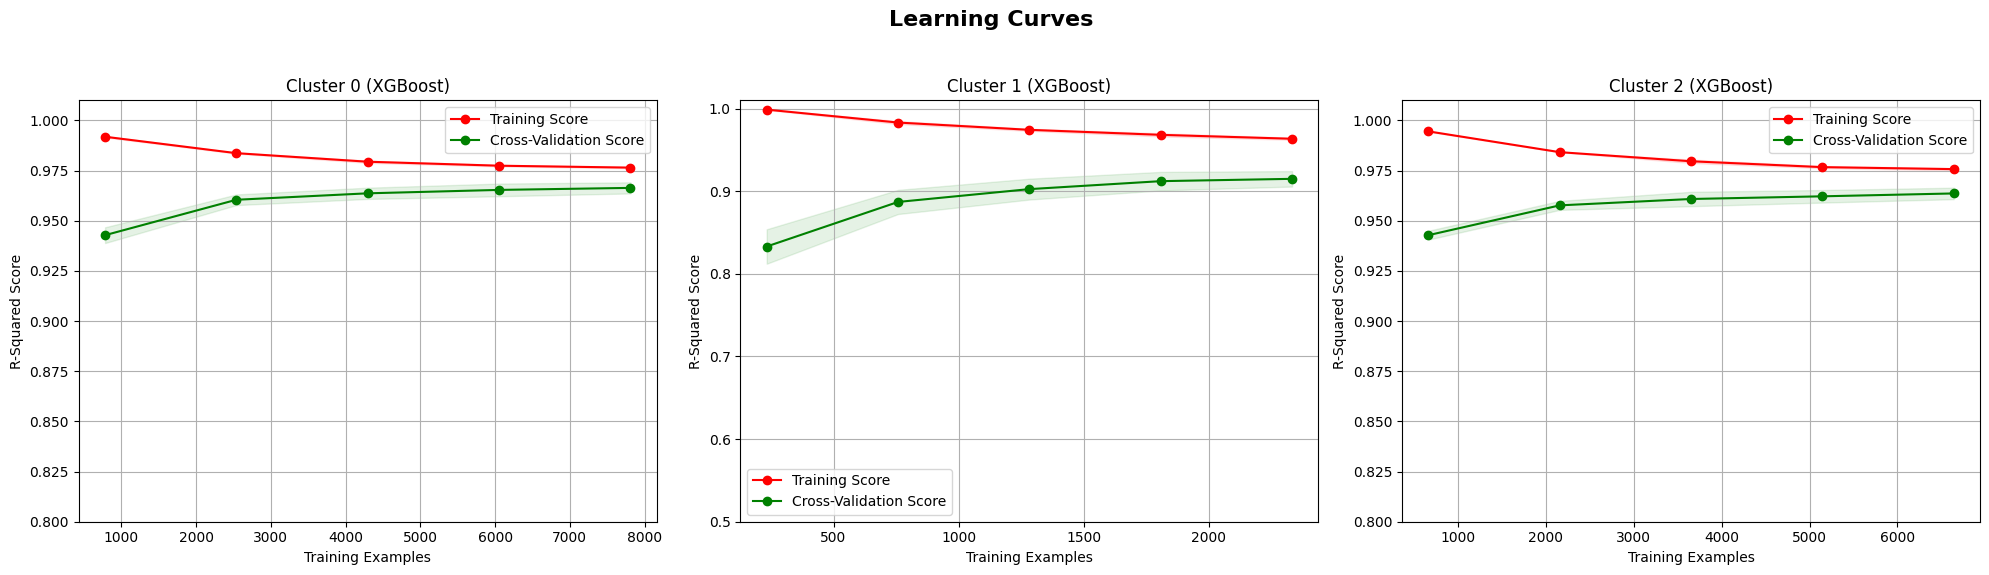

In [107]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression

# --- Configuration ---
# XGBoost params for Cluster 0 and 2
xgb_params = {'n_estimators': 100, 'learning_rate': 0.1, 'max_depth': 5}

# --- Plotting Setup ---
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Learning Curves ', fontsize=16, weight='bold')

# --- Loop Through Clusters ---
for cluster_id in [0, 1, 2]:
    
    # 1. Filter Data
    X_train_c = X_train[X_train['cluster'] == cluster_id].drop(columns=['cluster'])
    y_train_c = y_train[X_train['cluster'] == cluster_id]
    
    # 2. SELECT MODEL BASED ON CLUSTER
    if cluster_id == 3:
        # Cluster 1: Use Linear Regression
        model = LinearRegression()
        model_name = "Linear Regression"
    else:
        # Cluster 0 & 2: Use XGBoost
        model = XGBRegressor(**xgb_params, random_state=42)
        model_name = "XGBoost"

    # 3. Compute Learning Curve
    print(f"Calculating Learning Curve for Cluster {cluster_id} using {model_name}...")
    
    train_sizes, train_scores, test_scores = learning_curve(
        model, 
        X_train_c, 
        y_train_c, 
        cv=5, 
        scoring='r2', 
        n_jobs=-1, 
        # For Linear Regression, we don't need many points to converge, 
        # but we keep the same linspace for consistency
        train_sizes=np.linspace(0.1, 1.0, 5)
    )
    
    # 4. Calculate Stats
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    # 5. Plotting
    ax = axes[cluster_id]
    ax.set_title(f"Cluster {cluster_id} ({model_name})")
    ax.set_xlabel("Training Examples")
    ax.set_ylabel("R-Squared Score")
    # Adjust Y-limit: Linear Regression R2 might be lower, so we widen the view slightly
    ax.set_ylim(0.5, 1.01) if cluster_id == 1 else ax.set_ylim(0.8, 1.01) 
    ax.grid(True)
    
    # Plot Training Score (Red)
    ax.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
    ax.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    
    # Plot Cross-Validation Score (Green)
    ax.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-Validation Score")
    ax.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    ax.legend(loc="best")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Generating Partial Dependence Plot for Cluster 0...


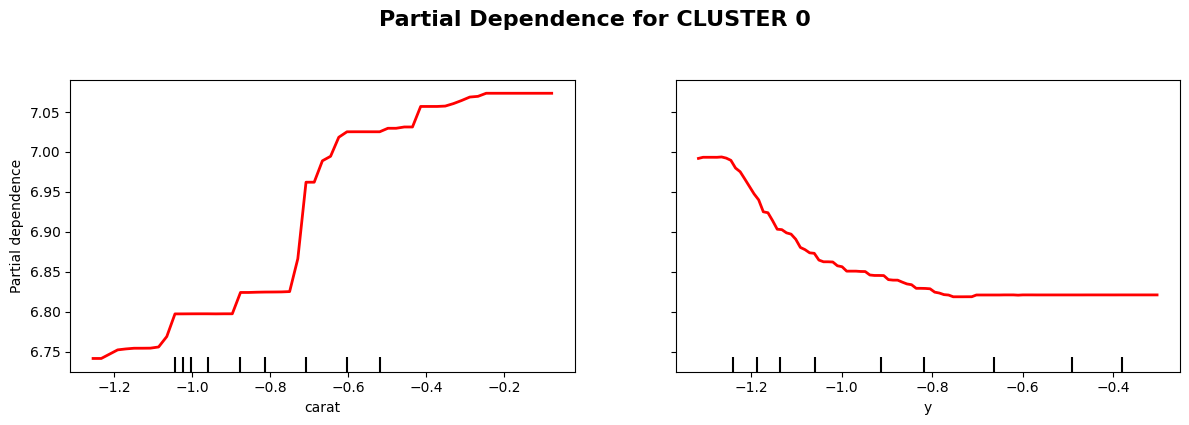

Generating Partial Dependence Plot for Cluster 1...


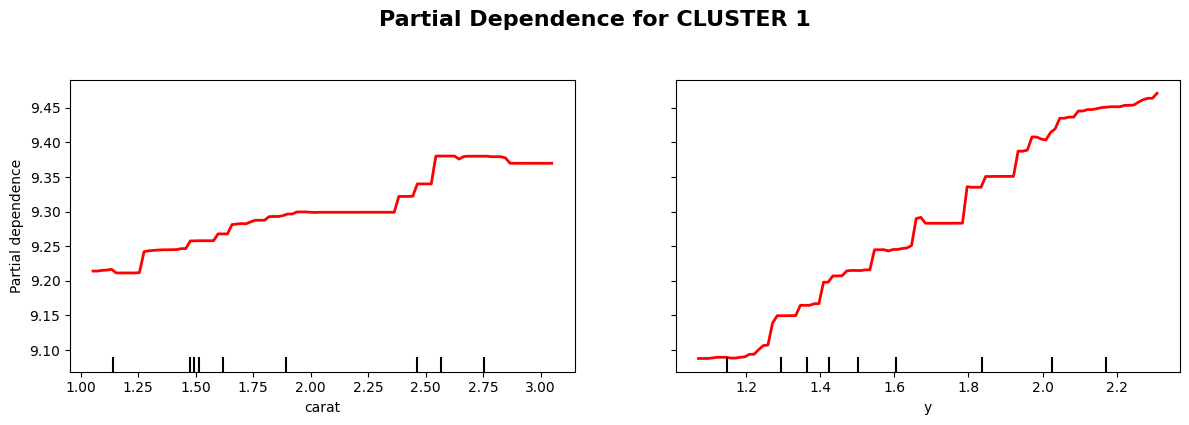

Generating Partial Dependence Plot for Cluster 2...


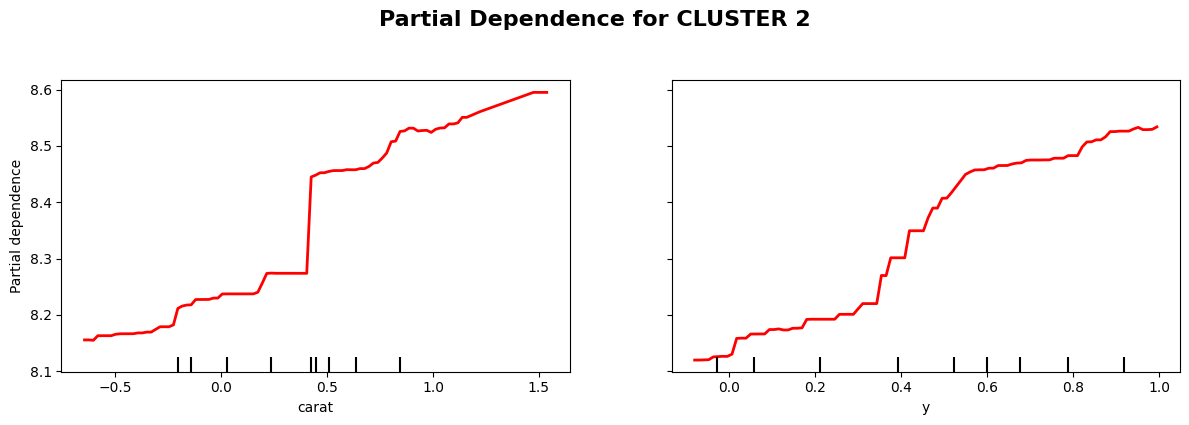

In [108]:
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay
from xgboost import XGBRegressor

# --- Configuration ---
# Define the features you want to analyze deeply.
# 'carat' is usually the most important. You can change 'y' to 'depth' or 'table'.
features_to_plot = ['carat', 'y'] 

# Best params (update these if you found specific best params per cluster)
params = {'n_estimators': 100, 'learning_rate': 0.1, 'max_depth': 5}

# --- Loop Through Clusters ---
for cluster_id in [0, 1, 2]:
    
    # 1. Prepare Data
    # We need the DataFrame format to keep column names for the plot
    X_train_c = X_train[X_train['cluster'] == cluster_id].drop(columns=['cluster'])
    y_train_c = y_train[X_train['cluster'] == cluster_id]
    
    # 2. Train Model
    # (PDP requires a fitted model to query "what if?" scenarios)
    model = XGBRegressor(**params, random_state=42)
    model.fit(X_train_c, y_train_c)
    
    # 3. Generate Plot
    print(f"Generating Partial Dependence Plot for Cluster {cluster_id}...")
    
    fig, ax = plt.subplots(figsize=(12, 4))
    fig.suptitle(f'Partial Dependence for CLUSTER {cluster_id}', fontsize=16, weight='bold', y=1.05)
    
    # This function automatically calculates and plots the curves
    display = PartialDependenceDisplay.from_estimator(
        estimator=model,
        X=X_train_c,
        features=features_to_plot,
        kind="average", # Shows the average effect
        ax=ax,
        line_kw={"color": "red", "linewidth": 2}
    )
    
    plt.tight_layout()
    plt.show()

Generating Partial Dependence Plot for Cluster 0...


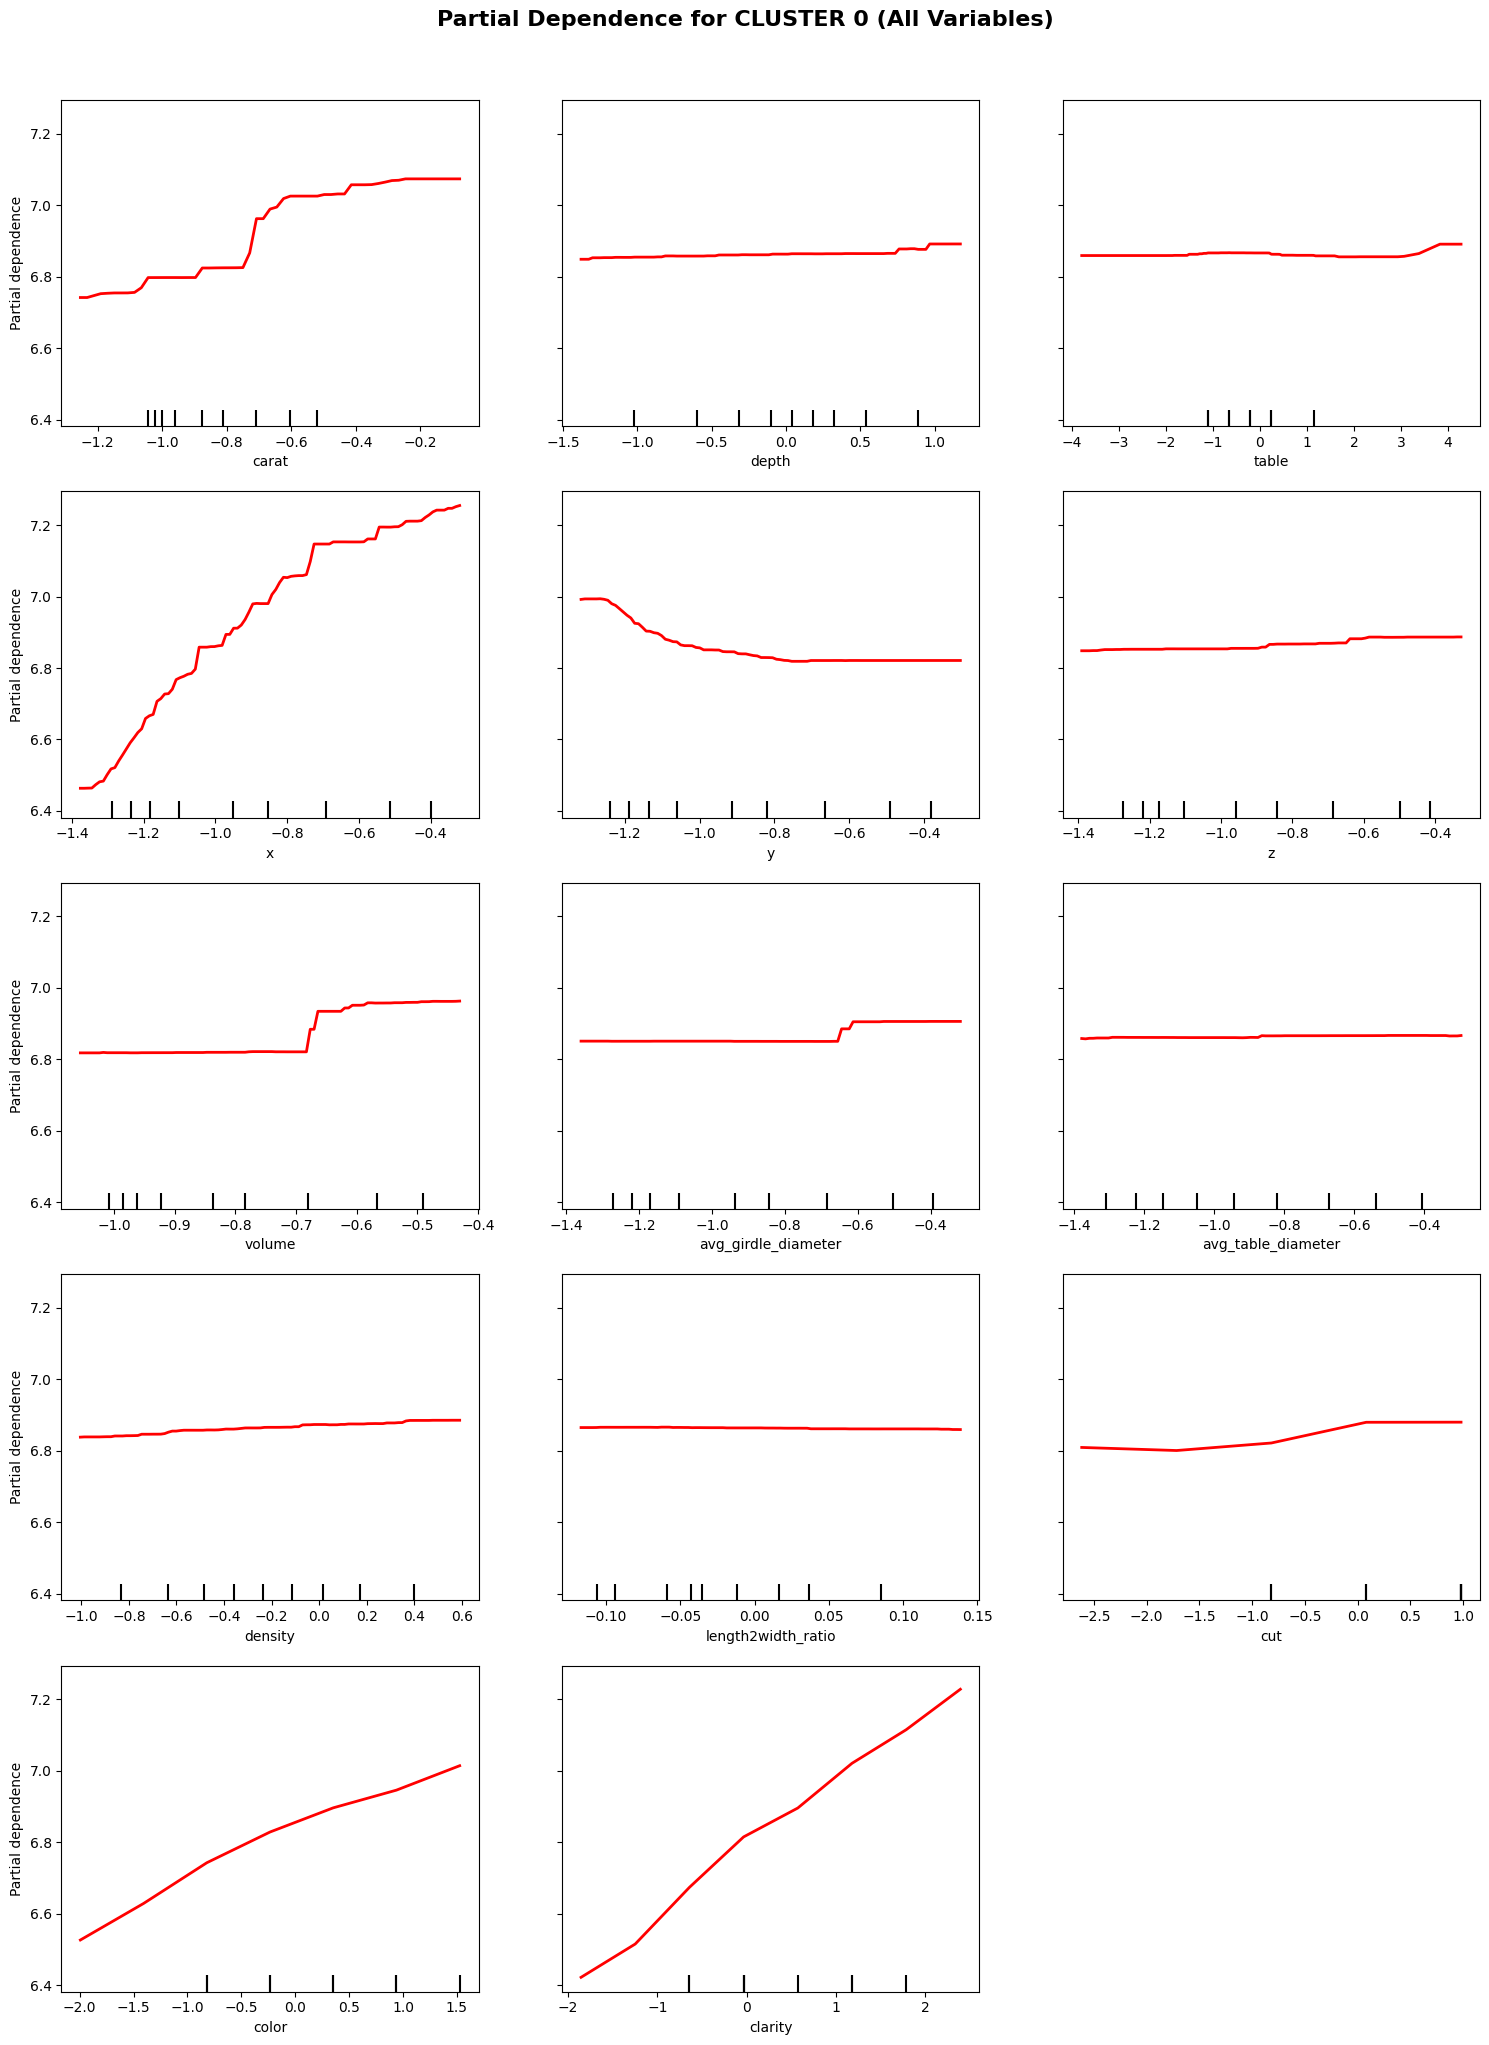

Generating Partial Dependence Plot for Cluster 1...


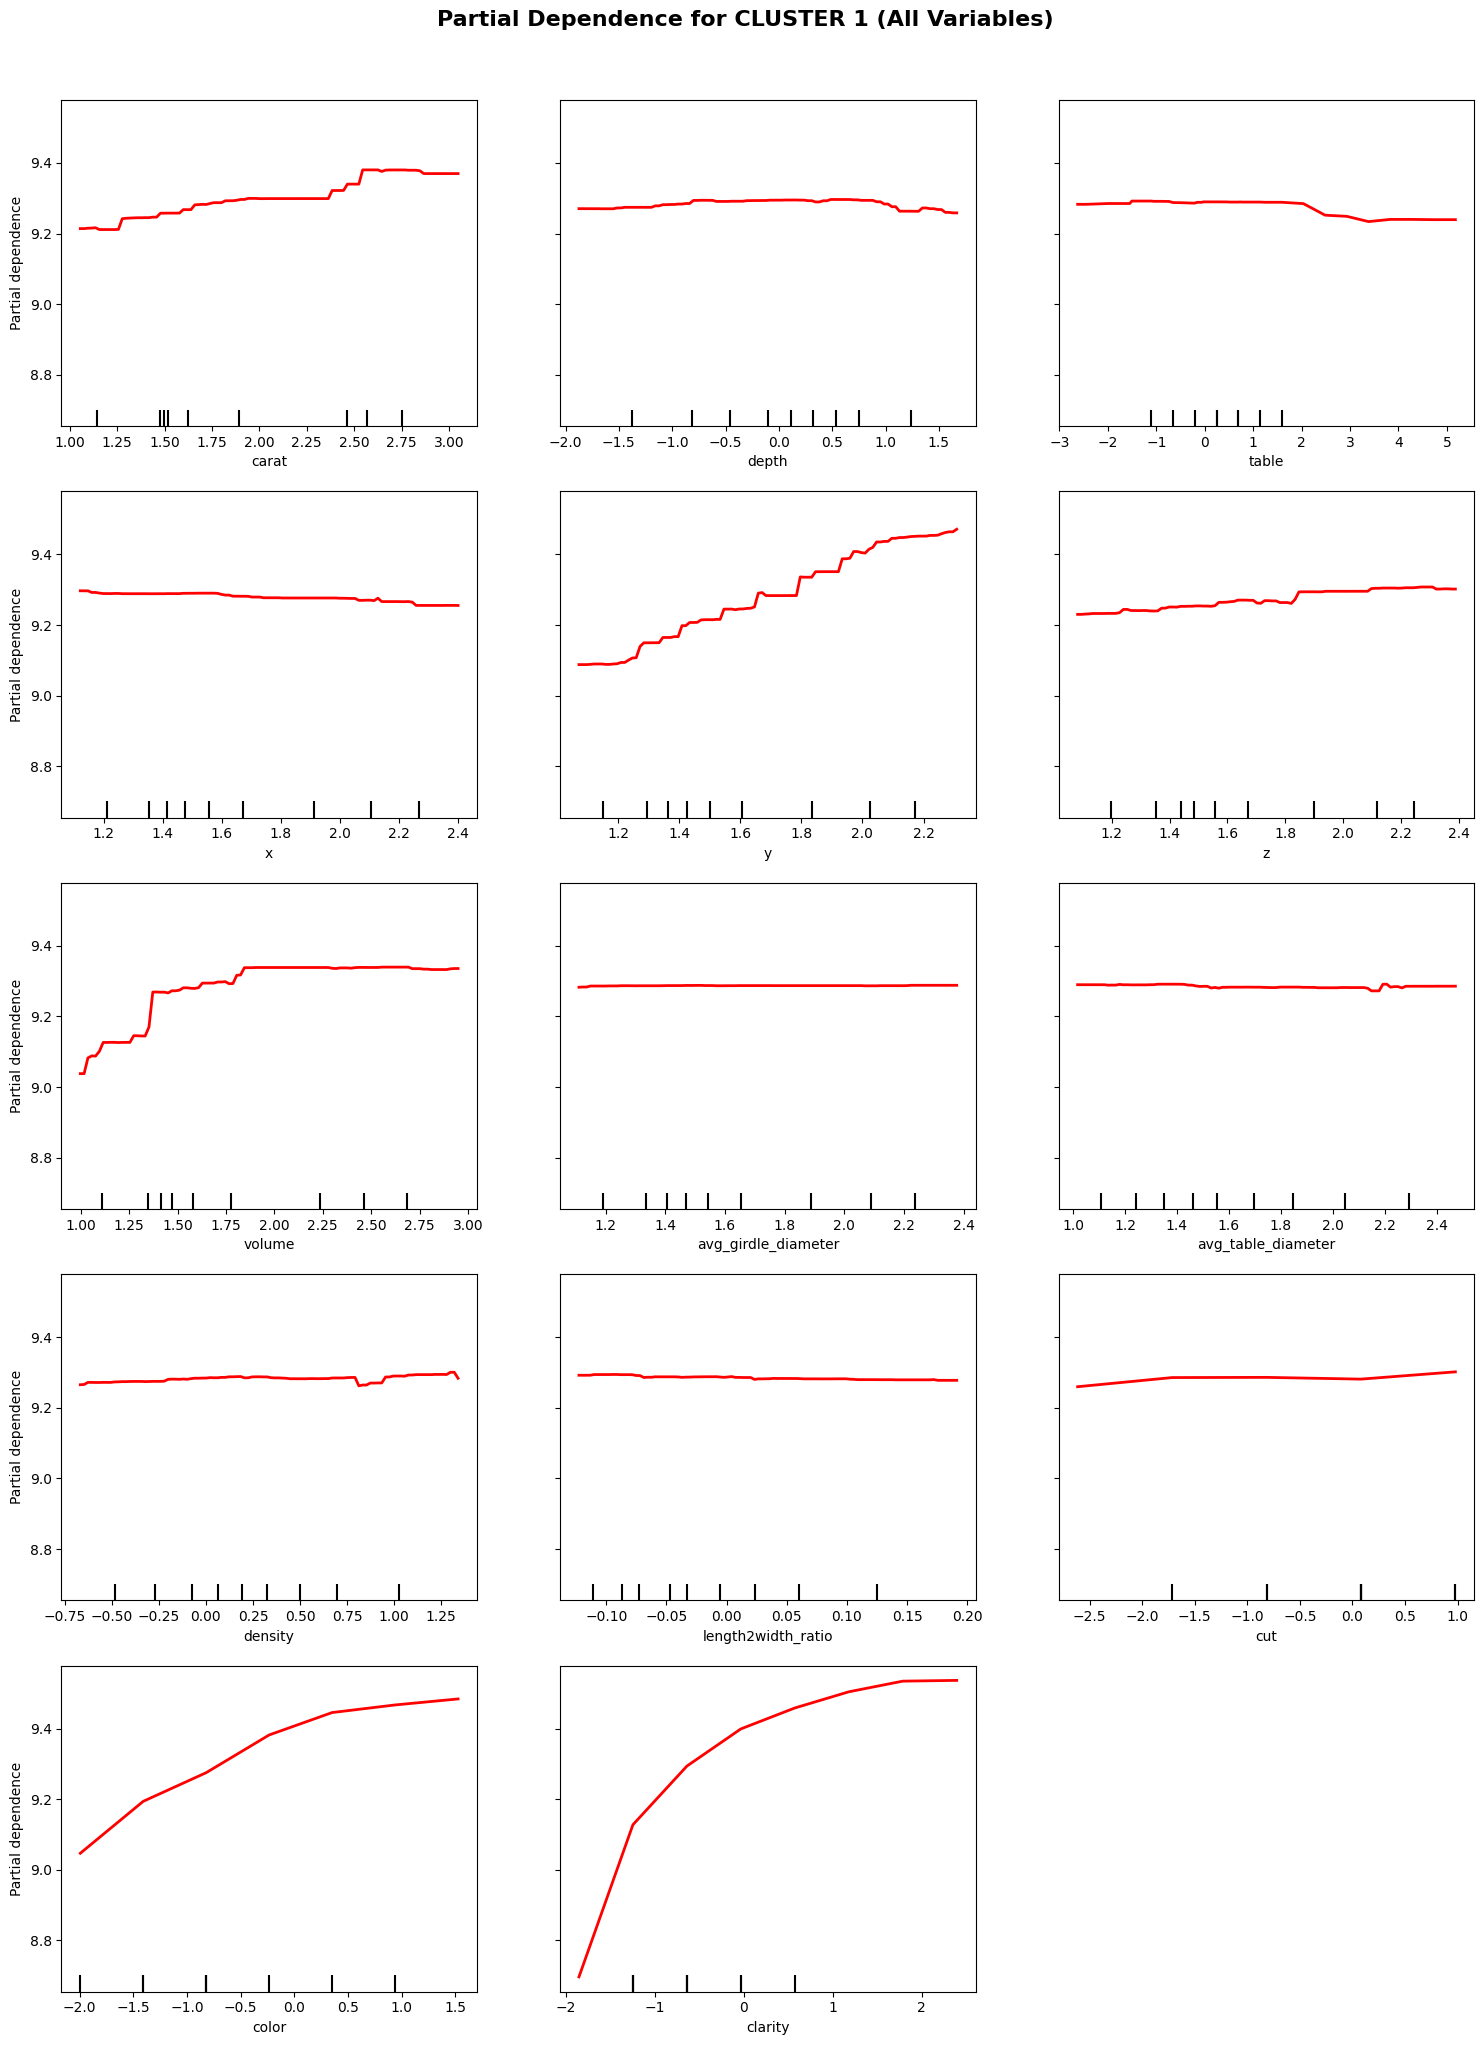

Generating Partial Dependence Plot for Cluster 2...


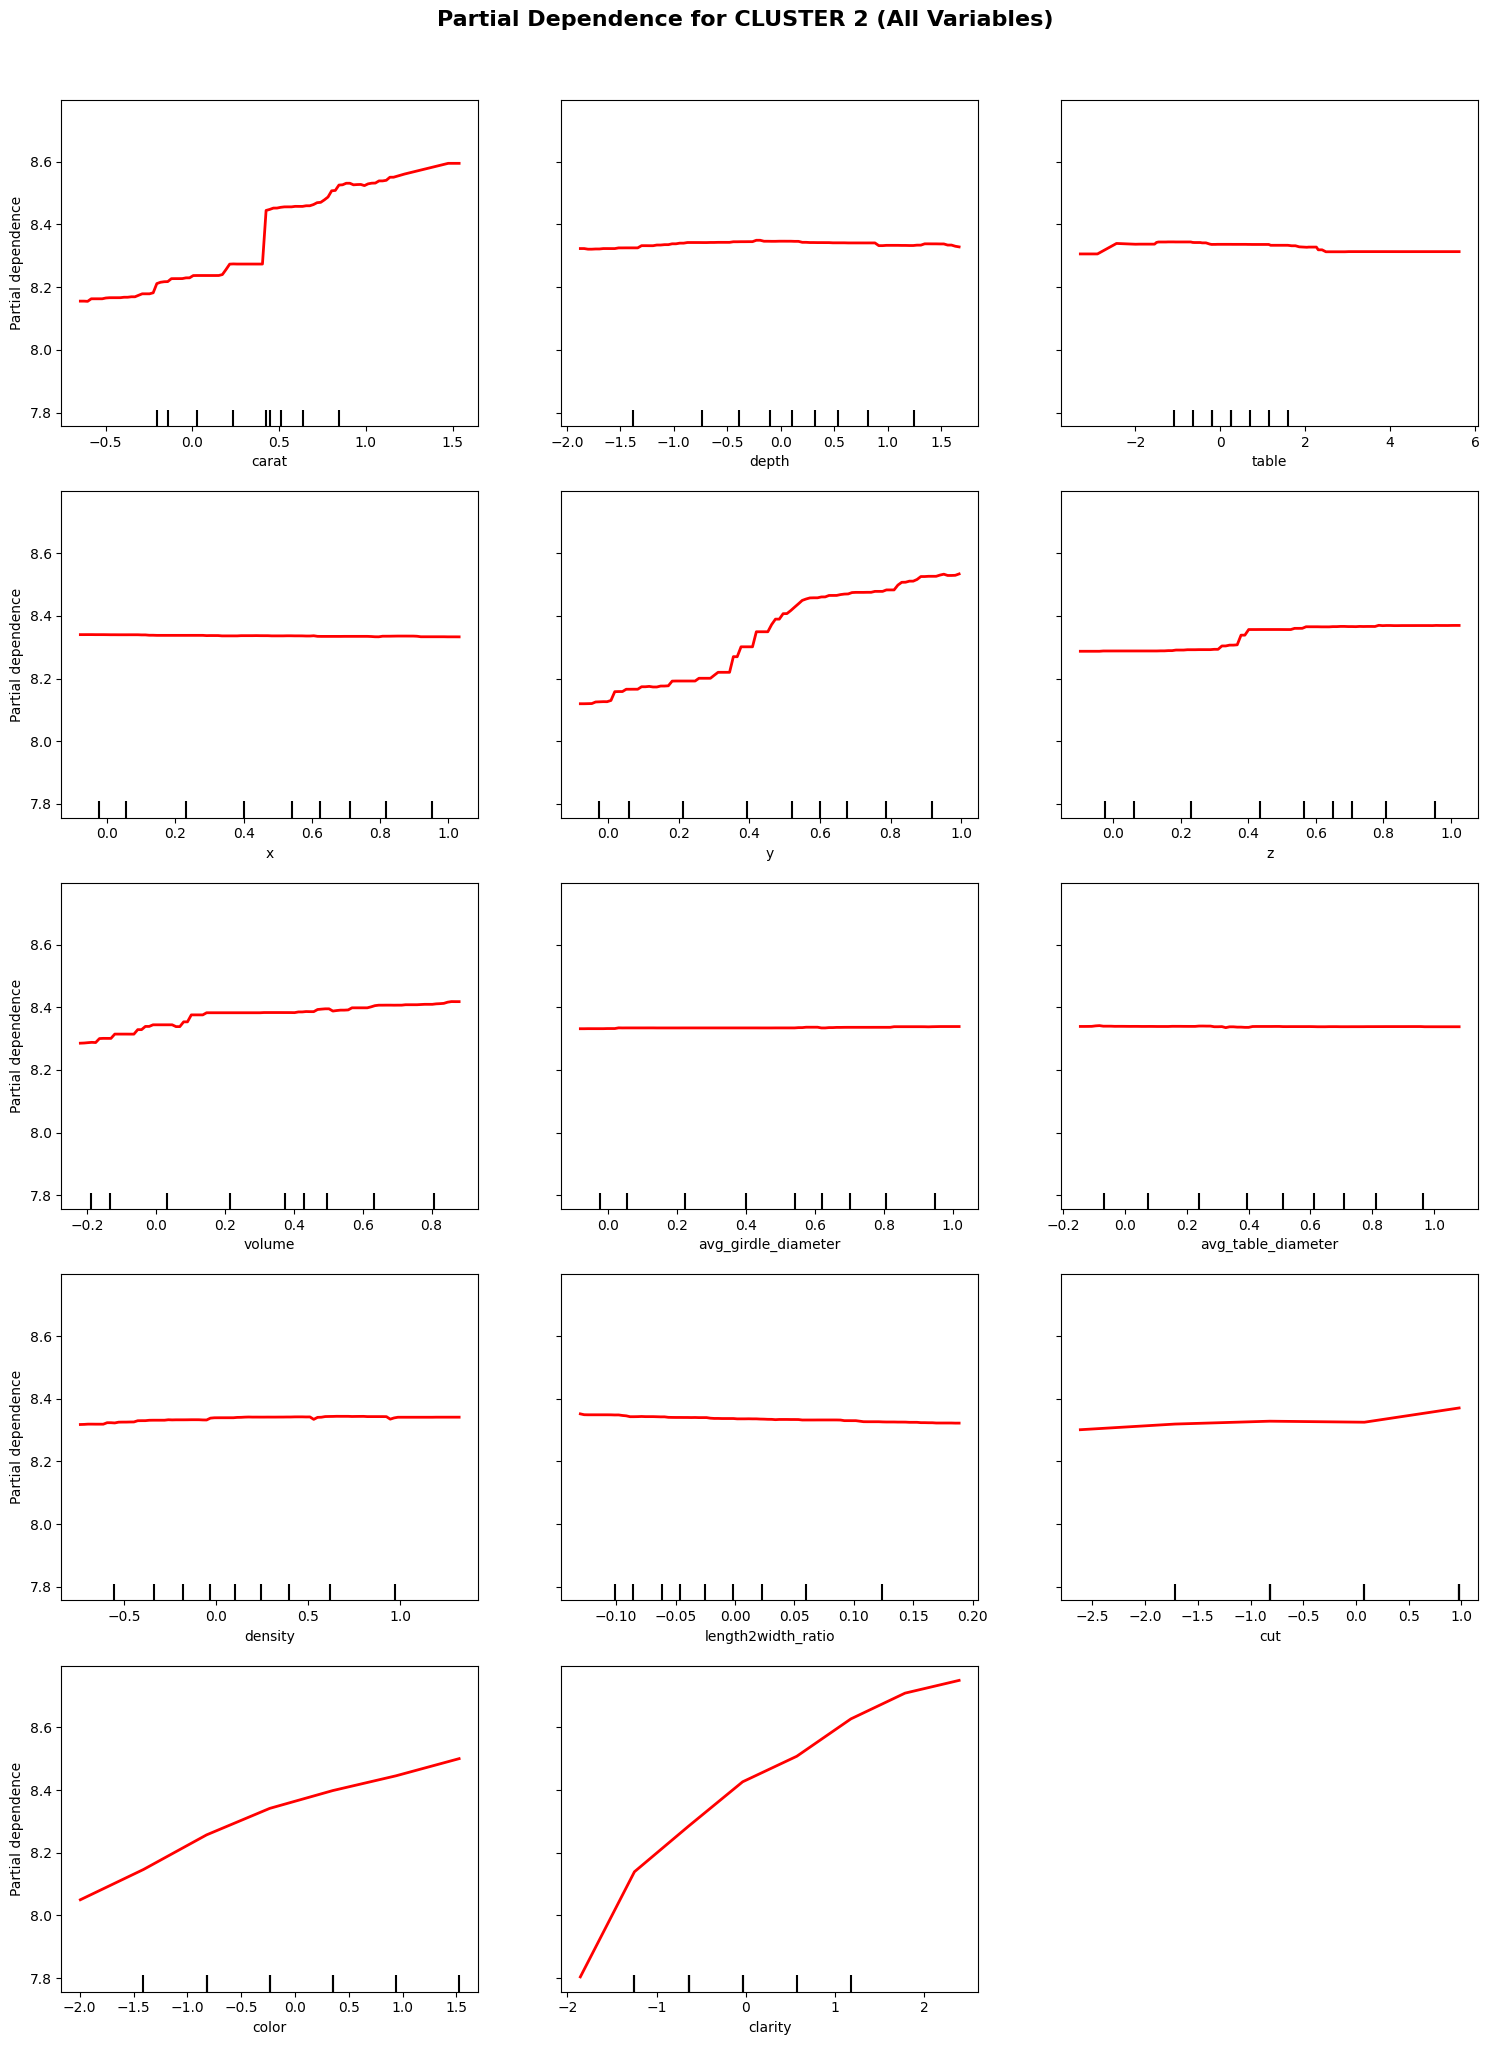

In [109]:
import matplotlib.pyplot as plt
import math
from sklearn.inspection import PartialDependenceDisplay
from xgboost import XGBRegressor

# --- Configuration ---
# Best params (update these if you found specific best params per cluster)
params = {'n_estimators': 100, 'learning_rate': 0.1, 'max_depth': 5}

# --- Loop Through Clusters ---
for cluster_id in [0, 1, 2]:
    
    # 1. Prepare Data
    # Filter by cluster and drop the cluster column to isolate features
    X_train_c = X_train[X_train['cluster'] == cluster_id].drop(columns=['cluster'])
    y_train_c = y_train[X_train['cluster'] == cluster_id]
    
    # --- CHANGE: Get ALL features automatically ---
    features_to_plot = X_train_c.columns.tolist()
    
    # 2. Train Model
    model = XGBRegressor(**params, random_state=42)
    model.fit(X_train_c, y_train_c)
    
    # 3. Generate Plot
    print(f"Generating Partial Dependence Plot for Cluster {cluster_id}...")
    
    # Calculate grid size for the plot (e.g., 3 columns wide)
    n_cols = 3
    n_features = len(features_to_plot)
    n_rows = math.ceil(n_features / n_cols)
    
    # Create the display
    # We let sklearn generate the figure grid automatically using n_cols
    display = PartialDependenceDisplay.from_estimator(
        estimator=model,
        X=X_train_c,
        features=features_to_plot,
        kind="average", 
        n_cols=n_cols,          # Arranges plots in 3 columns
        line_kw={"color": "red", "linewidth": 2}
    )
    
    # Access the figure object created by the display to customize it
    fig = display.figure_
    fig.set_size_inches(15, 4 * n_rows) # Dynamically adjust height based on rows
    fig.suptitle(f'Partial Dependence for CLUSTER {cluster_id} (All Variables)', fontsize=16, weight='bold', y=1.02)
    
    plt.tight_layout()
    plt.show()

Generating PDP for Cluster 0 (XGBoost)...


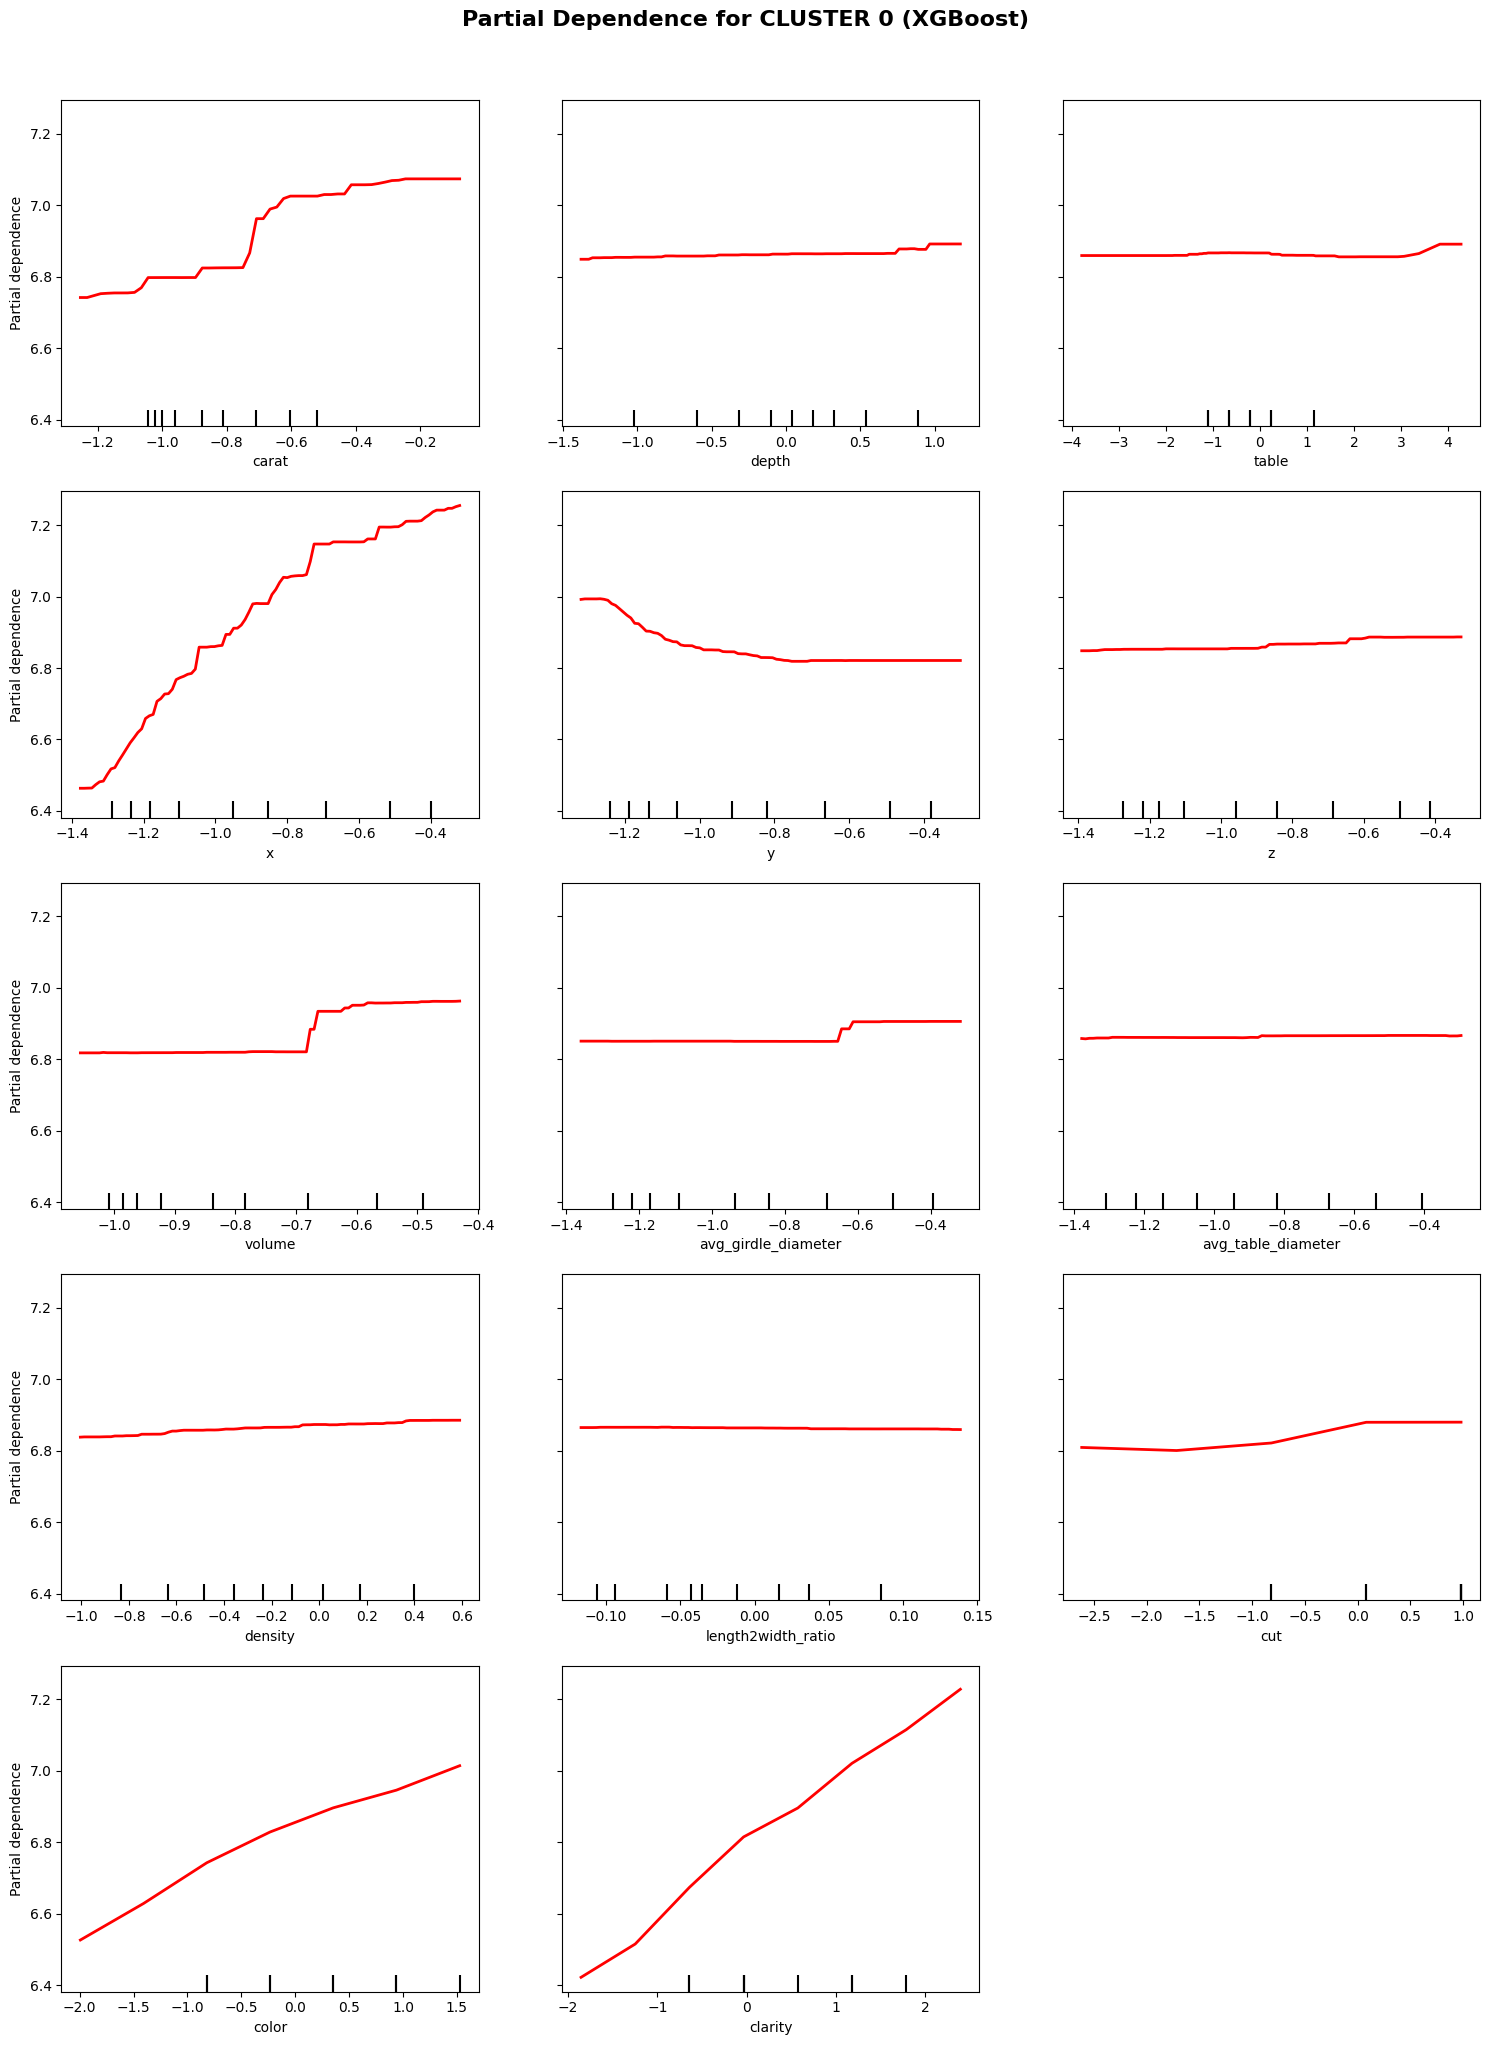

Generating PDP for Cluster 1 (Linear Regression)...


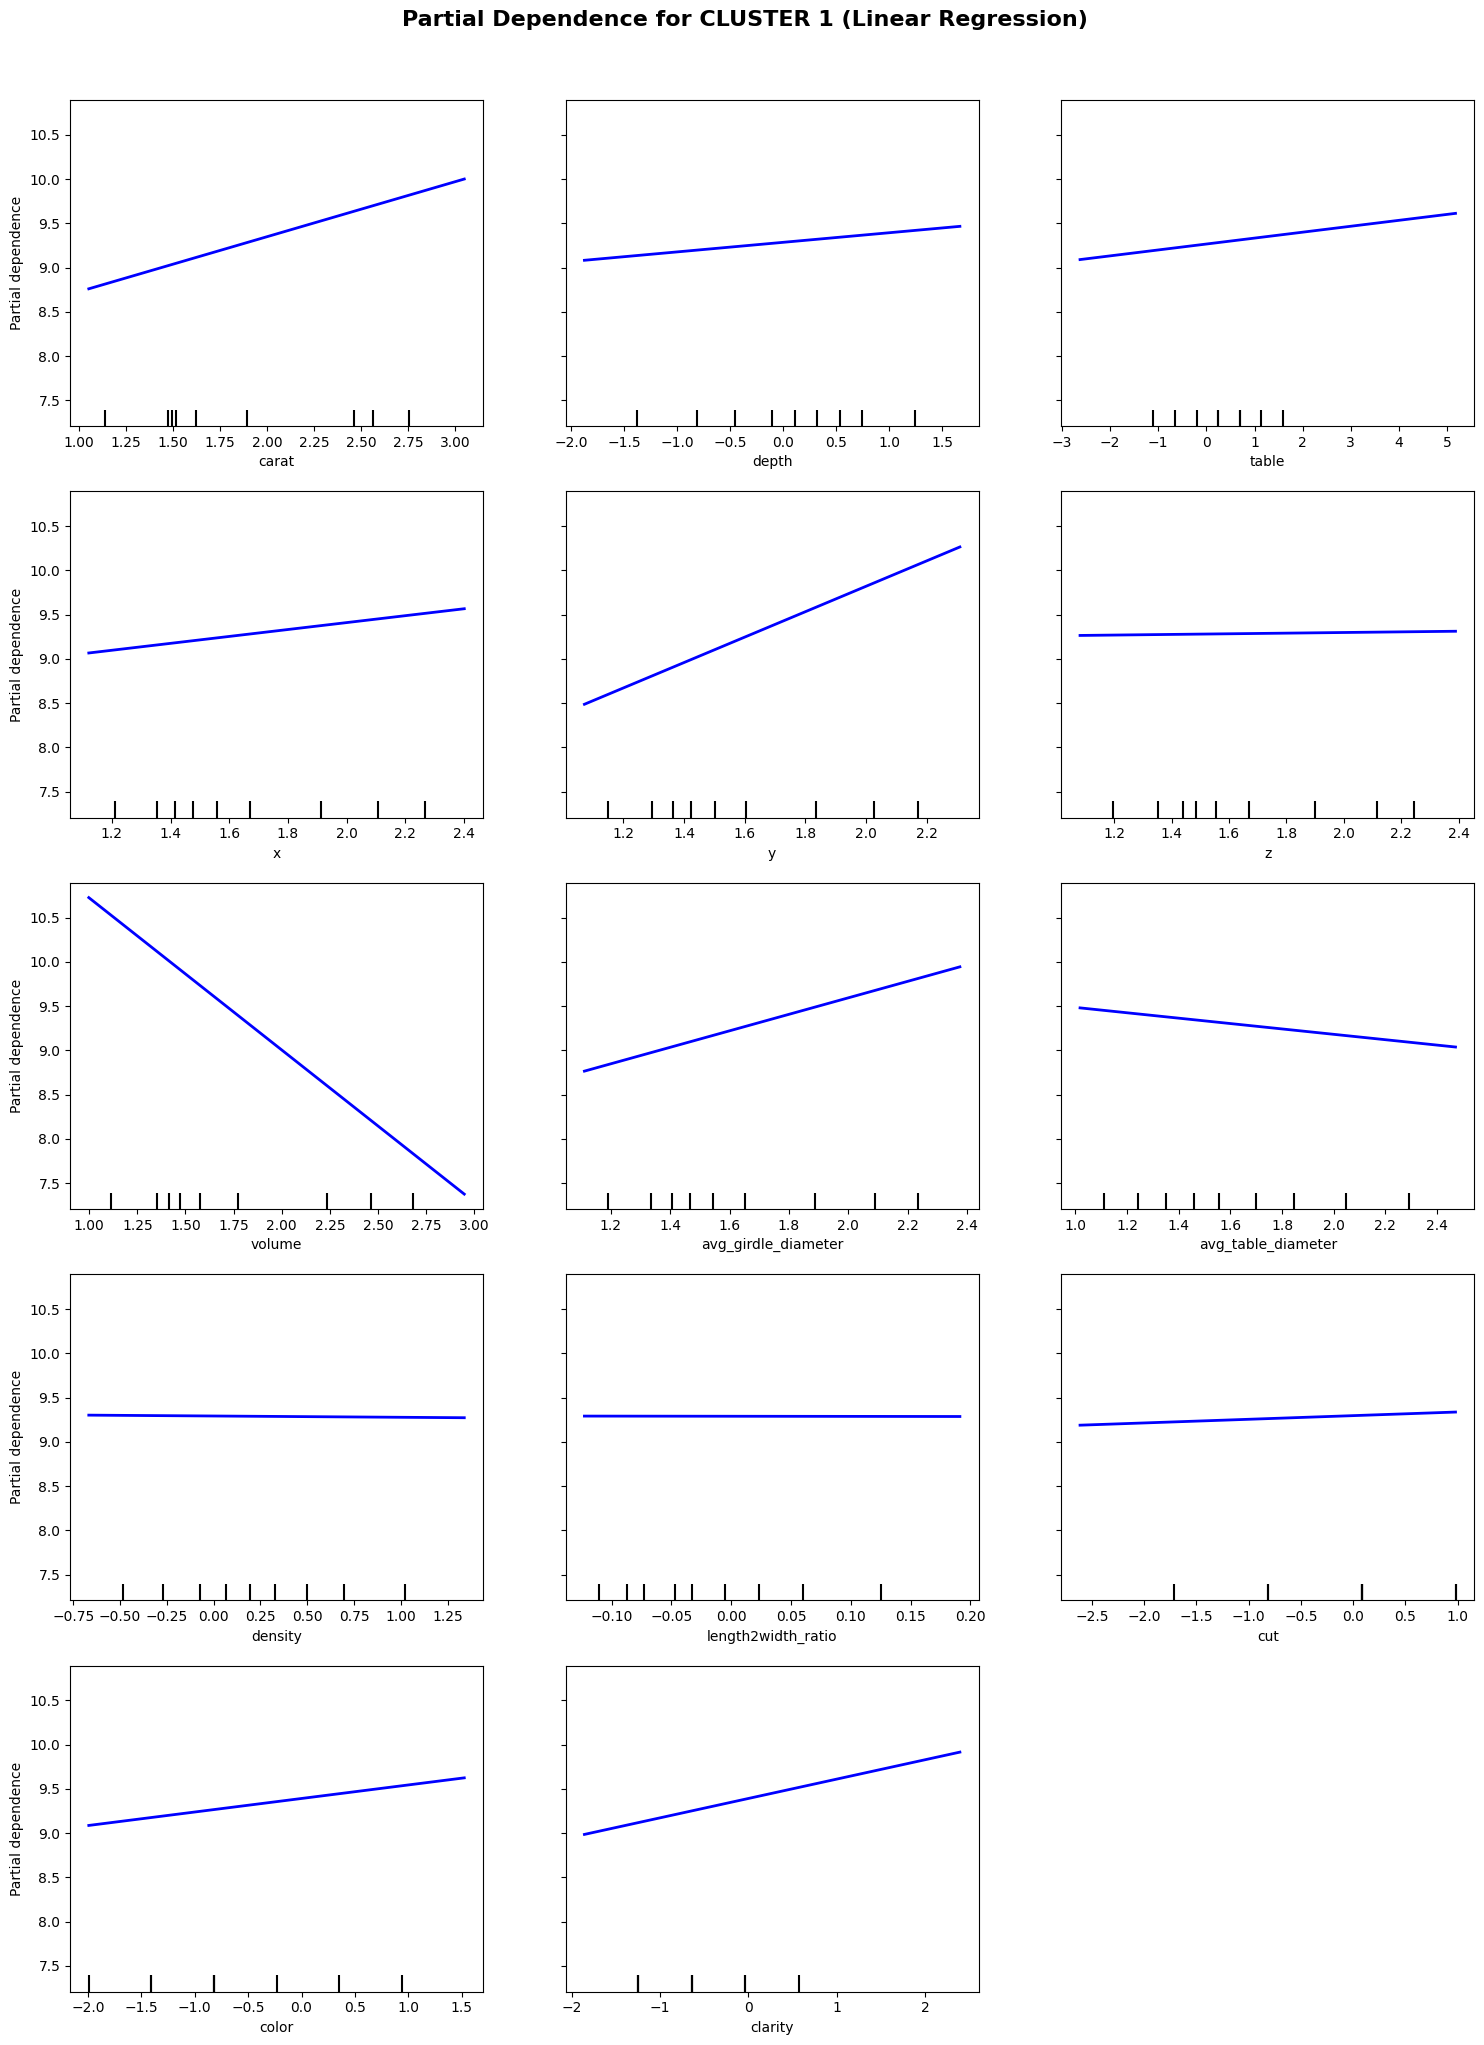

Generating PDP for Cluster 2 (XGBoost)...


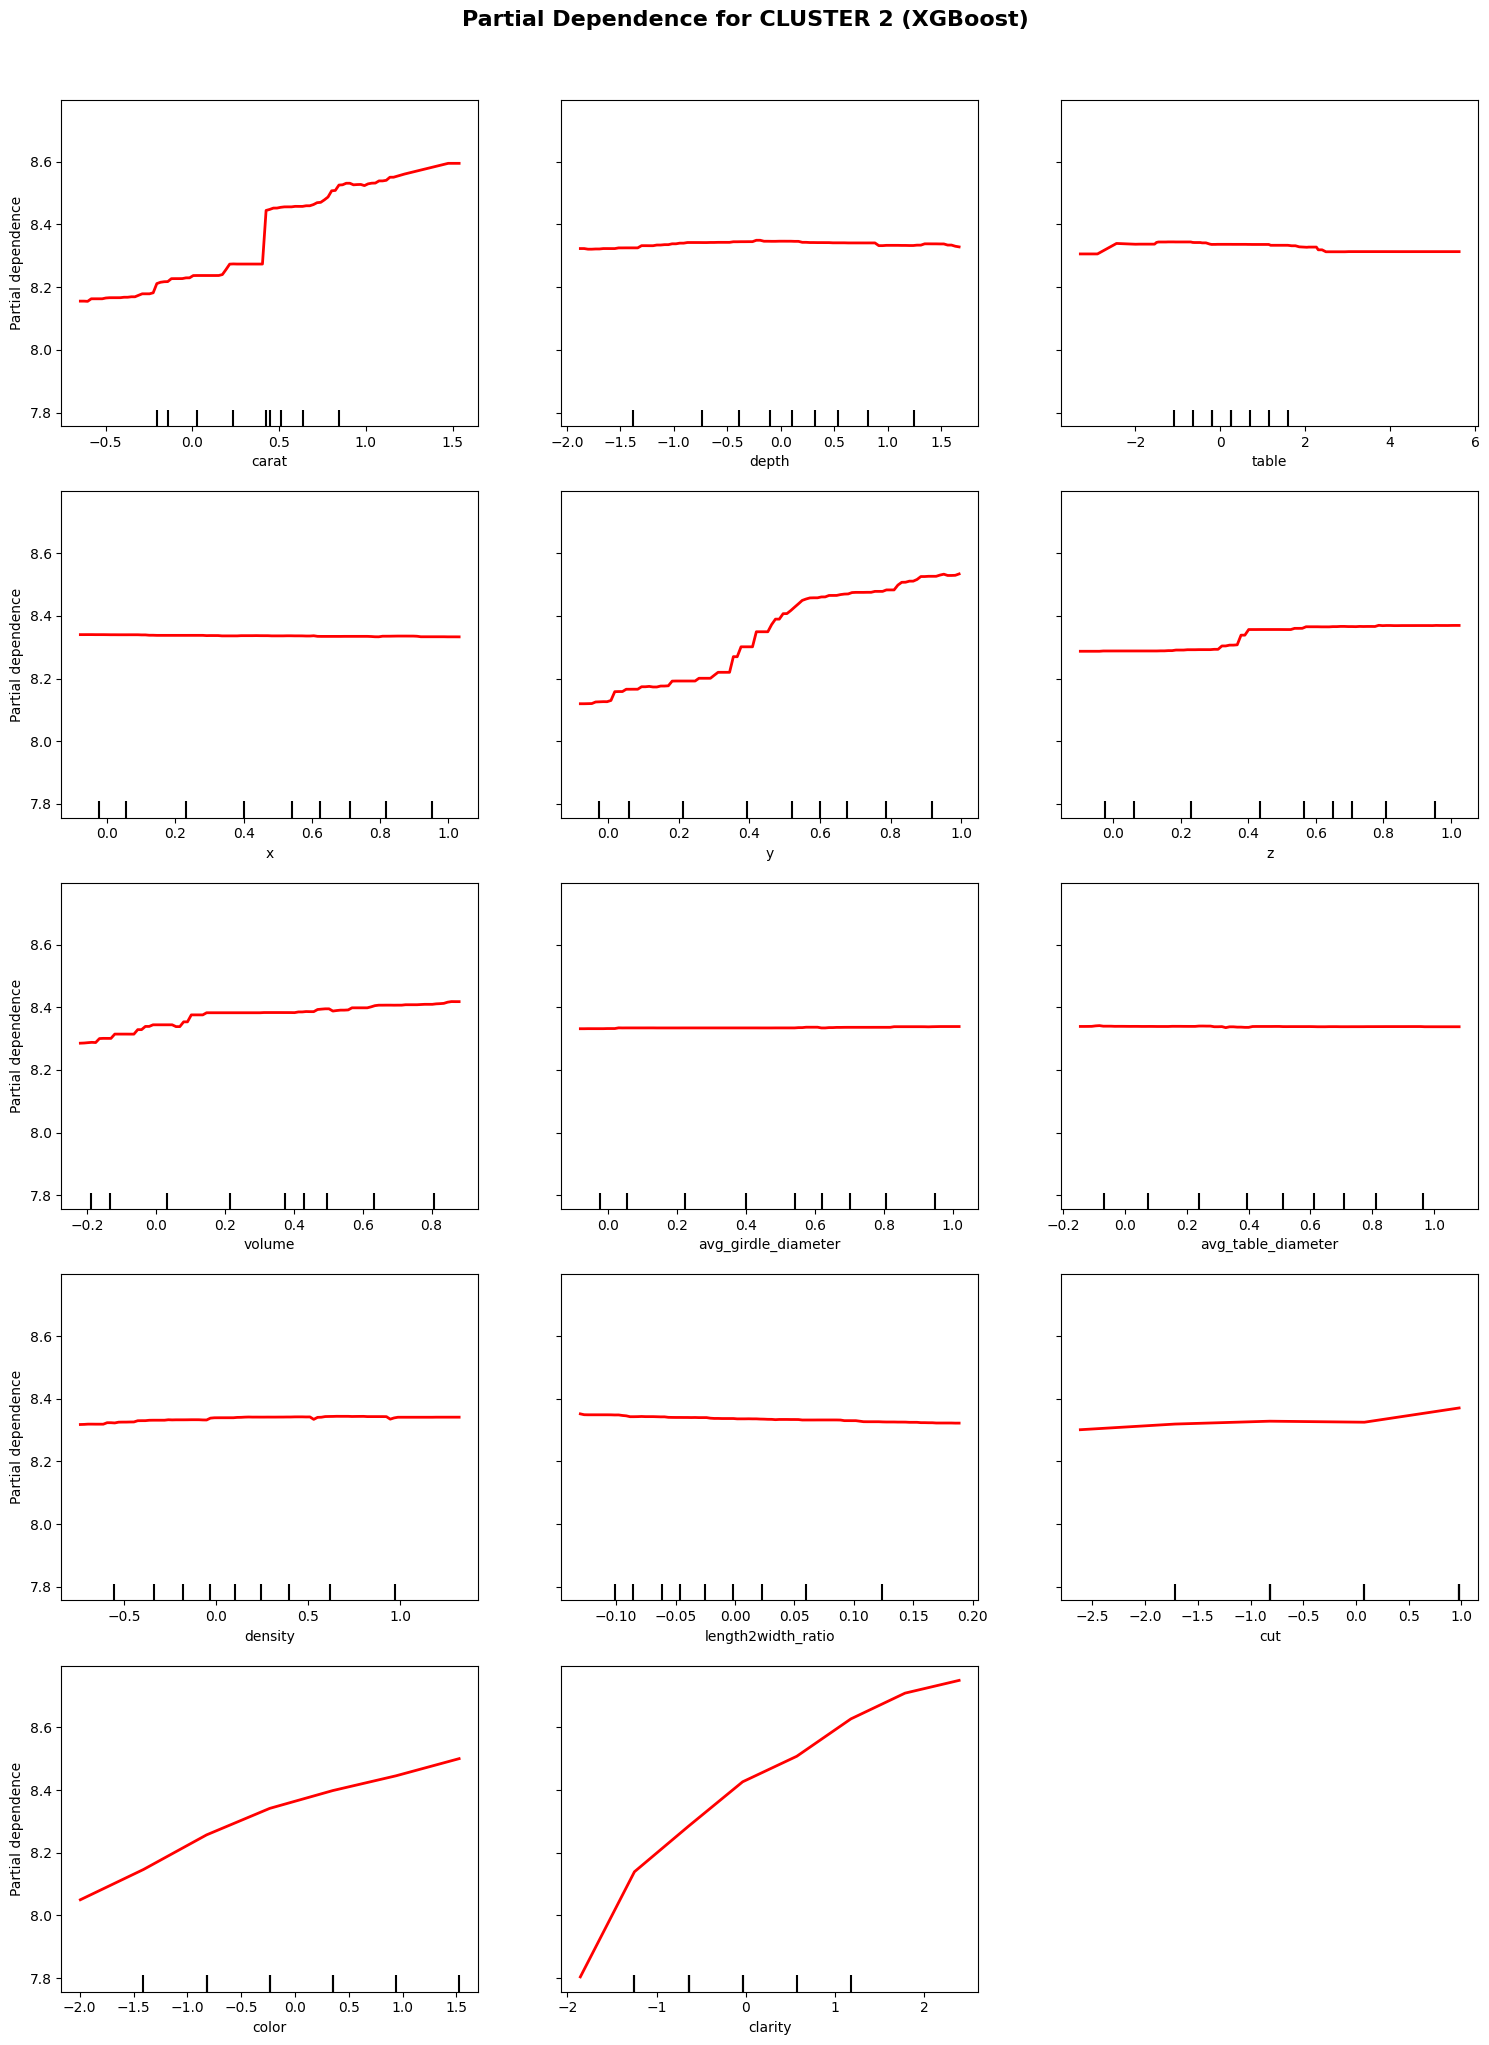

In [110]:
import matplotlib.pyplot as plt
import math
import pandas as pd
from sklearn.inspection import PartialDependenceDisplay
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression

# --- Configuration ---
xgb_params = {'n_estimators': 100, 'learning_rate': 0.1, 'max_depth': 5}

# --- Loop Through Clusters ---
for cluster_id in [0, 1, 2]:
    
    # 1. Prepare Data
    X_train_c = X_train[X_train['cluster'] == cluster_id].drop(columns=['cluster'])
    y_train_c = y_train[X_train['cluster'] == cluster_id]
    
    features_to_plot = X_train_c.columns.tolist()
    
    # 2. SELECT MODEL BASED ON CLUSTER
    if cluster_id == 1:
        print(f"Generating PDP for Cluster {cluster_id} (Linear Regression)...")
        model = LinearRegression()
        model_name = "Linear Regression"
        line_color = "blue"  # Distinct color for Linear model
    else:
        print(f"Generating PDP for Cluster {cluster_id} (XGBoost)...")
        model = XGBRegressor(**xgb_params, random_state=42)
        model_name = "XGBoost"
        line_color = "red"   # Distinct color for XGBoost

    # Train the selected model
    model.fit(X_train_c, y_train_c)
    
    # 3. Generate Plot
    # Calculate grid size
    n_cols = 3
    n_features = len(features_to_plot)
    n_rows = math.ceil(n_features / n_cols)
    
    # Create the display
    # PartialDependenceDisplay works with ANY sklearn-compatible estimator (including LinearReg)
    display = PartialDependenceDisplay.from_estimator(
        estimator=model,
        X=X_train_c,
        features=features_to_plot,
        kind="average", 
        n_cols=n_cols,
        line_kw={"color": line_color, "linewidth": 2}
    )
    
    # Customize Figure
    fig = display.figure_
    fig.set_size_inches(15, 4 * n_rows)
    fig.suptitle(f'Partial Dependence for CLUSTER {cluster_id} ({model_name})', fontsize=16, weight='bold', y=1.02)
    
    plt.tight_layout()
    plt.show()

Generating PDP for Cluster 0 (XGBoost)...


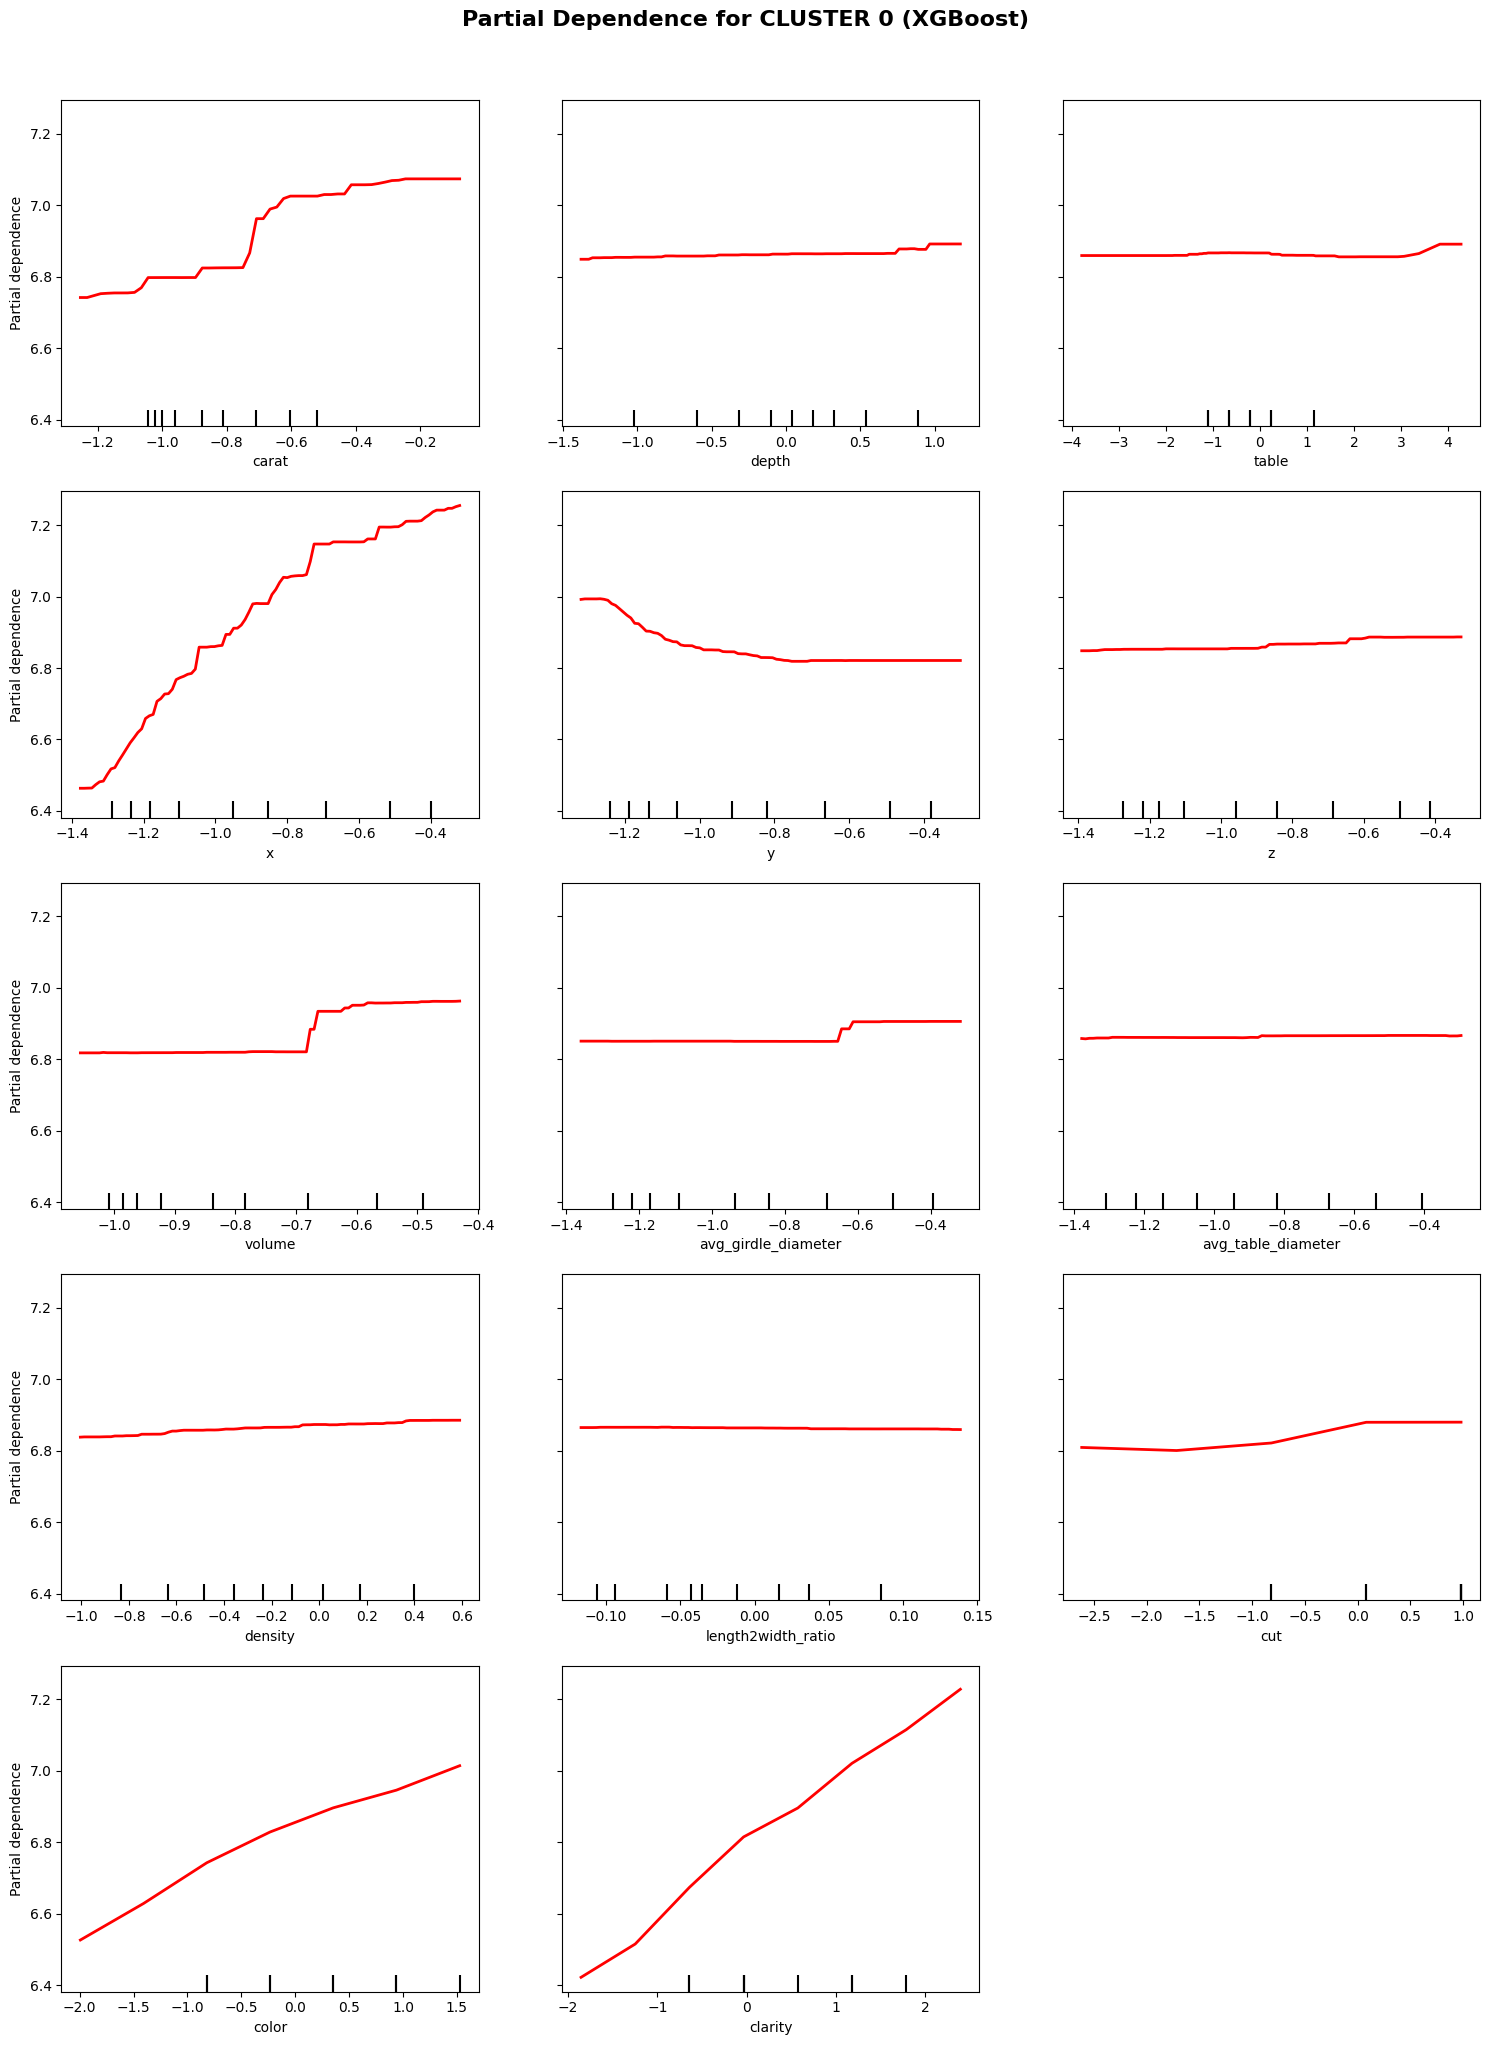

Generating PDP for Cluster 1 (XGBoost)...


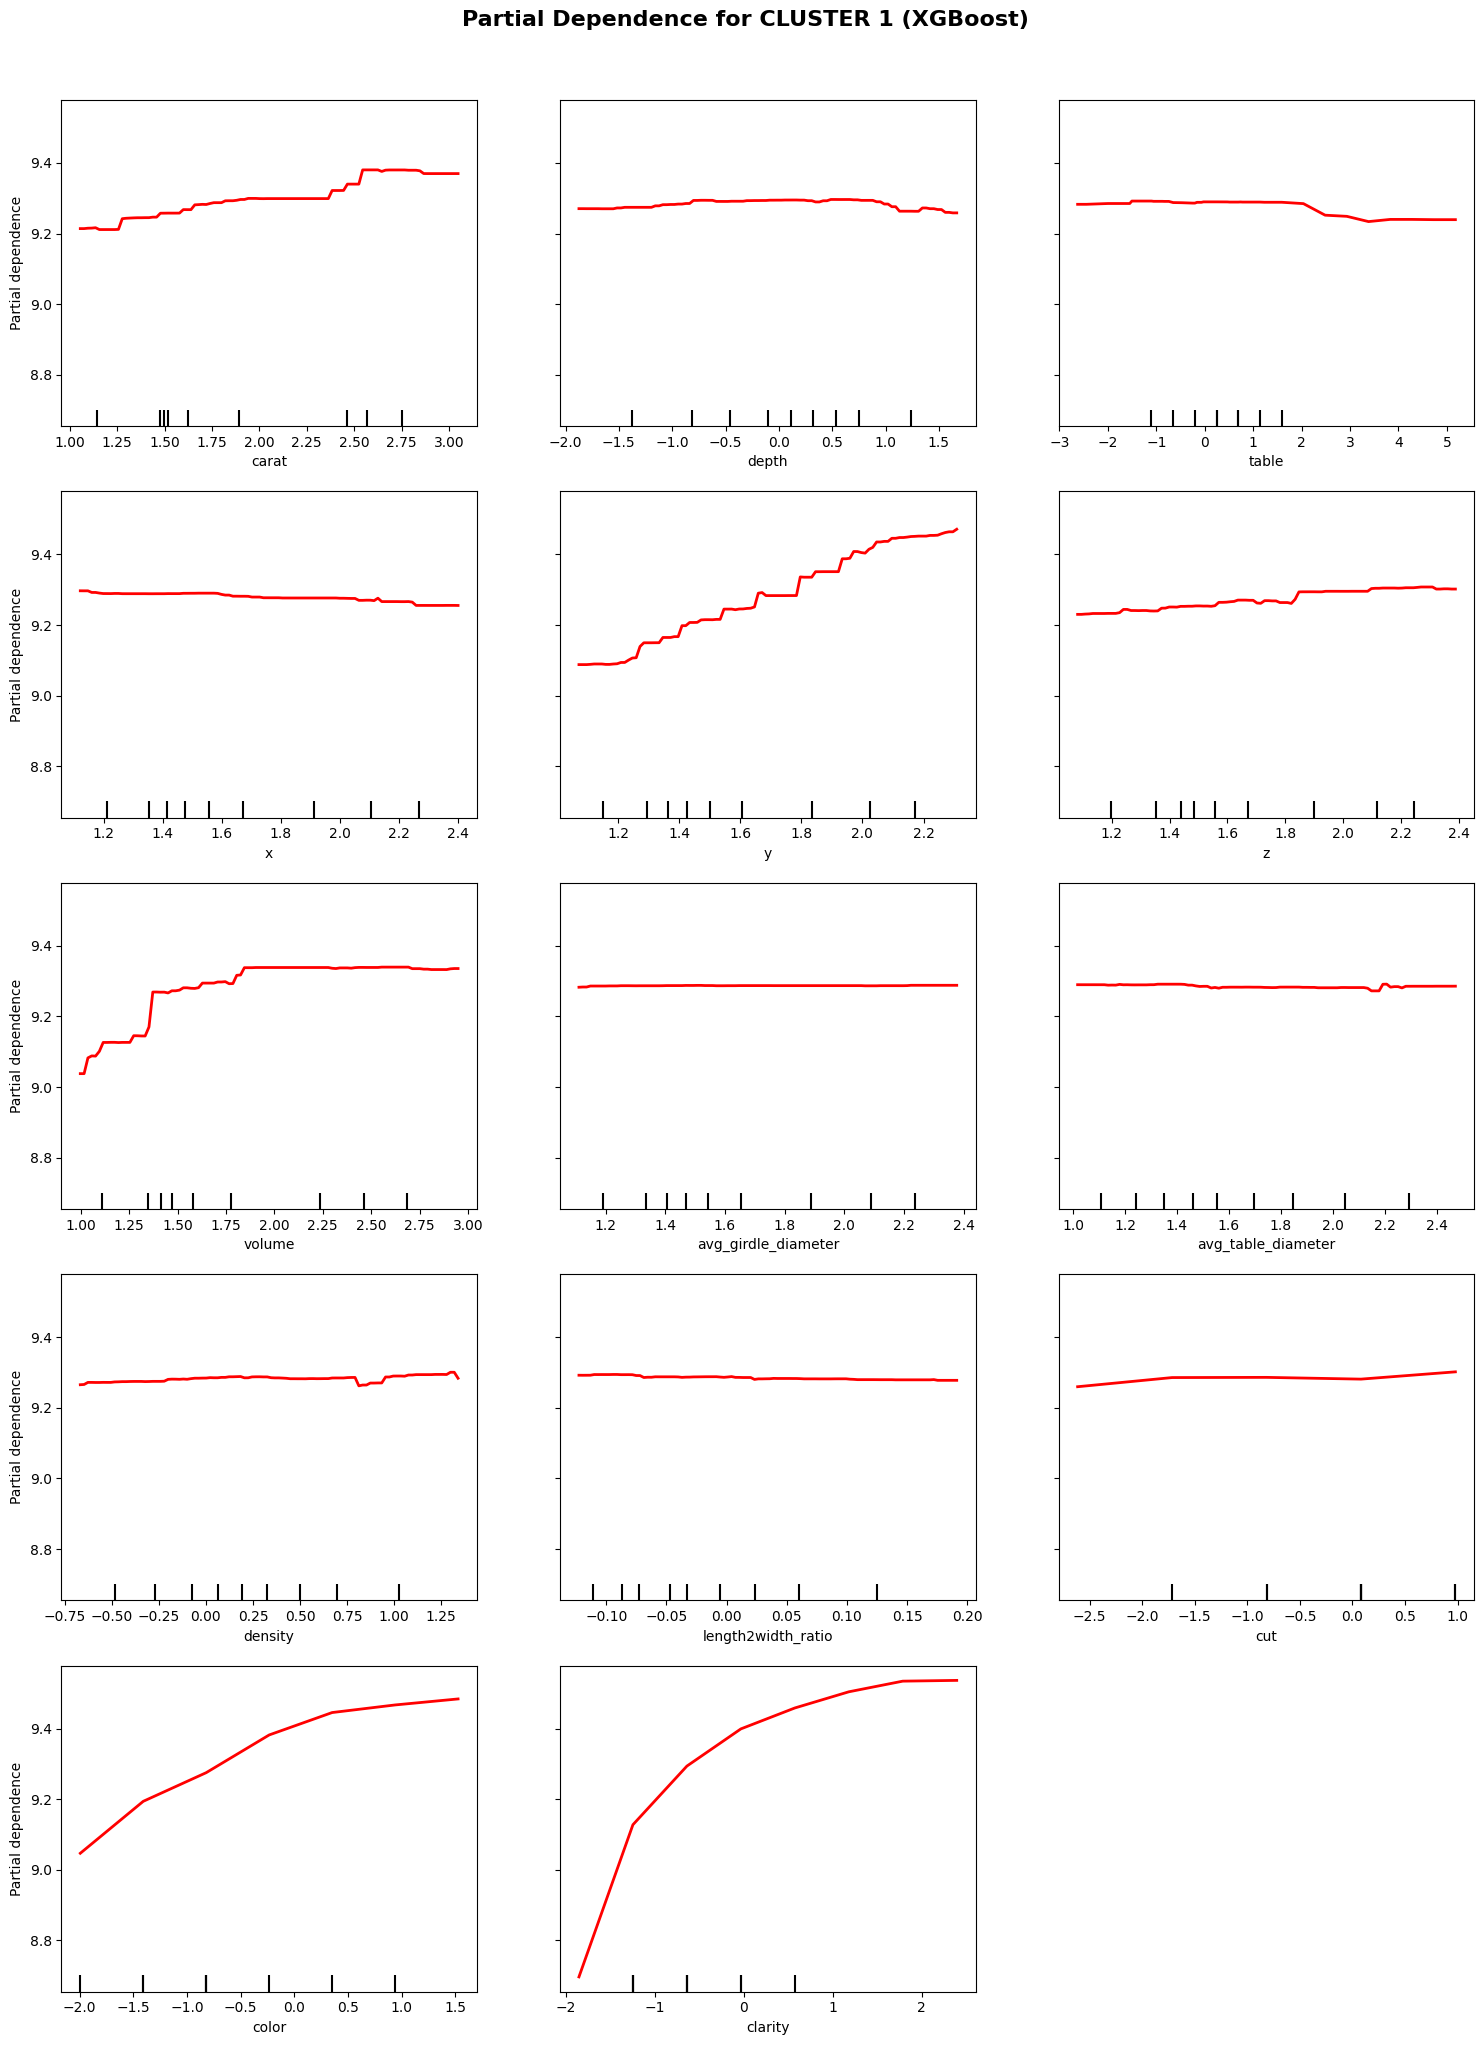

Generating PDP for Cluster 2 (XGBoost)...


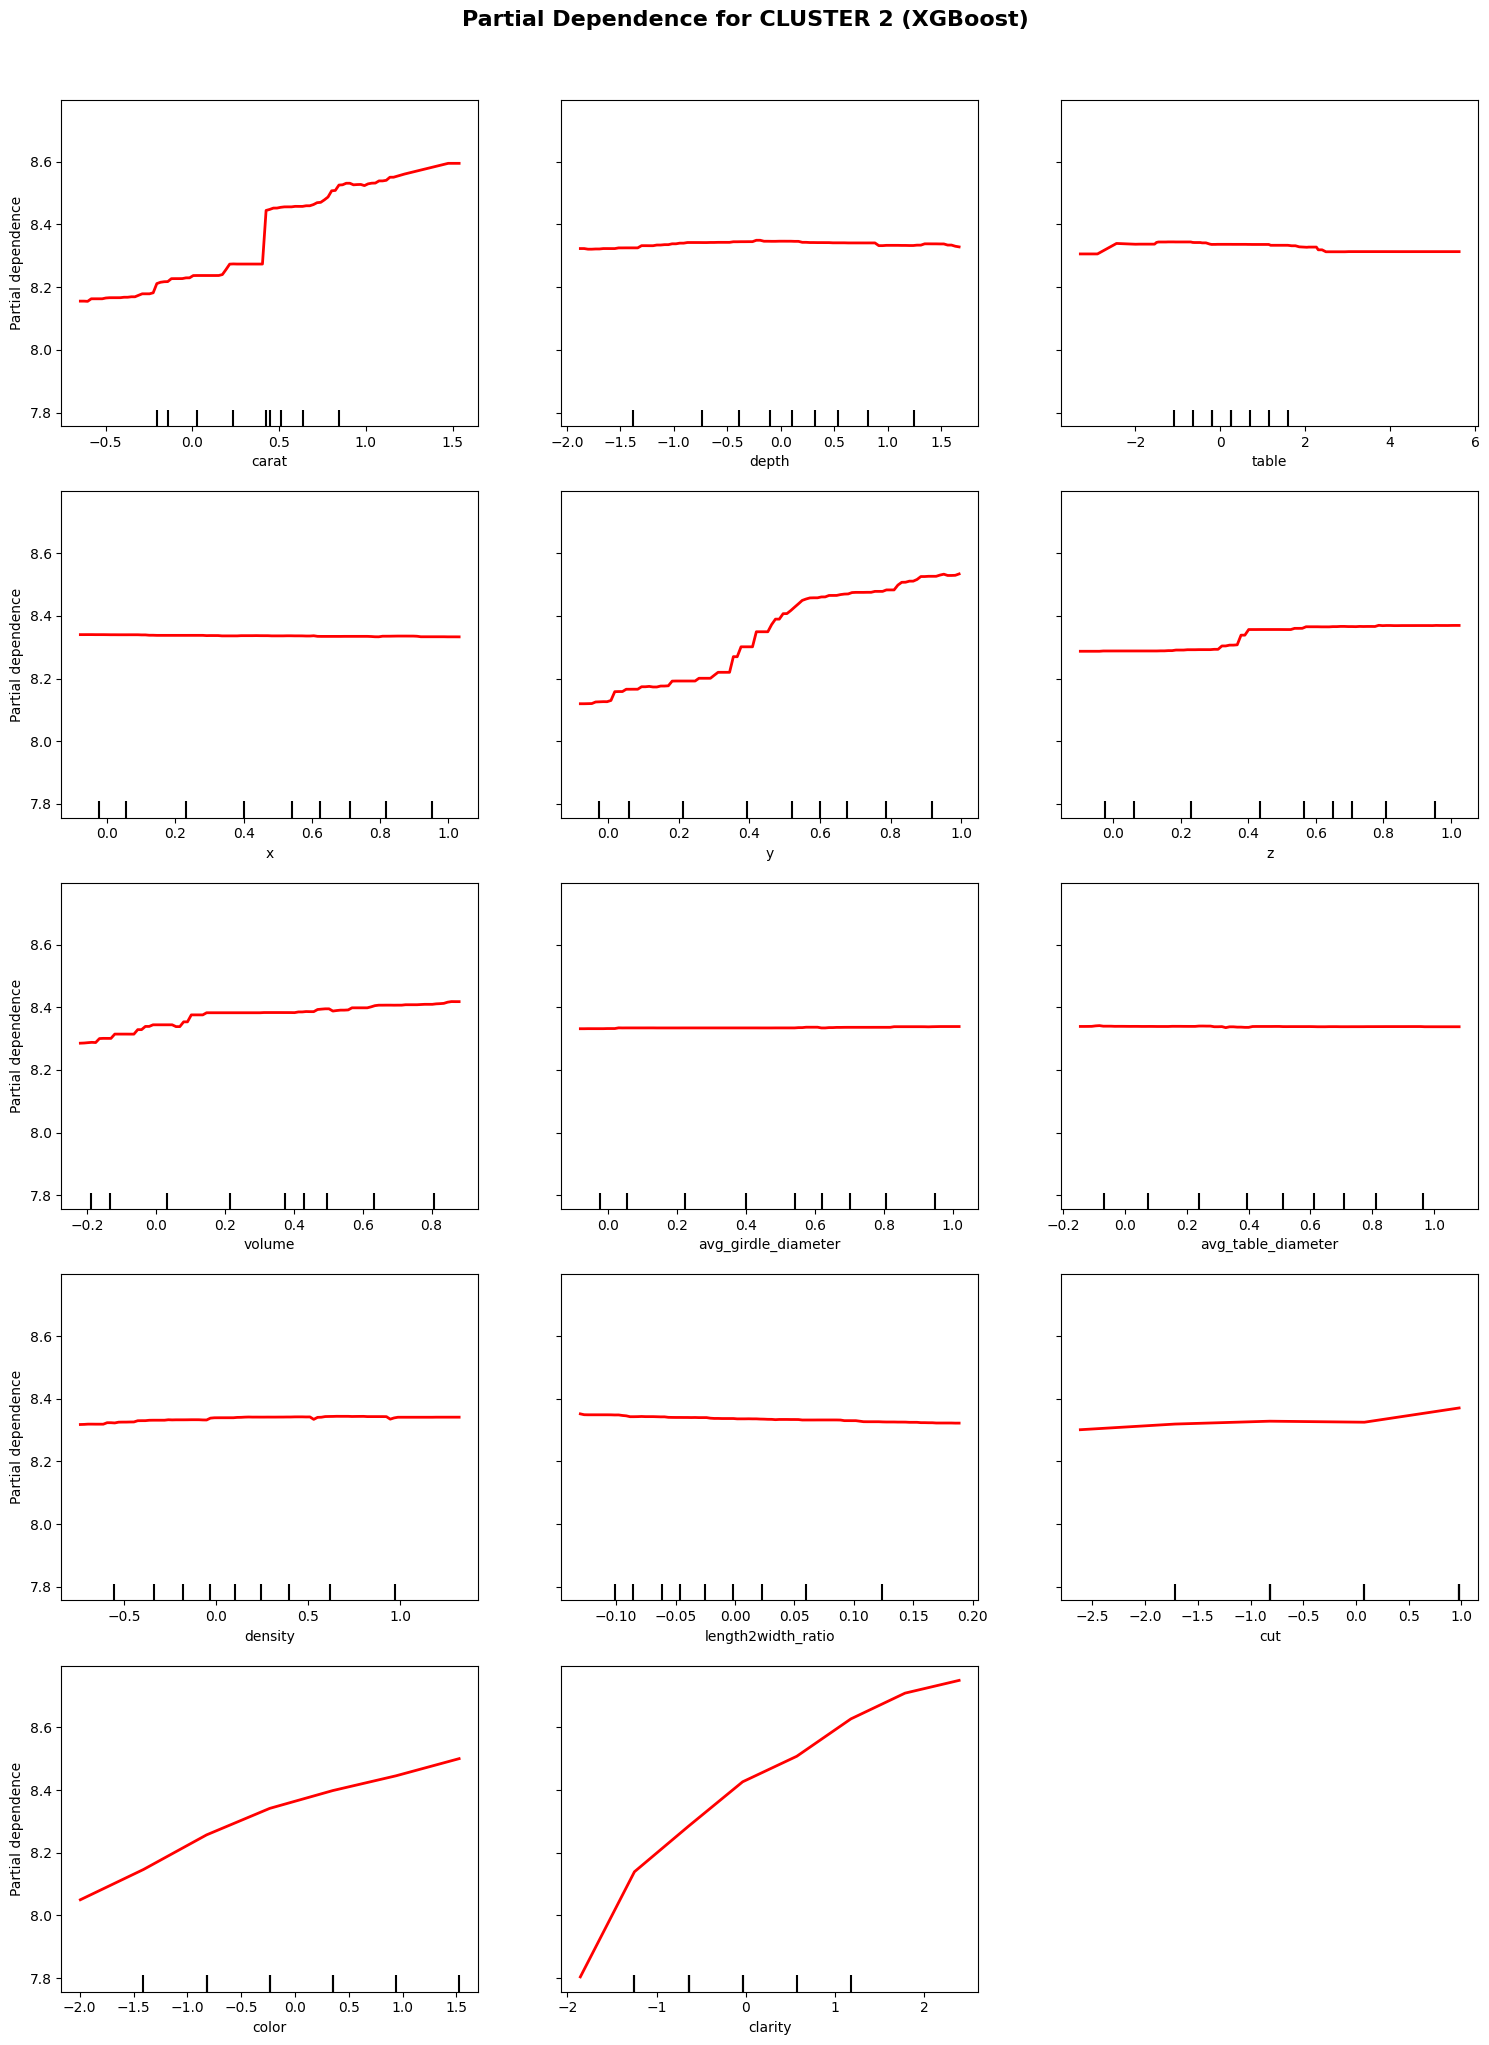

In [111]:
import matplotlib.pyplot as plt
import math
import pandas as pd
from sklearn.inspection import PartialDependenceDisplay
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

# --- Configuration ---
xgb_params = {'n_estimators': 100, 'learning_rate': 0.1, 'max_depth': 5}

rf_params = {
    'n_estimators': 200,
    'max_depth': None,
    'random_state': 42,
    'n_jobs': -1
}

# --- Loop Through Clusters ---
for cluster_id in [0, 1, 2]:
    
    # 1. Prepare Data
    X_train_c = X_train[X_train['cluster'] == cluster_id].drop(columns=['cluster'])
    y_train_c = y_train[X_train['cluster'] == cluster_id]
    
    features_to_plot = X_train_c.columns.tolist()
    
    # 2. SELECT MODEL BASED ON CLUSTER
    if cluster_id == 3:
        print(f"Generating PDP for Cluster {cluster_id} (Random Forest)...")
        model = RandomForestRegressor(**rf_params)
        model_name = "Random Forest"
        line_color = "blue"
    else:
        print(f"Generating PDP for Cluster {cluster_id} (XGBoost)...")
        model = XGBRegressor(**xgb_params, random_state=42)
        model_name = "XGBoost"
        line_color = "red"

    # Train the selected model
    model.fit(X_train_c, y_train_c)
    
    # 3. Generate Plot
    n_cols = 3
    n_features = len(features_to_plot)
    n_rows = math.ceil(n_features / n_cols)
    
    display = PartialDependenceDisplay.from_estimator(
        estimator=model,
        X=X_train_c,
        features=features_to_plot,
        kind="average",
        n_cols=n_cols,
        line_kw={"color": line_color, "linewidth": 2}
    )
    
    # Customize Figure
    fig = display.figure_
    fig.set_size_inches(15, 4 * n_rows)
    fig.suptitle(
        f'Partial Dependence for CLUSTER {cluster_id} ({model_name})',
        fontsize=16,
        weight='bold',
        y=1.02
    )
    
    plt.tight_layout()
    plt.show()


In [112]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.cross_decomposition import PLSRegression
from sklearn.ensemble import RandomForestRegressor
# If XGBoost is installed, keep this; otherwise comment it
from xgboost import XGBRegressor

# -------------------------------
# Define models
# -------------------------------
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.01),
    "Elastic Net": ElasticNet(alpha=0.01, l1_ratio=0.5),
    "PLS Regression": PLSRegression(n_components=2),
    "Random Forest": RandomForestRegressor(
        n_estimators=200, random_state=42, n_jobs=-1
    ),
    "XGBoost": XGBRegressor(
        n_estimators=100, learning_rate=0.1, max_depth=5,
        random_state=42, n_jobs=1
    )
}

# -------------------------------
# Storage for results
# -------------------------------
results = []

# -------------------------------
# Loop over clusters and models
# -------------------------------
for cluster_id in [0, 1, 2]:

    # Prepare cluster-wise data
    X_train_c = X_train[X_train["cluster"] == cluster_id].drop(columns=["cluster"])
    y_train_c = y_train[X_train["cluster"] == cluster_id]

    X_test_c = X_test[X_test["cluster"] == cluster_id].drop(columns=["cluster"])
    y_test_c = y_test[X_test["cluster"] == cluster_id]

    for model_name, model in models.items():

        # Fit model
        model.fit(X_train_c, y_train_c)

        # Predictions
        y_train_pred = model.predict(X_train_c)
        y_test_pred = model.predict(X_test_c)

        # Metrics
        r2_train = r2_score(y_train_c, y_train_pred)
        rmse_train = np.sqrt(mean_squared_error(y_train_c, y_train_pred))

        r2_test = r2_score(y_test_c, y_test_pred)
        rmse_test = np.sqrt(mean_squared_error(y_test_c, y_test_pred))

        # Store results
        results.append({
            "Cluster": cluster_id,
            "Model": model_name,
            "Train R²": r2_train,
            "Train RMSE": rmse_train,
            "Test R²": r2_test,
            "Test RMSE": rmse_test
        })

# -------------------------------
# Final results table
# -------------------------------
results_df = pd.DataFrame(results)

# Sort for readability
results_df = results_df.sort_values(
    by=["Cluster", "Test R²"], ascending=[True, False]
)

results_df


Cluster              Model  Train R²  Train RMSE   Test R²  Test RMSE
6         0            XGBoost  0.975644    0.073691  0.965442   0.089681
5         0      Random Forest  0.995165    0.032831  0.963527   0.092132
0         0  Linear Regression  0.934928    0.120450  0.936525   0.121543
1         0   Ridge Regression  0.934498    0.120848  0.935869   0.122169
3         0        Elastic Net  0.920566    0.133081  0.922033   0.134705
2         0   Lasso Regression  0.919214    0.134208  0.919276   0.137065
4         0     PLS Regression  0.908188    0.143074  0.910672   0.144185
13        1            XGBoost  0.959926    0.074299  0.906776   0.108814
12        1      Random Forest  0.987229    0.041944  0.893650   0.116223
7         1  Linear Regression  0.829987    0.153035  0.815595   0.153041
8         1   Ridge Regression  0.827272    0.154252  0.811369   0.154785
10        1        Elastic Net  0.781221    0.173601  0.763542   0.173300
9         1   Lasso Regression  0.757898    0.182620  0.738622   0.182203
11        1     PLS Regression  0.715615    0.197926  0.691847   0.197836
20        2            XGBoost  0.974631    0.074984  0.966014   0.087506
19        2      Random Forest  0.994277    0.035616  0.959819   0.095148
14        2  Linear Regression  0.930910    0.123745  0.933411   0.122486
15        2   Ridge Regression  0.930034    0.124527  0.932805   0.123042
17        2        Elastic Net  0.917034    0.135603  0.917871   0.136030
16        2   Lasso Regression  0.915832    0.136582  0.915898   0.137654
18        2     PLS Regression  0.909635    0.141520  0.909782   0.142572

In [113]:
import numpy as np
import pandas as pd

from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.cross_decomposition import PLSRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from scipy.stats import randint, uniform

# ---------------------------------
# Models WITHOUT tuning
# ---------------------------------
base_models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.01),
    "Elastic Net": ElasticNet(alpha=0.01, l1_ratio=0.5),
    "PLS Regression": PLSRegression(n_components=2)
}

# ---------------------------------
# Hyperparameter search spaces
# ---------------------------------
rf_param_dist = {
    "n_estimators": randint(100, 400),
    "max_depth": randint(3, 20),
    "min_samples_split": randint(2, 10),
    "min_samples_leaf": randint(1, 5)
}

xgb_param_dist = {
    "n_estimators": randint(50, 300),
    "max_depth": randint(3, 10),
    "learning_rate": uniform(0.01, 0.2),
    "subsample": uniform(0.6, 0.4),
    "colsample_bytree": uniform(0.6, 0.4)
}

# ---------------------------------
# Storage
# ---------------------------------
results = []

# ---------------------------------
# Loop over clusters
# ---------------------------------
for cluster_id in [0, 1, 2]:

    print(f"\n===== CLUSTER {cluster_id} =====")

    X_train_c = X_train[X_train["cluster"] == cluster_id].drop(columns=["cluster"])
    y_train_c = y_train[X_train["cluster"] == cluster_id]

    X_test_c = X_test[X_test["cluster"] == cluster_id].drop(columns=["cluster"])
    y_test_c = y_test[X_test["cluster"] == cluster_id]

    # -------- Base models (no tuning) --------
    for name, model in base_models.items():

        model.fit(X_train_c, y_train_c)

        y_tr = model.predict(X_train_c)
        y_te = model.predict(X_test_c)

        results.append({
            "Cluster": cluster_id,
            "Model": name,
            "Train R²": r2_score(y_train_c, y_tr),
            "Train RMSE": np.sqrt(mean_squared_error(y_train_c, y_tr)),
            "Test R²": r2_score(y_test_c, y_te),
            "Test RMSE": np.sqrt(mean_squared_error(y_test_c, y_te))
        })

    # -------- Random Forest (TUNED) --------
    rf = RandomForestRegressor(random_state=42, n_jobs=-1)

    rf_search = RandomizedSearchCV(
        rf,
        rf_param_dist,
        n_iter=30,
        cv=5,
        scoring="r2",
        random_state=42,
        n_jobs=-1
    )

    rf_search.fit(X_train_c, y_train_c)
    best_rf = rf_search.best_estimator_

    y_tr = best_rf.predict(X_train_c)
    y_te = best_rf.predict(X_test_c)

    results.append({
        "Cluster": cluster_id,
        "Model": "Random Forest (Tuned)",
        "Train R²": r2_score(y_train_c, y_tr),
        "Train RMSE": np.sqrt(mean_squared_error(y_train_c, y_tr)),
        "Test R²": r2_score(y_test_c, y_te),
        "Test RMSE": np.sqrt(mean_squared_error(y_test_c, y_te))
    })

    # -------- XGBoost (TUNED) --------
    xgb = XGBRegressor(
        objective="reg:squarederror",
        random_state=42,
        n_jobs=1
    )

    xgb_search = RandomizedSearchCV(
        xgb,
        xgb_param_dist,
        n_iter=30,
        cv=5,
        scoring="r2",
        random_state=42,
        n_jobs=-1
    )

    xgb_search.fit(X_train_c, y_train_c)
    best_xgb = xgb_search.best_estimator_

    y_tr = best_xgb.predict(X_train_c)
    y_te = best_xgb.predict(X_test_c)

    results.append({
        "Cluster": cluster_id,
        "Model": "XGBoost (Tuned)",
        "Train R²": r2_score(y_train_c, y_tr),
        "Train RMSE": np.sqrt(mean_squared_error(y_train_c, y_tr)),
        "Test R²": r2_score(y_test_c, y_te),
        "Test RMSE": np.sqrt(mean_squared_error(y_test_c, y_te))
    })

# ---------------------------------
# Final results table
# ---------------------------------
results_df = pd.DataFrame(results)

results_df = results_df.sort_values(
    by=["Cluster", "Test R²"], ascending=[True, False]
).reset_index(drop=True)

results_df



===== CLUSTER 0 =====

===== CLUSTER 1 =====

===== CLUSTER 2 =====


Cluster                  Model  Train R²  Train RMSE   Test R²  Test RMSE
0         0        XGBoost (Tuned)  0.986140    0.055590  0.969402   0.084387
1         0  Random Forest (Tuned)  0.991476    0.043594  0.963444   0.092238
2         0      Linear Regression  0.934928    0.120450  0.936525   0.121543
3         0       Ridge Regression  0.934498    0.120848  0.935869   0.122169
4         0            Elastic Net  0.920566    0.133081  0.922033   0.134705
5         0       Lasso Regression  0.919214    0.134208  0.919276   0.137065
6         0         PLS Regression  0.908188    0.143074  0.910672   0.144185
7         1        XGBoost (Tuned)  0.961876    0.072468  0.905289   0.109679
8         1  Random Forest (Tuned)  0.977970    0.055088  0.894776   0.115606
9         1      Linear Regression  0.829987    0.153035  0.815595   0.153041
10        1       Ridge Regression  0.827272    0.154252  0.811369   0.154785
11        1            Elastic Net  0.781221    0.173601  0.763542   0.173300
12        1       Lasso Regression  0.757898    0.182620  0.738622   0.182203
13        1         PLS Regression  0.715615    0.197926  0.691847   0.197836
14        2        XGBoost (Tuned)  0.975100    0.074288  0.966085   0.087414
15        2  Random Forest (Tuned)  0.988514    0.050455  0.959797   0.095173
16        2      Linear Regression  0.930910    0.123745  0.933411   0.122486
17        2       Ridge Regression  0.930034    0.124527  0.932805   0.123042
18        2            Elastic Net  0.917034    0.135603  0.917871   0.136030
19        2       Lasso Regression  0.915832    0.136582  0.915898   0.137654
20        2         PLS Regression  0.909635    0.141520  0.909782   0.142572

In [114]:
# Add cluster info to target variables
train_df = X_train.copy()
train_df["price"] = y_train

test_df = X_test.copy()
test_df["price"] = y_test

# Combine train and test for overall summary
full_df = pd.concat([train_df, test_df], axis=0)

# Cluster-wise mean price
cluster_price_summary = full_df.groupby("cluster")["price"].agg(["mean", "std", "count"]).reset_index()
cluster_price_summary.rename(columns={"mean":"Mean Price", "std":"Price Std", "count":"Count"}, inplace=True)

cluster_price_summary


cluster  Mean Price  Price Std  Count
0        0    6.863085   0.474265  12195
1        1    9.287119   0.368394   3616
2        2    8.335025   0.471632  10417

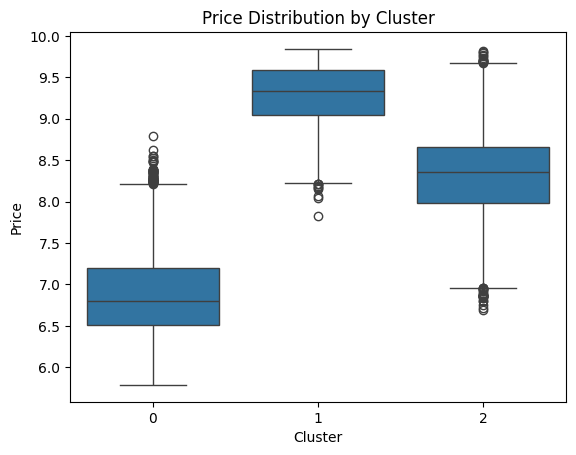

In [115]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=full_df, x="cluster", y="price")
plt.title("Price Distribution by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Price")
plt.show()


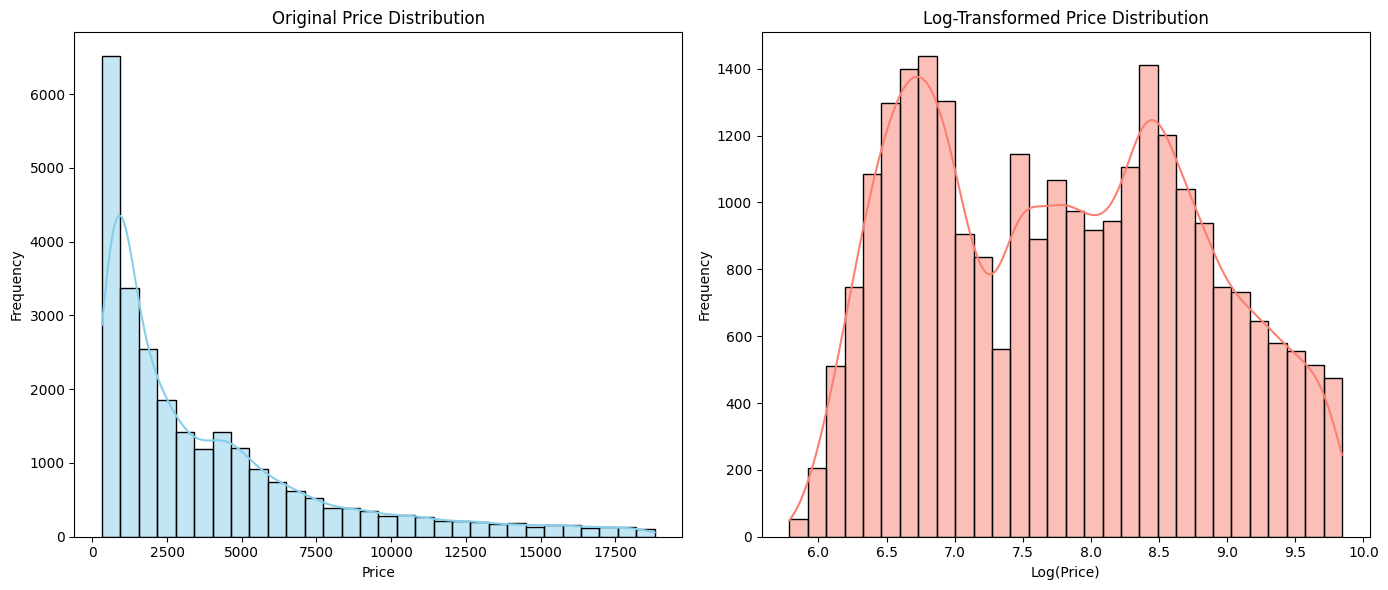

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------------
# Plotting price distributions
# -------------------------------

plt.figure(figsize=(14, 6))

# Original distribution (before log)
plt.subplot(1, 2, 1)
sns.histplot(np.exp(lr_df['price']), kde=True, bins=30, color='skyblue')  # exp to get back original
plt.title("Original Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")

# Log-transformed distribution (after log)
plt.subplot(1, 2, 2)
sns.histplot(lr_df['price'], kde=True, bins=30, color='salmon')
plt.title("Log-Transformed Price Distribution")
plt.xlabel("Log(Price)")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


In [117]:
from scipy.stats import skew, kurtosis
import numpy as np

# Original price (before log)
original_price = np.exp(lr_df['price'])  # reverse log if column is already log-transformed

# Log-transformed price (current column)
log_price = lr_df['price']

# Compute skewness and kurtosis
original_skew = skew(original_price)
original_kurt = kurtosis(original_price)

log_skew = skew(log_price)
log_kurt = kurtosis(log_price)

print("Original Price Distribution:")
print(f"Skewness: {original_skew:.4f}, Kurtosis: {original_kurt:.4f}\n")

print("Log-Transformed Price Distribution:")
print(f"Skewness: {log_skew:.4f}, Kurtosis: {log_kurt:.4f}")


Original Price Distribution:
Skewness: 1.6205, Kurtosis: 2.1614

Log-Transformed Price Distribution:
Skewness: 0.1279, Kurtosis: -1.1001


In [118]:
import pandas as pd
import numpy as np

# Build train dataframe
train_df = X_train.copy()
train_df['log_price'] = y_train.values

# Build test dataframe
test_df = X_test.copy()
test_df['log_price'] = y_test.values

# Combine
final_df = pd.concat([train_df, test_df], axis=0).reset_index(drop=True)

# Recover original price (optional but recommended for interpretation)
final_df['price'] = np.exp(final_df['log_price'])


In [119]:
cluster_price_summary = final_df.groupby('cluster').agg(
    Mean_Log_Price=('log_price', 'mean'),
    Std_Log_Price=('log_price', 'std'),
    Mean_Price=('price', 'mean'),
    Std_Price=('price', 'std'),
    Count=('price', 'count')
).reset_index()

cluster_price_summary


cluster  Mean_Log_Price  Std_Log_Price    Mean_Price    Std_Price  Count
0        0        6.863085       0.474265   1077.116769   580.494747  12195
1        1        9.287119       0.368394  11499.387998  3846.244594   3616
2        2        8.335025       0.471632   4653.920515  2276.420542  10417

In [120]:
from scipy.stats import f_oneway

clusters = final_df['cluster'].unique()

grouped_log_prices = [
    final_df[final_df['cluster'] == c]['log_price']
    for c in clusters
]

anova_stat, p_value = f_oneway(*grouped_log_prices)

print(f"ANOVA F-statistic: {anova_stat:.4f}")
print(f"p-value: {p_value:.6f}")


ANOVA F-statistic: 51207.2626
p-value: 0.000000


Re-fitting KMeans with k=3...

Cluster Counts (Should show 3 clusters):
cluster
0    12195
1     3616
2    10417
Name: count, dtype: int64

 ANALYSIS FOR: CUT

Highest Frequency 'cut' in each cluster:
   Cluster Most Frequent cut
0        0             Ideal
1        1           Premium
2        2             Ideal


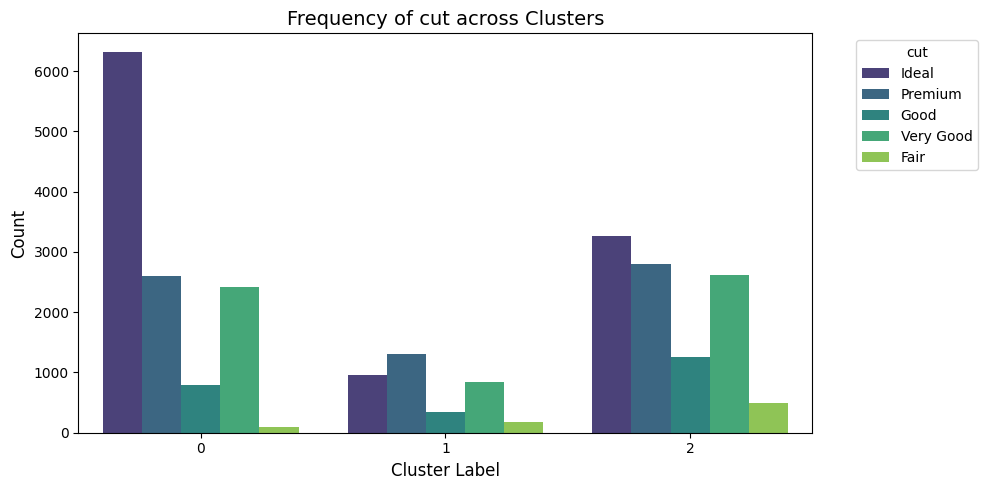


 ANALYSIS FOR: COLOR

Highest Frequency 'color' in each cluster:
   Cluster Most Frequent color
0        0                   E
1        1                   I
2        2                   G


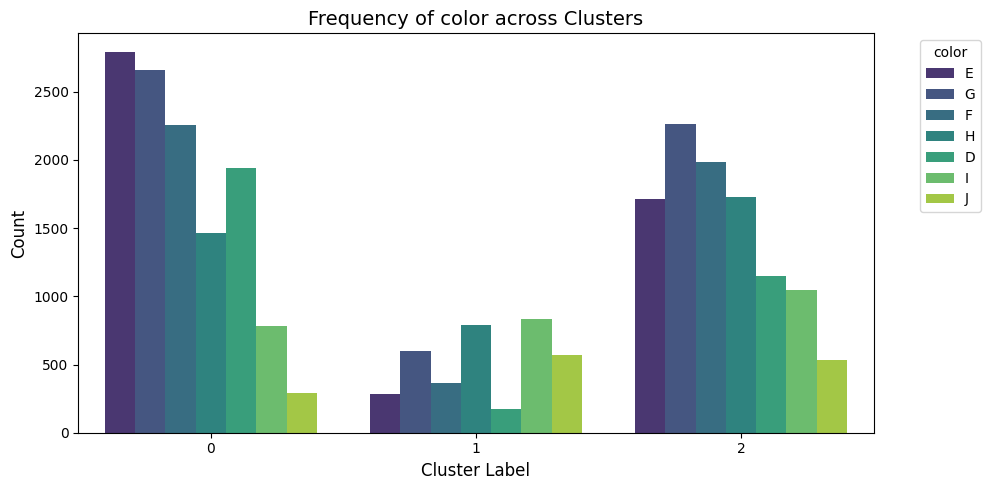


 ANALYSIS FOR: CLARITY

Highest Frequency 'clarity' in each cluster:
   Cluster Most Frequent clarity
0        0                   VS2
1        1                   SI2
2        2                   SI1


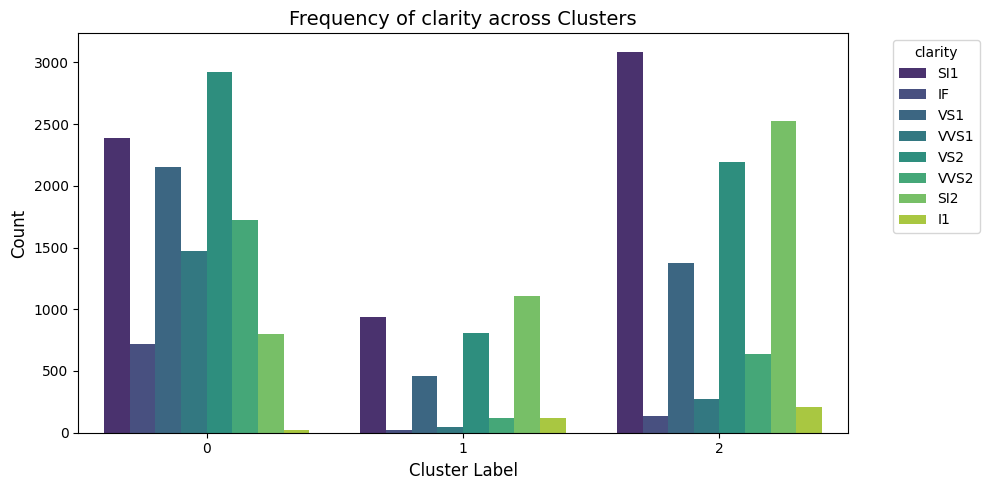

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# ---------------------------------------------------------
# 1. Reset Data & Re-Train Model (To ensure clean state)
# ---------------------------------------------------------
# Ensure we don't have accidental 'cluster' columns in our features
if 'cluster' in X_processed_df.columns:
    X_processed_df = X_processed_df.drop(columns=['cluster'])
if 'cluster' in X_train.columns:
    X_train = X_train.drop(columns=['cluster'])

# Re-initialize and Fit KMeans with 3 clusters
print("Re-fitting KMeans with k=3...")
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(X_train) 

# ---------------------------------------------------------
# 2. Map Clusters to Original Data
# ---------------------------------------------------------
# Predict clusters for the FULL dataset
all_labels = kmeans.predict(X_processed_df)

# Create a clean analysis dataframe from the original text data
df_analysis = lr_df.copy()
df_analysis['cluster'] = all_labels

# Check if we have data in all clusters now
print("\nCluster Counts (Should show 3 clusters):")
print(df_analysis['cluster'].value_counts().sort_index())

# ---------------------------------------------------------
# 3. Analyze Categorical Variables
# ---------------------------------------------------------
categorical_cols = ['cut', 'color', 'clarity']

for col in categorical_cols:
    print(f"\n{'='*40}")
    print(f" ANALYSIS FOR: {col.upper()}")
    print(f"{'='*40}")
    
    # --- A. Find Highest Frequency Value (Mode) ---
    try:
        # Group by cluster and get the mode (most common value)
        mode_df = df_analysis.groupby('cluster')[col].agg(lambda x: x.mode()[0] if not x.mode().empty else "No Data").reset_index()
        mode_df.columns = ['Cluster', f'Most Frequent {col}']
        
        print(f"\nHighest Frequency '{col}' in each cluster:")
        print(mode_df)
    except Exception as e:
        print(f"Could not calculate mode for {col}: {e}")
    
    # --- B. Plot Bar Chart ---
    plt.figure(figsize=(10, 5))
    
    # Count Plot
    sns.countplot(data=df_analysis, x='cluster', hue=col, palette='viridis')
    
    plt.title(f'Frequency of {col} across Clusters', fontsize=14)
    plt.xlabel('Cluster Label', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.legend(title=col, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

C:\Users\umasu\AppData\Local\Temp\ipykernel_26844\2273426063.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=col, data=df_analysis, palette='viridis', ax=axes[0])


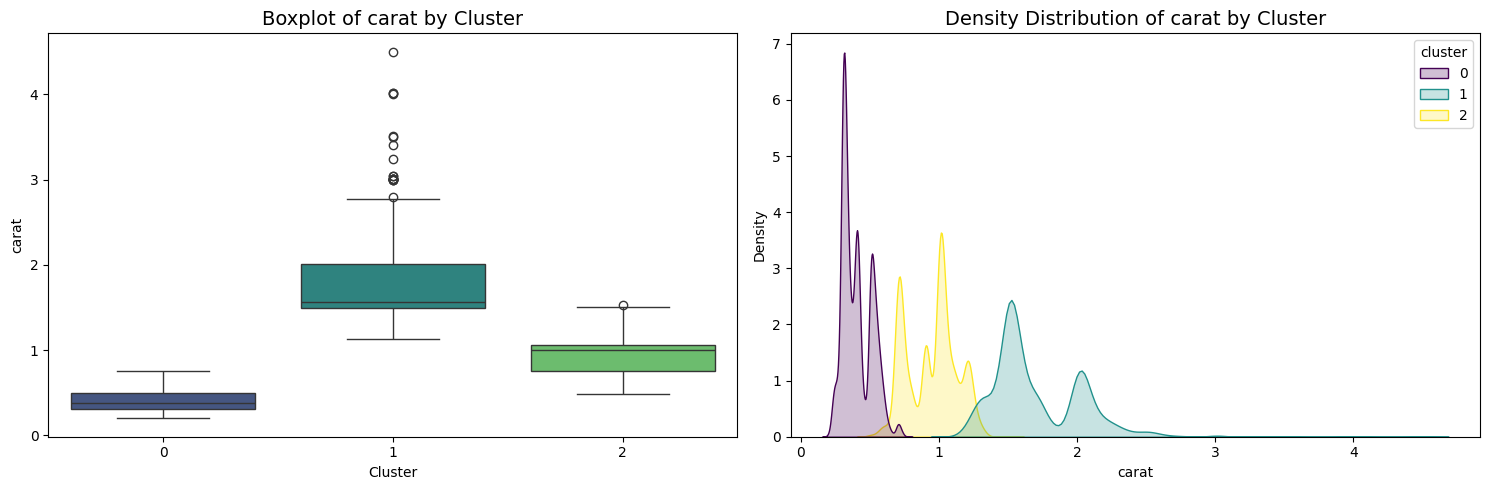

C:\Users\umasu\AppData\Local\Temp\ipykernel_26844\2273426063.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=col, data=df_analysis, palette='viridis', ax=axes[0])


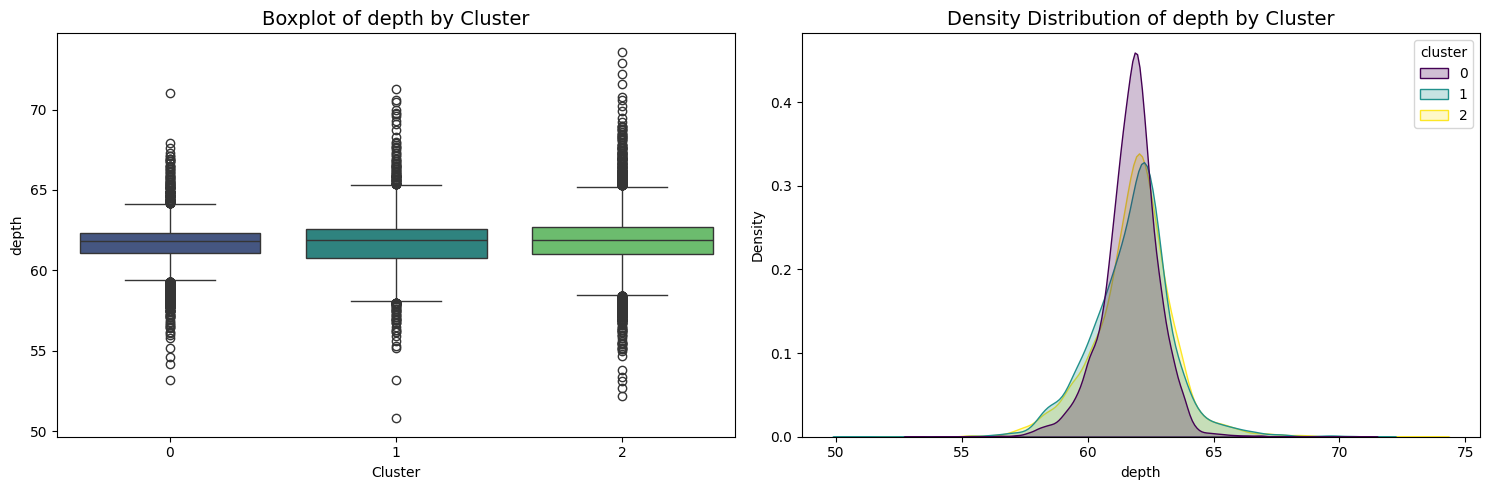

C:\Users\umasu\AppData\Local\Temp\ipykernel_26844\2273426063.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=col, data=df_analysis, palette='viridis', ax=axes[0])


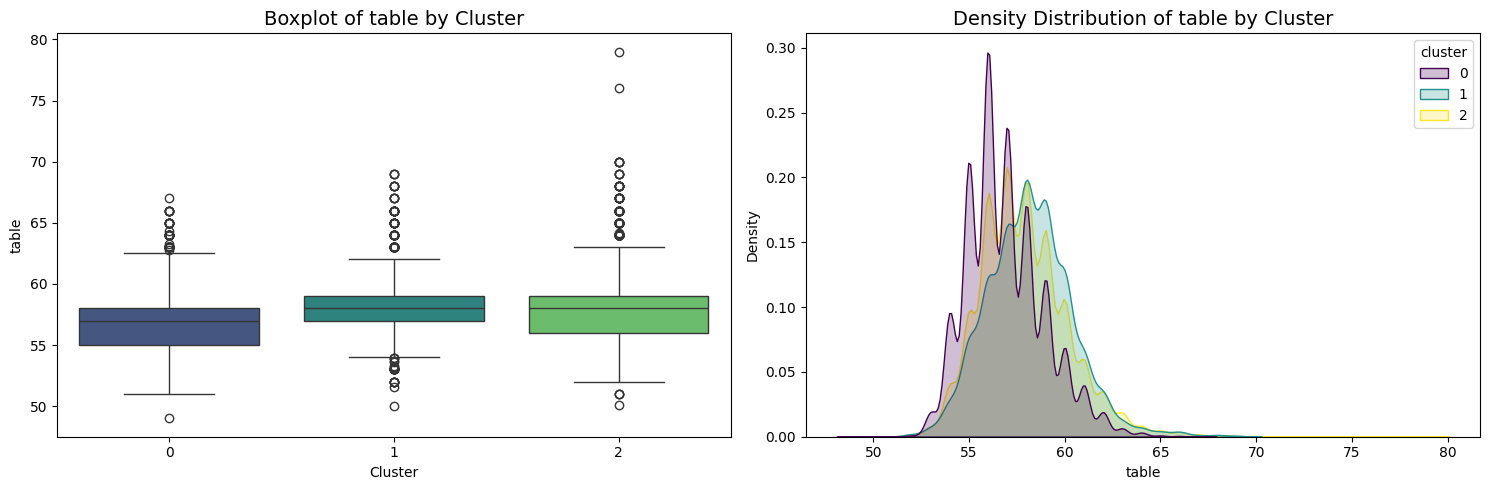

C:\Users\umasu\AppData\Local\Temp\ipykernel_26844\2273426063.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=col, data=df_analysis, palette='viridis', ax=axes[0])


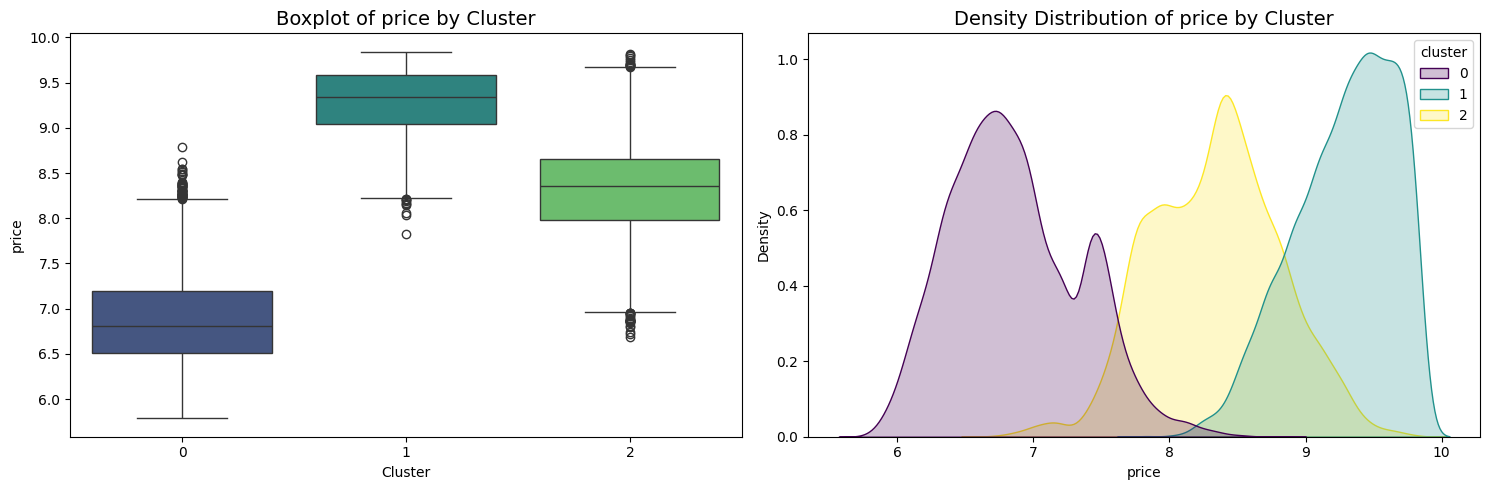

C:\Users\umasu\AppData\Local\Temp\ipykernel_26844\2273426063.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=col, data=df_analysis, palette='viridis', ax=axes[0])


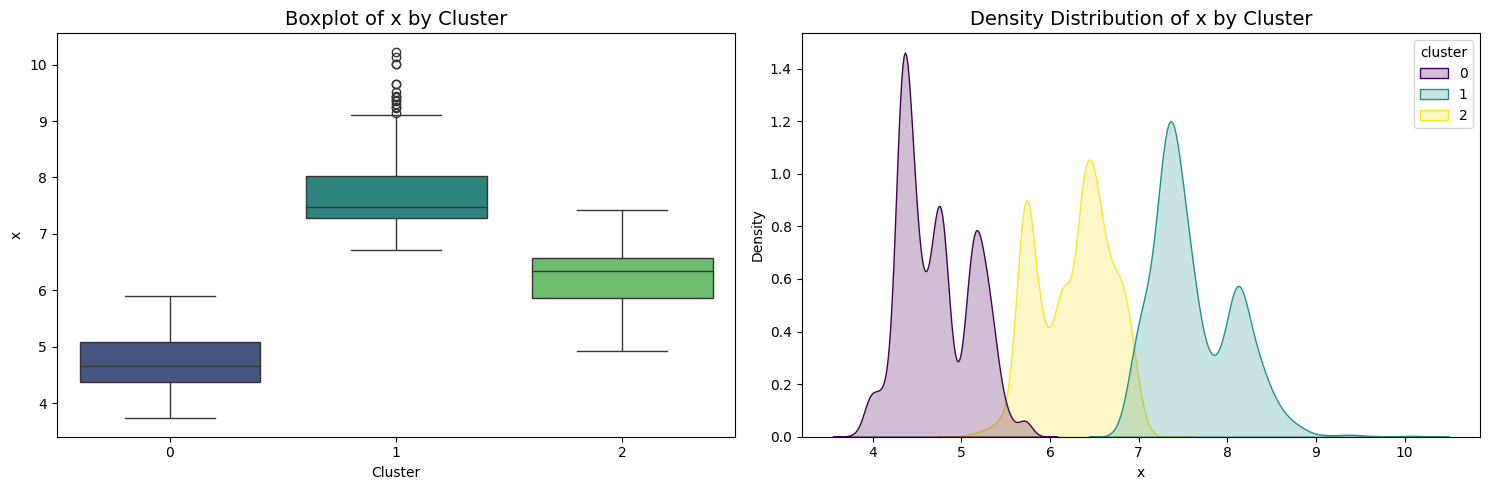

C:\Users\umasu\AppData\Local\Temp\ipykernel_26844\2273426063.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=col, data=df_analysis, palette='viridis', ax=axes[0])


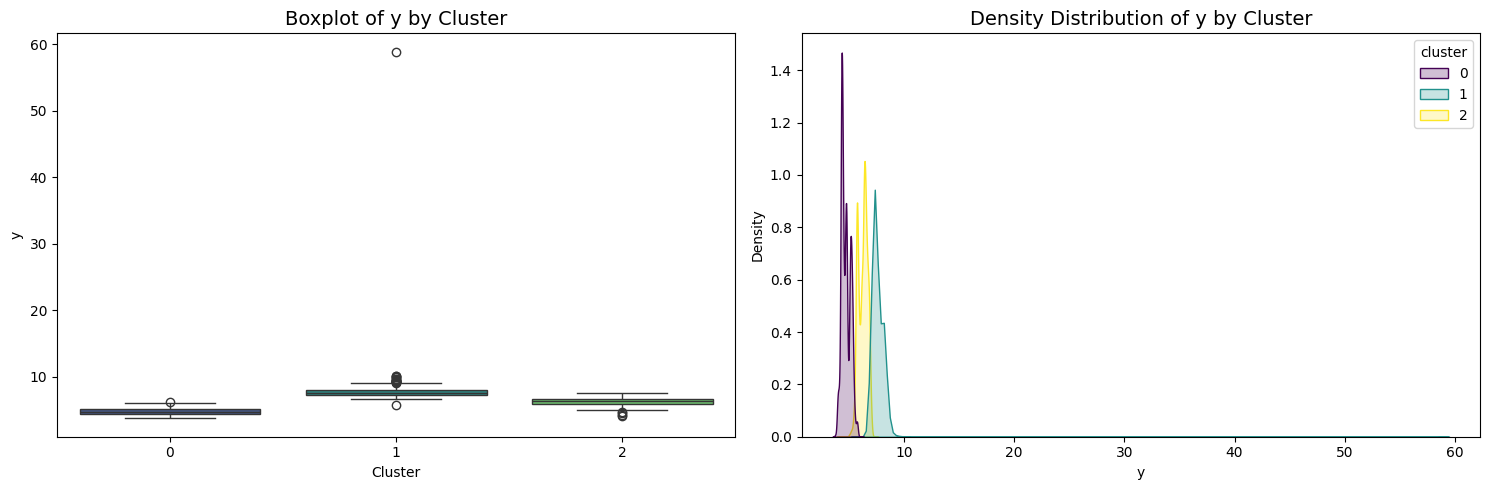

C:\Users\umasu\AppData\Local\Temp\ipykernel_26844\2273426063.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=col, data=df_analysis, palette='viridis', ax=axes[0])


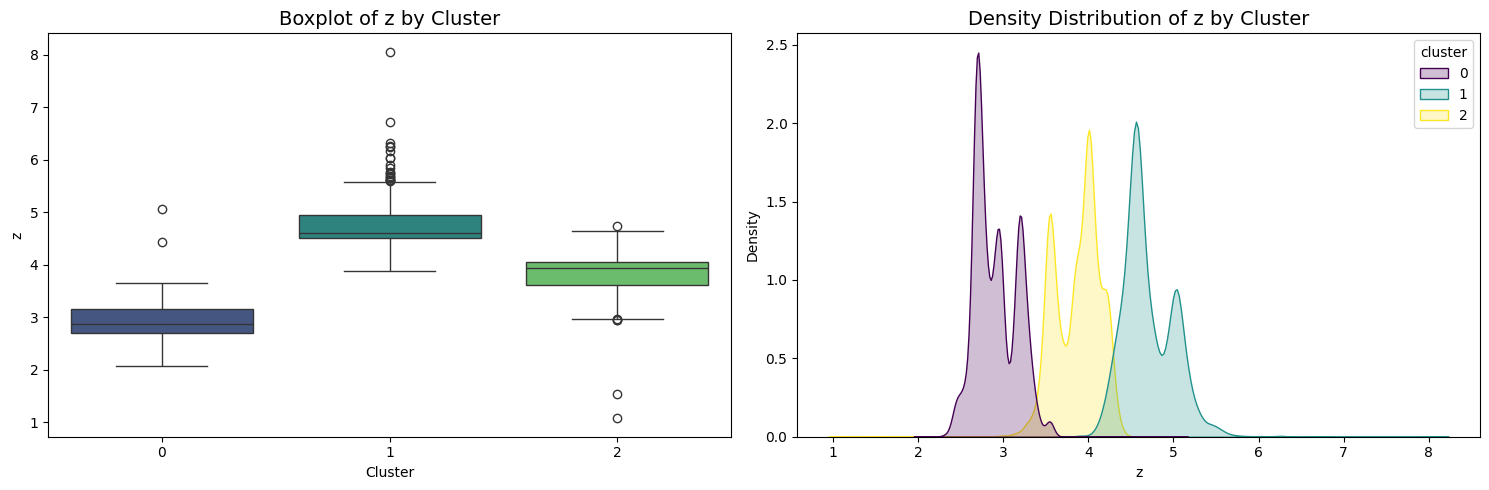


 SUMMARY STATISTICS BY CLUSTER
         carat  depth  table  price     x     y     z
cluster                                              
0         0.40  61.69  56.89   6.86  4.71  4.72  2.91
1         1.70  61.75  58.17   9.29  7.62  7.62  4.70
2         0.95  61.81  57.87   8.34  6.26  6.26  3.87


In [126]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Define your continuous variables
# You can adjust this list based on your specific dataframe columns
continuous_cols = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

# Check if 'log_price' exists and add it, as it's often useful
if 'log_price' in df_analysis.columns:
    continuous_cols.append('log_price')

# 2. Iterate and Plot
for col in continuous_cols:
    if col not in df_analysis.columns:
        continue

    # Set up the figure with 2 subplots (Boxplot and KDE plot)
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    # --- Chart 1: Boxplot (Good for comparing ranges & outliers) ---
    sns.boxplot(x='cluster', y=col, data=df_analysis, palette='viridis', ax=axes[0])
    axes[0].set_title(f'Boxplot of {col} by Cluster', fontsize=14)
    axes[0].set_xlabel('Cluster')
    axes[0].set_ylabel(col)
    
    # --- Chart 2: KDE Plot (Good for seeing the shape/density) ---
    # fill=True creates a filled area under the curve
    sns.kdeplot(data=df_analysis, x=col, hue='cluster', palette='viridis', fill=True, common_norm=False, ax=axes[1])
    axes[1].set_title(f'Density Distribution of {col} by Cluster', fontsize=14)
    axes[1].set_xlabel(col)
    axes[1].set_ylabel('Density')
    
    plt.tight_layout()
    plt.show()

# ---------------------------------------------------------
# Optional: Summary Statistics Table
# ---------------------------------------------------------
print("\n" + "="*50)
print(" SUMMARY STATISTICS BY CLUSTER")
print("="*50)
summary = df_analysis.groupby('cluster')[continuous_cols].mean().round(2)
print(summary)

Analyzing Cluster 0 with XGBoost...


C:\Users\umasu\AppData\Local\Temp\ipykernel_26844\3669866312.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='Importance', y='Feature', palette='magma')


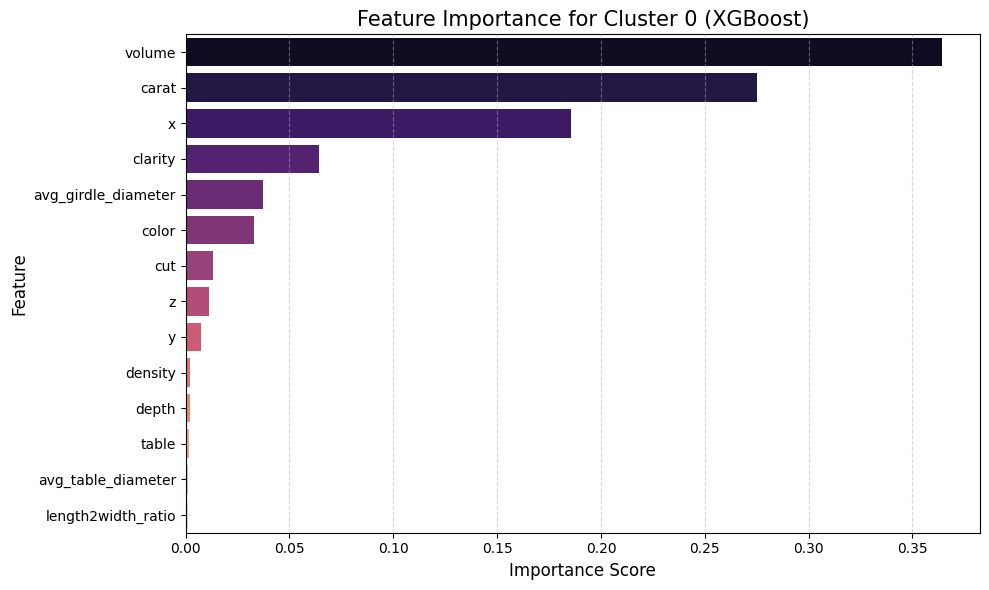

Top 3 Drivers of Price in Cluster 0:
  Feature  Importance
6  volume    0.364301
0   carat    0.275361
3       x    0.185783
--------------------------------------------------
Analyzing Cluster 1 with XGBoost...


C:\Users\umasu\AppData\Local\Temp\ipykernel_26844\3669866312.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='Importance', y='Feature', palette='magma')


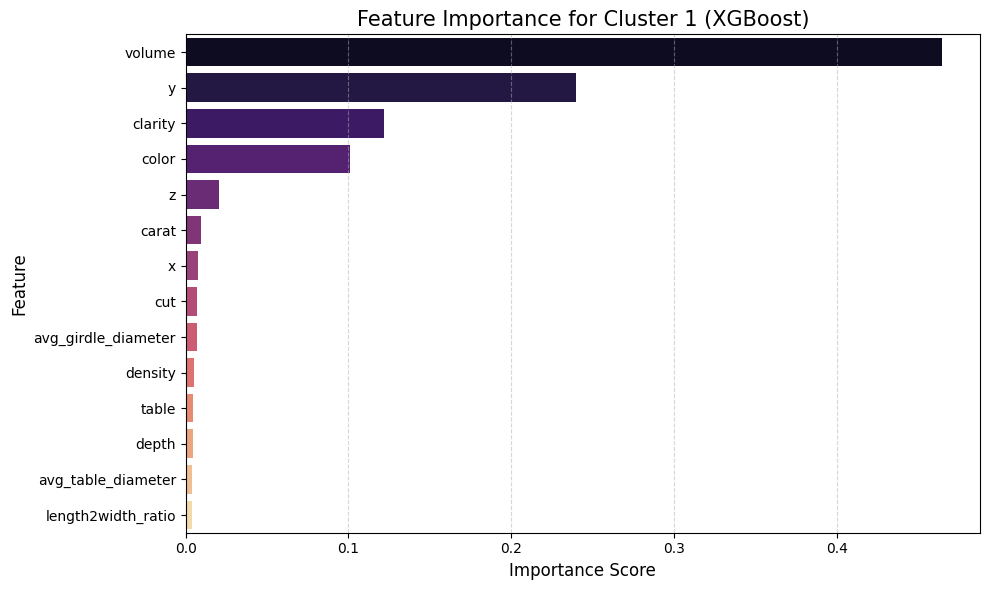

Top 3 Drivers of Price in Cluster 1:
    Feature  Importance
6    volume    0.464796
4         y    0.239933
13  clarity    0.121854
--------------------------------------------------
Analyzing Cluster 2 with XGBoost...


C:\Users\umasu\AppData\Local\Temp\ipykernel_26844\3669866312.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='Importance', y='Feature', palette='magma')


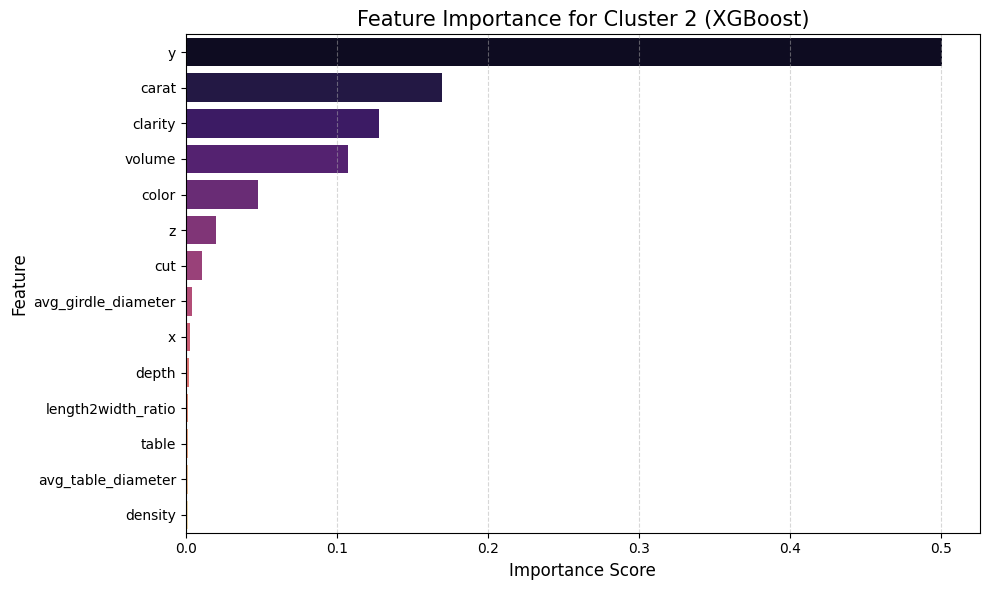

Top 3 Drivers of Price in Cluster 2:
    Feature  Importance
4         y    0.500863
0     carat    0.169794
13  clarity    0.127911
--------------------------------------------------


In [127]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor

# ---------------------------------------------------------
# 1. Prepare Data
# ---------------------------------------------------------
xgb_data = X_train.copy()

# Remove 'cluster' if it's already there to avoid data leakage
if 'cluster' in xgb_data.columns:
    xgb_data = xgb_data.drop(columns=['cluster'])

# Predict clusters for the training data
train_clusters = kmeans.predict(xgb_data)

# Add target variable and cluster labels
xgb_data['log_price'] = y_train.values
xgb_data['cluster'] = train_clusters

# ---------------------------------------------------------
# 2. Loop Through Clusters & Calculate XGBoost Importance
# ---------------------------------------------------------
unique_clusters = sorted(xgb_data['cluster'].unique())

for c in unique_clusters:
    print(f"Analyzing Cluster {c} with XGBoost...")
    
    # A. Filter data for this cluster
    cluster_subset = xgb_data[xgb_data['cluster'] == c]
    
    # Separate Features (X) and Target (y)
    X_c = cluster_subset.drop(columns=['cluster', 'log_price'])
    y_c = cluster_subset['log_price']
    
    # B. Fit XGBoost Regressor
    # (Using default parameters, or paste your tuned parameters here)
    xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
    xgb_model.fit(X_c, y_c)
    
    # C. Extract Feature Importances
    # XGBoost offers different types: 'weight', 'gain', 'cover'. 
    # The standard .feature_importances_ property usually returns 'gain' (contribution to model accuracy).
    importances = xgb_model.feature_importances_
    
    # Create a DataFrame for plotting
    importance_df = pd.DataFrame({
        'Feature': X_c.columns,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)
    
    # ---------------------------------------------------------
    # 3. Plot
    # ---------------------------------------------------------
    plt.figure(figsize=(10, 6))
    sns.barplot(data=importance_df, x='Importance', y='Feature', palette='magma')
    
    plt.title(f'Feature Importance for Cluster {c} (XGBoost)', fontsize=15)
    plt.xlabel('Importance Score', fontsize=12)
    plt.ylabel('Feature', fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

    # Print top 3 features
    print(f"Top 3 Drivers of Price in Cluster {c}:")
    print(importance_df.head(3))
    print("-" * 50)

In [128]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# ---------------------------------------------------------
# 1. Configuration
# ---------------------------------------------------------
# How many top features do you want to keep?
# You can change this number (e.g., 5 or 10) based on your previous plots
TOP_N_FEATURES = 5 

# Dictionary to store the final models and selected features for future use
cluster_models = {}

# ---------------------------------------------------------
# 2. Prepare Data
# ---------------------------------------------------------
xgb_data = X_train.copy()

# Remove 'cluster' if it's already there
if 'cluster' in xgb_data.columns:
    xgb_data = xgb_data.drop(columns=['cluster'])

# Predict clusters for the training data
train_clusters = kmeans.predict(xgb_data)
xgb_data['cluster'] = train_clusters
xgb_data['log_price'] = y_train.values

# ---------------------------------------------------------
# 3. Loop: Select Features -> Re-Fit
# ---------------------------------------------------------
unique_clusters = sorted(xgb_data['cluster'].unique())

for c in unique_clusters:
    print(f"\n{'='*40}")
    print(f" PROCESSING CLUSTER {c}")
    print(f"{'='*40}")
    
    # --- Step A: Get Data for Cluster ---
    cluster_subset = xgb_data[xgb_data['cluster'] == c]
    X_c = cluster_subset.drop(columns=['cluster', 'log_price'])
    y_c = cluster_subset['log_price']
    
    # --- Step B: Initial Fit to Find Importance ---
    # We fit a temporary model just to see what matters
    initial_model = XGBRegressor(n_estimators=100, random_state=42)
    initial_model.fit(X_c, y_c)
    
    # Get importances
    imp_df = pd.DataFrame({
        'Feature': X_c.columns,
        'Importance': initial_model.feature_importances_
    }).sort_values(by='Importance', ascending=False)
    
    # --- Step C: Select Top Features ---
    selected_features = imp_df.head(TOP_N_FEATURES)['Feature'].tolist()
    print(f"Selected Top {TOP_N_FEATURES} Features: {selected_features}")
    
    # --- Step D: Re-Fit Model with ONLY Selected Features ---
    X_c_reduced = X_c[selected_features]
    
    final_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
    final_model.fit(X_c_reduced, y_c)
    
    # --- Step E: Evaluate Performance (on Train) ---
    preds = final_model.predict(X_c_reduced)
    rmse = np.sqrt(mean_squared_error(y_c, preds))
    r2 = r2_score(y_c, preds)
    
    print(f"Final Training RMSE: {rmse:.4f}")
    print(f"Final Training R2:   {r2:.4f}")
    
    # Save for later use (e.g., predicting on test set)
    cluster_models[c] = {
        'model': final_model,
        'features': selected_features
    }

print("\nAll cluster models re-trained with optimized features!")


 PROCESSING CLUSTER 0
Selected Top 5 Features: ['carat', 'x', 'clarity', 'color', 'volume']
Final Training RMSE: 0.0908
Final Training R2:   0.9630

 PROCESSING CLUSTER 1
Selected Top 5 Features: ['volume', 'y', 'clarity', 'color', 'z']
Final Training RMSE: 0.0744
Final Training R2:   0.9598

 PROCESSING CLUSTER 2
Selected Top 5 Features: ['y', 'clarity', 'volume', 'carat', 'color']
Final Training RMSE: 0.0813
Final Training R2:   0.9702

All cluster models re-trained with optimized features!


PREDICTION & EVALUATION REPORT
Cluster 0 Performance:
  - Test Samples: 2431
  - RMSE: 0.1080
  - R²:   0.9499
----------------------------------------
Cluster 1 Performance:
  - Test Samples: 699
  - RMSE: 0.1151
  - R²:   0.8956
----------------------------------------
Cluster 2 Performance:
  - Test Samples: 2116
  - RMSE: 0.0953
  - R²:   0.9597
----------------------------------------

OVERALL MODEL PERFORMANCE (Weighted Average)
Overall Log RMSE: 0.1041
Overall R²:       0.9895
Mean Absolute Error (Original Price): $286.16


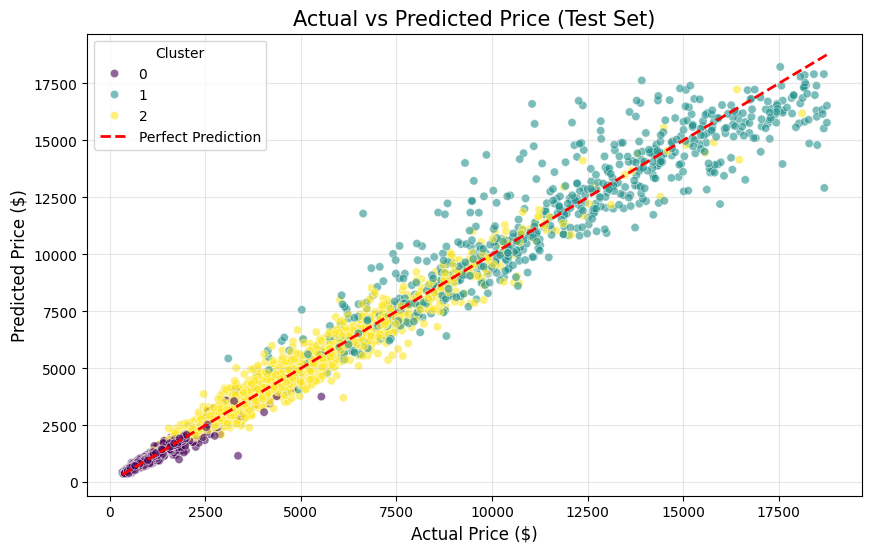

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# ---------------------------------------------------------
# 1. Prepare Test Data
# ---------------------------------------------------------
# Create a copy to avoid modifying the original X_test
test_eval_df = X_test.copy()

# Ensure we don't have 'cluster' or 'log_price' in the input features
if 'cluster' in test_eval_df.columns:
    test_eval_df = test_eval_df.drop(columns=['cluster'])

# A. Predict which cluster each test sample belongs to
# We use the SAME kmeans model trained on training data
test_clusters = kmeans.predict(test_eval_df)
test_eval_df['cluster'] = test_clusters

# B. Attach Actual Prices (Target)
test_eval_df['actual_log_price'] = y_test.values

# Initialize a column for predictions
test_eval_df['predicted_log_price'] = 0.0

# ---------------------------------------------------------
# 2. Predict Using Cluster-Specific Models
# ---------------------------------------------------------
print("PREDICTION & EVALUATION REPORT")
print("="*60)

# We loop through the clusters that exist in our trained models
for c in sorted(cluster_models.keys()):
    
    # Get the specific model and features for this cluster
    model_info = cluster_models[c]
    model = model_info['model']
    features = model_info['features']
    
    # Identify test rows that belong to this cluster
    mask = test_eval_df['cluster'] == c
    
    # If there are no test samples for this cluster, skip
    if mask.sum() == 0:
        print(f"Cluster {c}: No samples in test set.")
        continue
        
    # Select ONLY the features used during training for this cluster
    X_test_subset = test_eval_df.loc[mask, features]
    
    # Predict
    preds = model.predict(X_test_subset)
    
    # Store predictions in the main dataframe
    test_eval_df.loc[mask, 'predicted_log_price'] = preds
    
    # --- Evaluation for this Cluster ---
    y_true_c = test_eval_df.loc[mask, 'actual_log_price']
    rmse_c = np.sqrt(mean_squared_error(y_true_c, preds))
    r2_c = r2_score(y_true_c, preds)
    
    print(f"Cluster {c} Performance:")
    print(f"  - Test Samples: {mask.sum()}")
    print(f"  - RMSE: {rmse_c:.4f}")
    print(f"  - R²:   {r2_c:.4f}")
    print("-" * 40)

# ---------------------------------------------------------
# 3. Overall Evaluation
# ---------------------------------------------------------
# Recover original price scale (exponential)
test_eval_df['actual_price'] = np.exp(test_eval_df['actual_log_price'])
test_eval_df['predicted_price'] = np.exp(test_eval_df['predicted_log_price'])

rmse_total = np.sqrt(mean_squared_error(test_eval_df['actual_log_price'], test_eval_df['predicted_log_price']))
r2_total = r2_score(test_eval_df['actual_log_price'], test_eval_df['predicted_log_price'])
mae_price = mean_absolute_error(test_eval_df['actual_price'], test_eval_df['predicted_price'])

print("\nOVERALL MODEL PERFORMANCE (Weighted Average)")
print("="*60)
print(f"Overall Log RMSE: {rmse_total:.4f}")
print(f"Overall R²:       {r2_total:.4f}")
print(f"Mean Absolute Error (Original Price): ${mae_price:.2f}")

# ---------------------------------------------------------
# 4. Visualization: Actual vs Predicted
# ---------------------------------------------------------
plt.figure(figsize=(10, 6))
sns.scatterplot(data=test_eval_df, x='actual_price', y='predicted_price', hue='cluster', palette='viridis', alpha=0.6)

# Plot perfect prediction line
min_val = min(test_eval_df['actual_price'].min(), test_eval_df['predicted_price'].min())
max_val = max(test_eval_df['actual_price'].max(), test_eval_df['predicted_price'].max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Perfect Prediction')

plt.title('Actual vs Predicted Price (Test Set)', fontsize=15)
plt.xlabel('Actual Price ($)', fontsize=12)
plt.ylabel('Predicted Price ($)', fontsize=12)
plt.legend(title='Cluster')
plt.grid(True, alpha=0.3)
plt.show()

In [134]:
# Run this in a code cell
%pip install shap

   ---------------------------------------- 0.0/552.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/552.3 kB ? eta -:--:--
   ------------------ --------------------- 262.1/552.3 kB ? eta -:--:--
   ------------------------------------- -- 524.3/552.3 kB 1.5 MB/s eta 0:00:01
   ---------------------------------------- 552.3/552.3 kB 1.2 MB/s  0:00:00
   ---------------------------------------- 0.0/39.1 MB ? eta -:--:--
    --------------------------------------- 0.5/39.1 MB 3.5 MB/s eta 0:00:11
   - -------------------------------------- 1.3/39.1 MB 3.7 MB/s eta 0:00:11
   - -------------------------------------- 1.3/39.1 MB 3.7 MB/s eta 0:00:11
   - -------------------------------------- 1.8/39.1 MB 2.2 MB/s eta 0:00:18
   -- ------------------------------------- 2.6/39.1 MB 2.7 MB/s eta 0:00:14
   ---- ----------------------------------- 3.9/39.1 MB 3.1 MB/s eta 0:00:12
   ----- ---------------------------------- 5.2/39.1 MB 3.7 MB/s eta 0:00:10
   ------ ---------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.



 SHAP ANALYSIS FOR CLUSTER 0
Analyzing 2431 samples in Cluster 0...


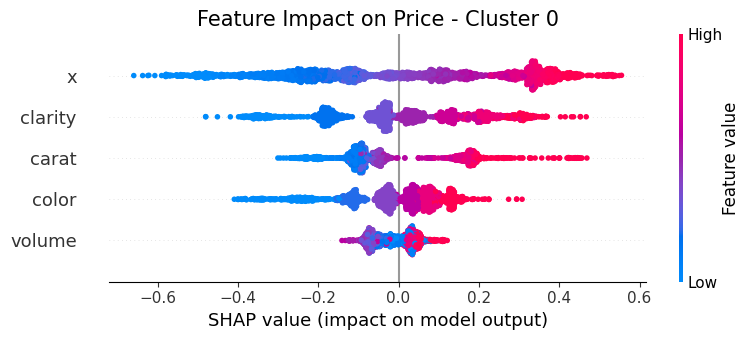

Top Feature for Cluster 0 is 'x'. Generating Dependence Plot...


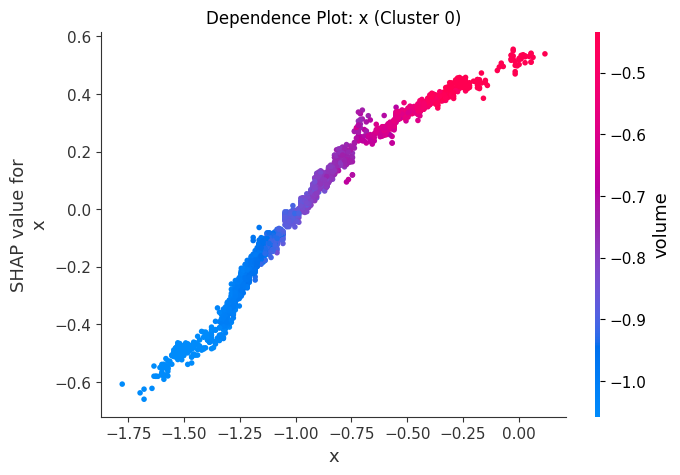

------------------------------------------------------------

 SHAP ANALYSIS FOR CLUSTER 1
Analyzing 699 samples in Cluster 1...


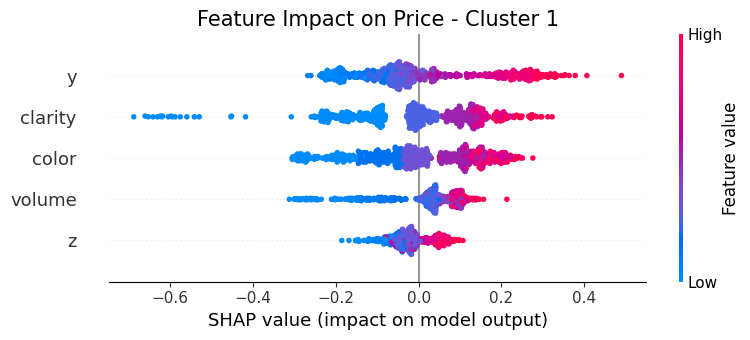

Top Feature for Cluster 1 is 'y'. Generating Dependence Plot...


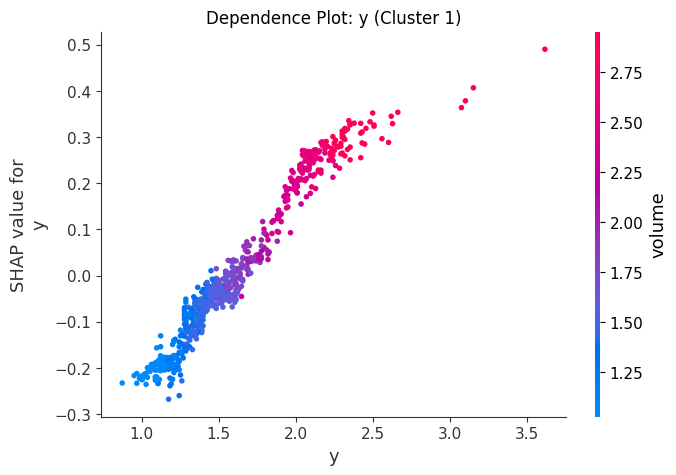

------------------------------------------------------------

 SHAP ANALYSIS FOR CLUSTER 2
Analyzing 2116 samples in Cluster 2...


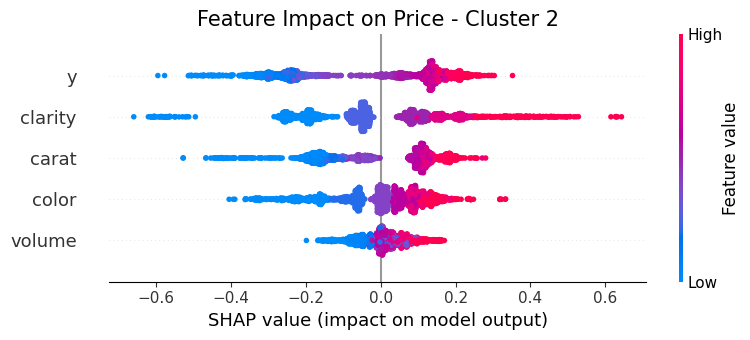

Top Feature for Cluster 2 is 'y'. Generating Dependence Plot...


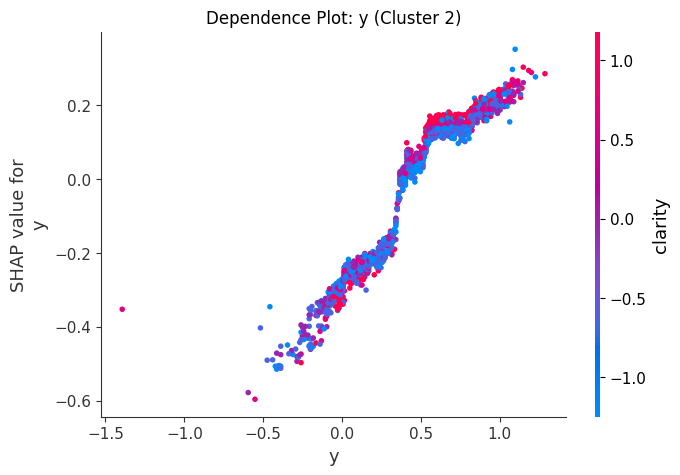

------------------------------------------------------------


In [135]:
import shap
import matplotlib.pyplot as plt
import pandas as pd

# Initialize JavaScript visualization (required for some SHAP plots)
shap.initjs()

# ---------------------------------------------------------
# Loop Through Each Cluster Model
# ---------------------------------------------------------
for c in sorted(cluster_models.keys()):
    print(f"\n{'='*60}")
    print(f" SHAP ANALYSIS FOR CLUSTER {c}")
    print(f"{'='*60}")

    # 1. Get Model & Features for this Cluster
    model_info = cluster_models[c]
    model = model_info['model']
    feature_names = model_info['features']

    # 2. Get Test Data for this Cluster
    # We use 'test_eval_df' (created in the Evaluation step) because it has the cluster labels
    mask = test_eval_df['cluster'] == c
    
    # Select ONLY the features used by this specific model
    X_test_c = test_eval_df.loc[mask, feature_names]

    if X_test_c.empty:
        print(f"No test data found for Cluster {c}. Skipping...")
        continue
        
    print(f"Analyzing {len(X_test_c)} samples in Cluster {c}...")

    # 3. Create SHAP Explainer
    # TreeExplainer is optimized for XGBoost
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X_test_c)

    # ---------------------------------------------------------
    # 4. PLOT 1: Summary Plot (Feature Importance & Direction)
    # ---------------------------------------------------------
    plt.figure(figsize=(10, 6))
    plt.title(f"Feature Impact on Price - Cluster {c}", fontsize=15)
    
    # summary_plot automatically sorts features by importance
    shap.summary_plot(shap_values, X_test_c, show=False)
    plt.tight_layout()
    plt.show()
    
    # ---------------------------------------------------------
    # 5. PLOT 2: Dependence Plot (Top Feature)
    # ---------------------------------------------------------
    # We automatically find the most important feature to plot
    # (It's usually the one with the highest mean absolute SHAP value)
    vals = np.abs(shap_values).mean(0)
    feature_importance = pd.DataFrame(list(zip(feature_names, vals)), columns=['col_name','feature_importance_vals'])
    feature_importance.sort_values(by=['feature_importance_vals'], ascending=False, inplace=True)
    top_feature = feature_importance.iloc[0]['col_name']
    
    print(f"Top Feature for Cluster {c} is '{top_feature}'. Generating Dependence Plot...")
    
    # Create Dependence Plot
    # This shows how the top feature affects price AND how it interacts with another feature
    shap.dependence_plot(top_feature, shap_values, X_test_c, show=False)
    plt.title(f"Dependence Plot: {top_feature} (Cluster {c})")
    plt.show()
    
    print("-" * 60)

Training XGBoost Model...
Model Performance -> R²: 0.9921 | RMSE: 0.0901


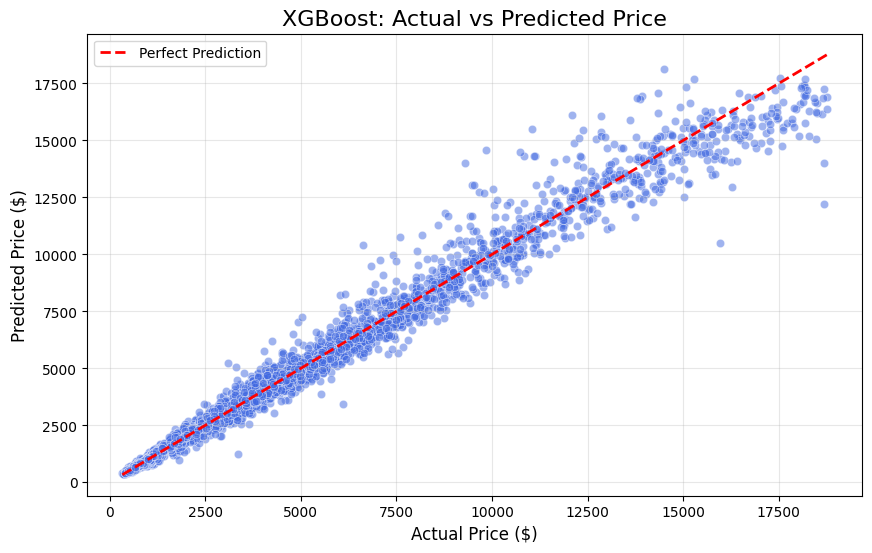

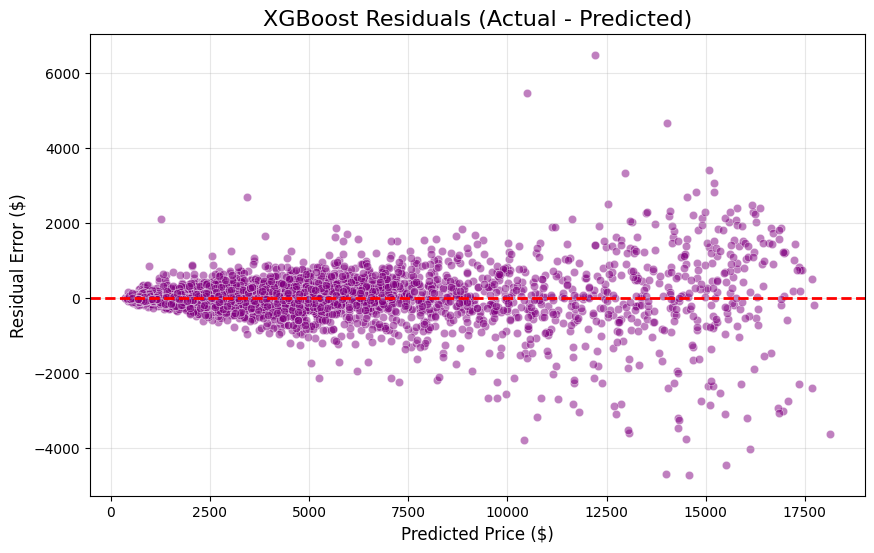

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error

# ---------------------------------------------------------
# 1. Setup & Train XGBoost
# ---------------------------------------------------------
# Define the model with the best parameters you found 
# (Replace these with the 'best_params' from your tuning step if you have them)
# Common good starting point: n_estimators=100, learning_rate=0.1, max_depth=5
xgb_final = XGBRegressor(
    n_estimators=200, 
    learning_rate=0.1, 
    max_depth=5, 
    random_state=42, 
    n_jobs=-1
)

# Prepare clean data (ensure no 'cluster' column interferes if you are doing global prediction)
X_train_clean = X_train.copy()
X_test_clean = X_test.copy()

if 'cluster' in X_train_clean.columns:
    X_train_clean = X_train_clean.drop(columns=['cluster'])
if 'cluster' in X_test_clean.columns:
    X_test_clean = X_test_clean.drop(columns=['cluster'])

print("Training XGBoost Model...")
xgb_final.fit(X_train_clean, y_train)

# ---------------------------------------------------------
# 2. Generate Predictions
# ---------------------------------------------------------
y_pred_log = xgb_final.predict(X_test_clean)

# Calculate Metrics
r2 = r2_score(y_test, y_pred_log)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_log))

print(f"Model Performance -> R²: {r2:.4f} | RMSE: {rmse:.4f}")

# ---------------------------------------------------------
# 3. Create Comparison DataFrame
# ---------------------------------------------------------
# Convert log prices back to original price ($) for easier interpretation
comparison_df = pd.DataFrame({
    'Actual Price': np.exp(y_test.values),
    'Predicted Price': np.exp(y_pred_log)
})

# ---------------------------------------------------------
# 4. Plot: Actual vs Predicted
# ---------------------------------------------------------
plt.figure(figsize=(10, 6))

# Scatter plot
sns.scatterplot(x='Actual Price', y='Predicted Price', data=comparison_df, 
                alpha=0.5, color='royalblue', edgecolor='w')

# Perfect prediction line (y=x)
min_val = min(comparison_df['Actual Price'].min(), comparison_df['Predicted Price'].min())
max_val = max(comparison_df['Actual Price'].max(), comparison_df['Predicted Price'].max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Perfect Prediction')

plt.title('XGBoost: Actual vs Predicted Price', fontsize=16)
plt.xlabel('Actual Price ($)', fontsize=12)
plt.ylabel('Predicted Price ($)', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# ---------------------------------------------------------
# 5. Plot: Residuals (Errors)
# ---------------------------------------------------------
residuals = comparison_df['Actual Price'] - comparison_df['Predicted Price']

plt.figure(figsize=(10, 6))
sns.scatterplot(x=comparison_df['Predicted Price'], y=residuals, alpha=0.5, color='purple')
plt.axhline(0, color='red', linestyle='--', linewidth=2)

plt.title('XGBoost Residuals (Actual - Predicted)', fontsize=16)
plt.xlabel('Predicted Price ($)', fontsize=12)
plt.ylabel('Residual Error ($)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()